# Data Scientist

Oleh : Frengki Josua Purba


### Latar Belakang Masalah



---


Di praktikum ini, kita akan membuat pohon keputusan untuk memprediksi pendapatan dari suatu populasi, yang dilabeli sebagai <= 50𝑟𝑖𝑏𝑢 𝑑𝑎𝑛>
 50 ribu. Atribut (prediktor) adalah usia, jenis kelas pekerja, status pernikahan, jenis kelamin, ras, dll.

Pada bagian berikut ini, kita akan:

membersihkan dan menyiapkan data,
membangun pohon keputusan dengan hiperparameter default,
memahami semua hiperparameter yang dapat kita setel, dan terakhir
memilih hiperparameter yang optimal menggunakan validasi silang pencarian kisi-kisi.

## Tujuan

Tujuan utama penerapan metode Data Science dalam hal ini adalah untuk menciptakan model prediksi yang akurat yang dapat digunakan untuk: (1) mengidentifikasi variabel-variabel kunci yang mempengaruhi pendapatan suatu populasi dan (2) memprediksi pendapatan suatu populasi. Hasil pemodelan prediktif menggunakan Data Science diharapkan dapat memberikan masukan kepada perbankan agar dapat mengoptimalkan pendapatan suatu populasi.

## Dataset

https://drive.google.com/file/d/1x3eL_wKasCr0ROVU5CyTRUGwCvIkR_3Q/view?usp=drive_link


# BAB 1 - Mengumpulkan Data

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

In [69]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [70]:
pd.set_option('display.max_columns', None) #melihat semua kolom

In [71]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [72]:
import pandas as pd
dataset=pd.read_csv('gdrive/My Drive/Pengantar Big Data/adult_dataset.csv')

In [73]:
dataset #baris pertama dianggap nama feature padahal data pertama

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Unnamed: 14
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [74]:
# dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/crx.data', header=None)
dataset=pd.read_csv('gdrive/My Drive/Pengantar Big Data/adult_dataset.csv')

In [75]:
dataset #data sudah sesuai

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Unnamed: 14
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


**Mengubah nama kolom dataset**

In [76]:
dataset.columns=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10",
                 "A11","A12","A13","A14","Class"]

In [77]:
dataset

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### BAB 2 - Menelaah Data

Analisis Karakteristik Data

In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      32561 non-null  int64 
 1   A2      32561 non-null  object
 2   A3      32561 non-null  int64 
 3   A4      32561 non-null  object
 4   A5      32561 non-null  int64 
 5   A6      32561 non-null  object
 6   A7      32561 non-null  object
 7   A8      32561 non-null  object
 8   A9      32561 non-null  object
 9   A10     32561 non-null  object
 10  A11     32561 non-null  int64 
 11  A12     32561 non-null  int64 
 12  A13     32561 non-null  int64 
 13  A14     32561 non-null  object
 14  Class   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [79]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")


A2 : ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
A4 : ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
A6 : ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
A7 : ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
A8 : ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
A9 : ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
A10 : ['Female' 'Male']
A14 : ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Pu

Temuan:
- Masih ada data `?`

**Cek Distribusi Kelas**

In [80]:
dataset['Class'].value_counts()

<=50K    24720
>50K      7841
Name: Class, dtype: int64

Temuan:
- Kelas sudah ditemukan


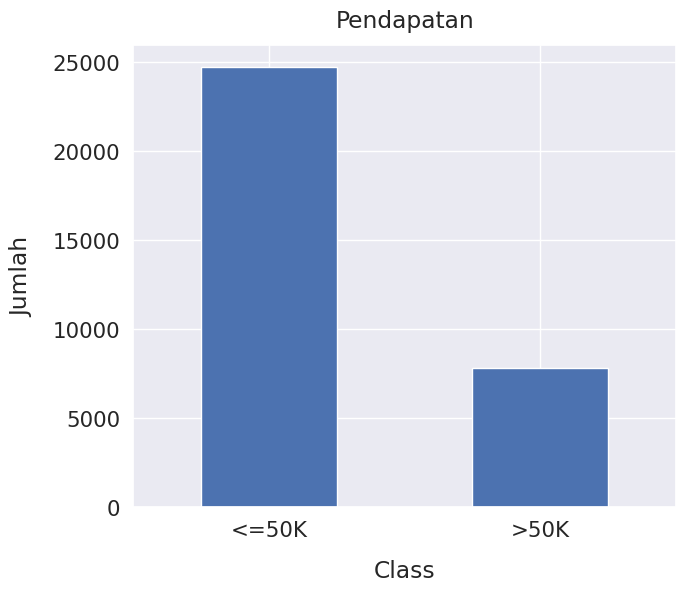

In [81]:
sns.set(font_scale=1.4)
dataset['Class'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Class", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Pendapatan", y=1.02);

Temuan:
- Kelas seimbang (balanced)

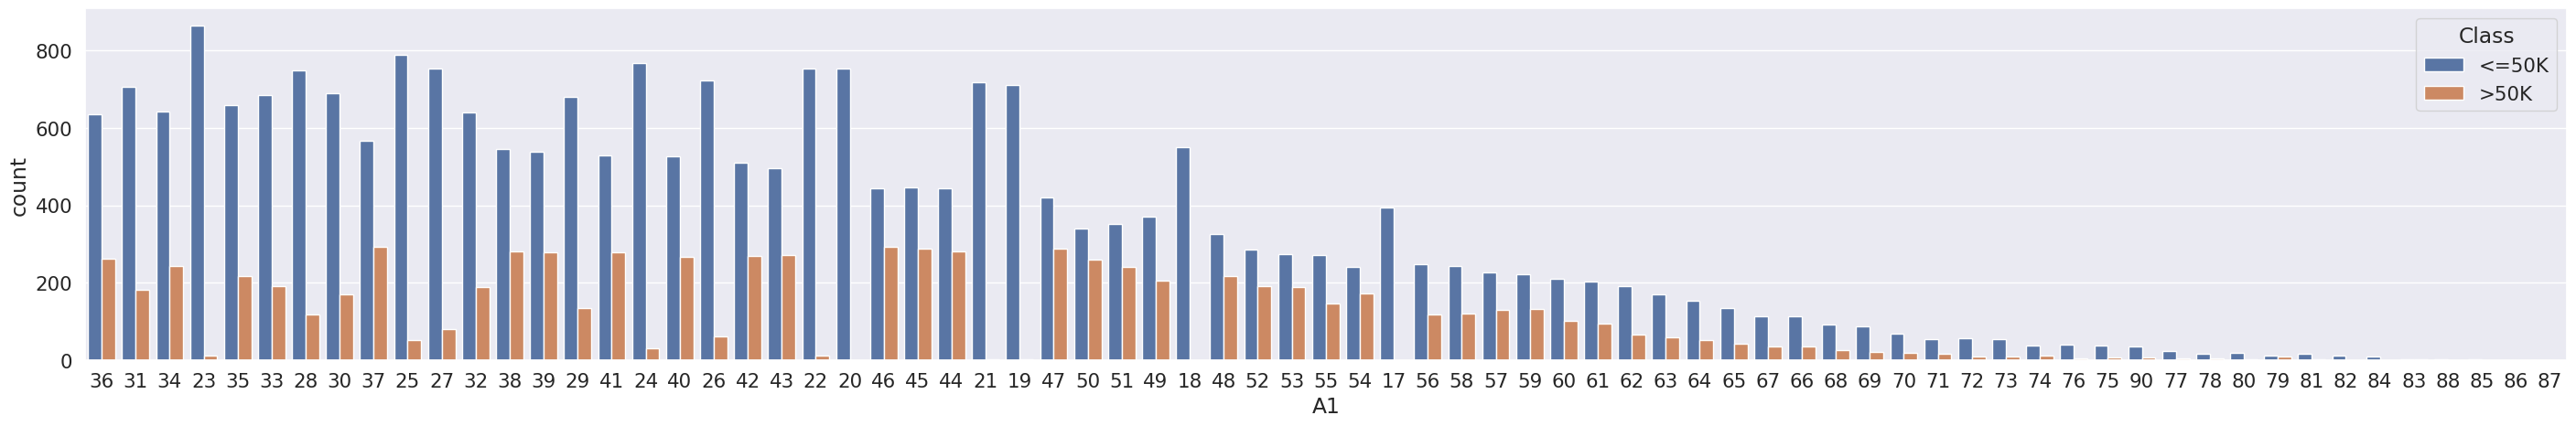

In [82]:
plt.subplots(figsize = (35,5))
sns.countplot(x=dataset['A1'],order=dataset['A1'].value_counts().index,hue=dataset['Class'])
plt.show()

Temuan:
- semua usia banyak yang pendapatannya <=50k

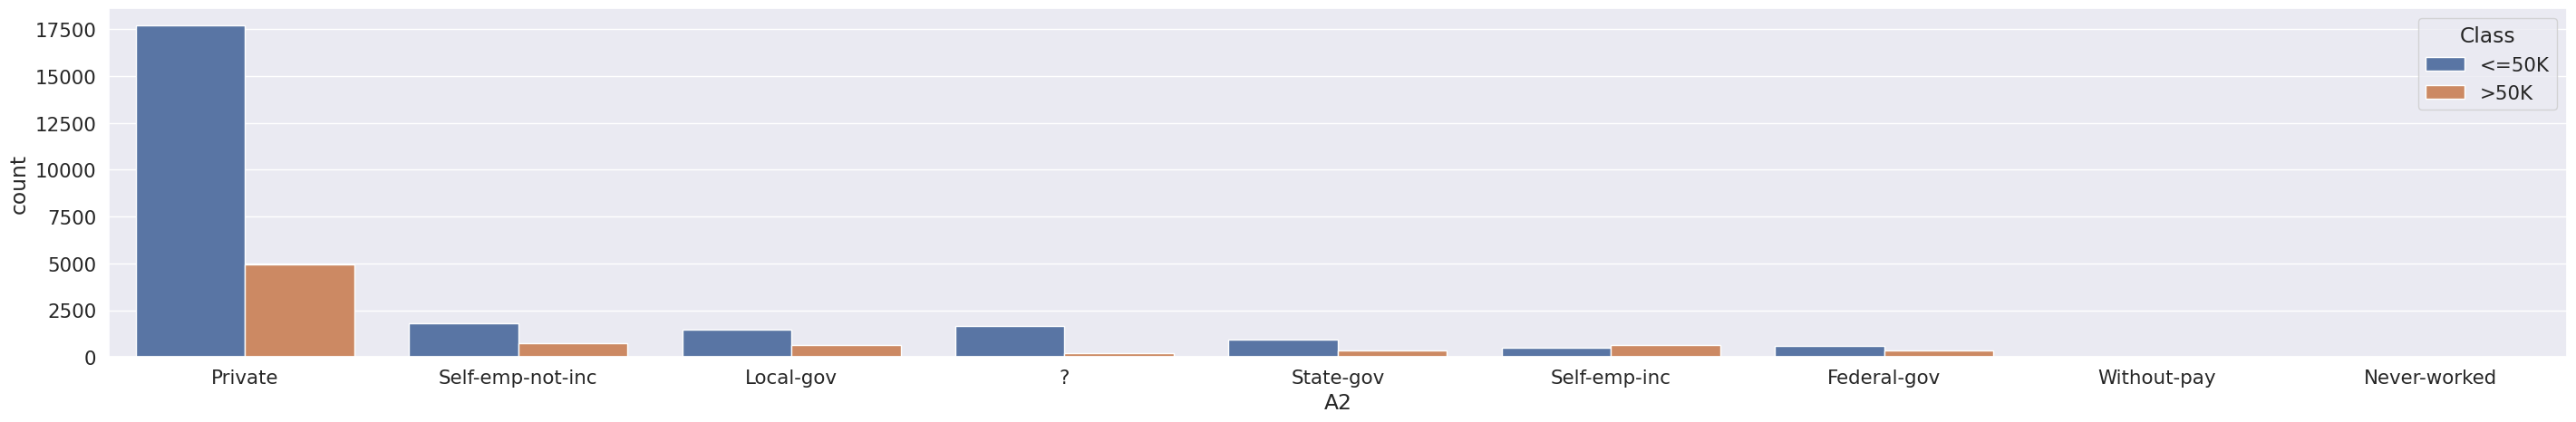

In [83]:
plt.subplots(figsize = (35,5))
sns.countplot(x=dataset['A2'],order=dataset['A2'].value_counts().index,hue=dataset['Class'])
plt.show()

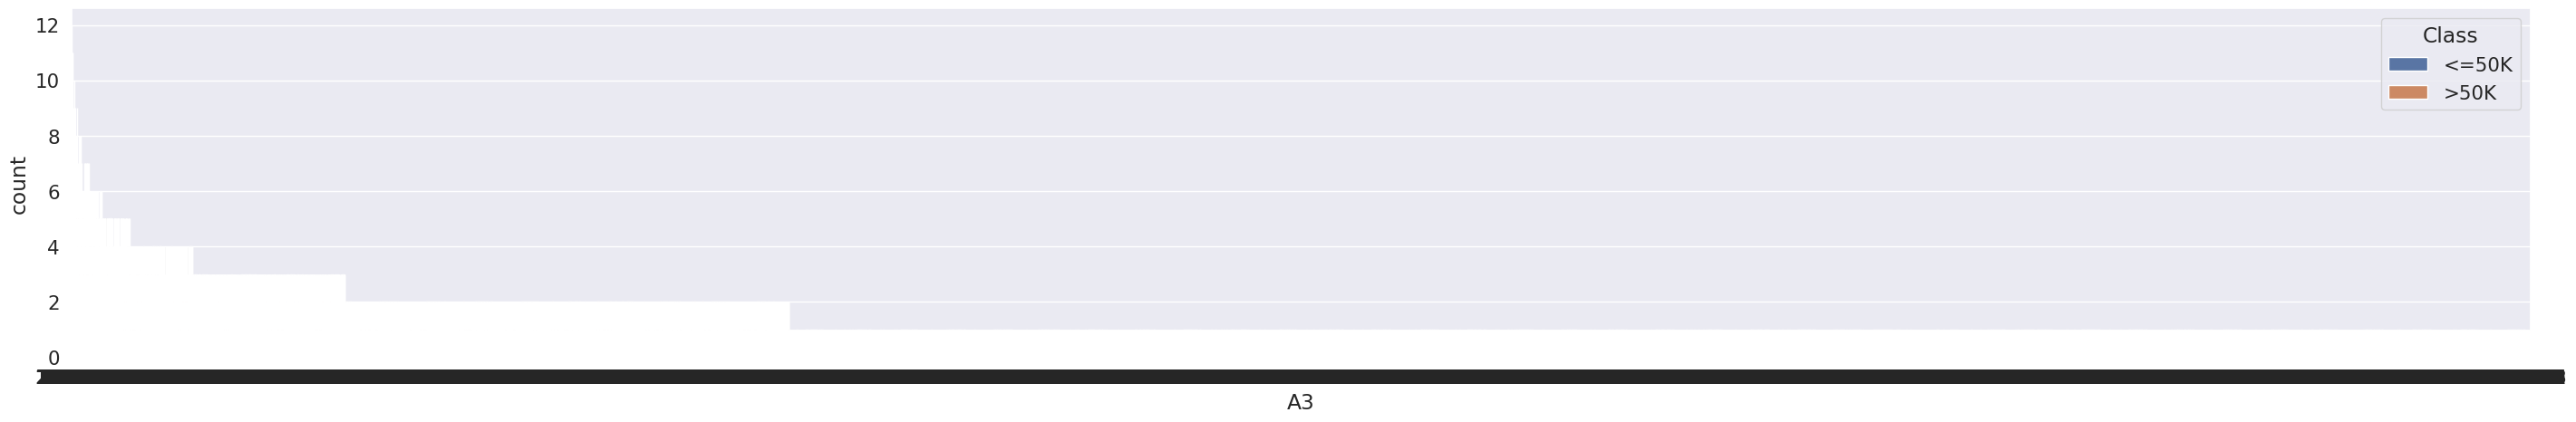

In [84]:
plt.subplots(figsize = (35,5))
sns.countplot(x=dataset['A3'],order=dataset['A3'].value_counts().index,hue=dataset['Class'])
plt.show()

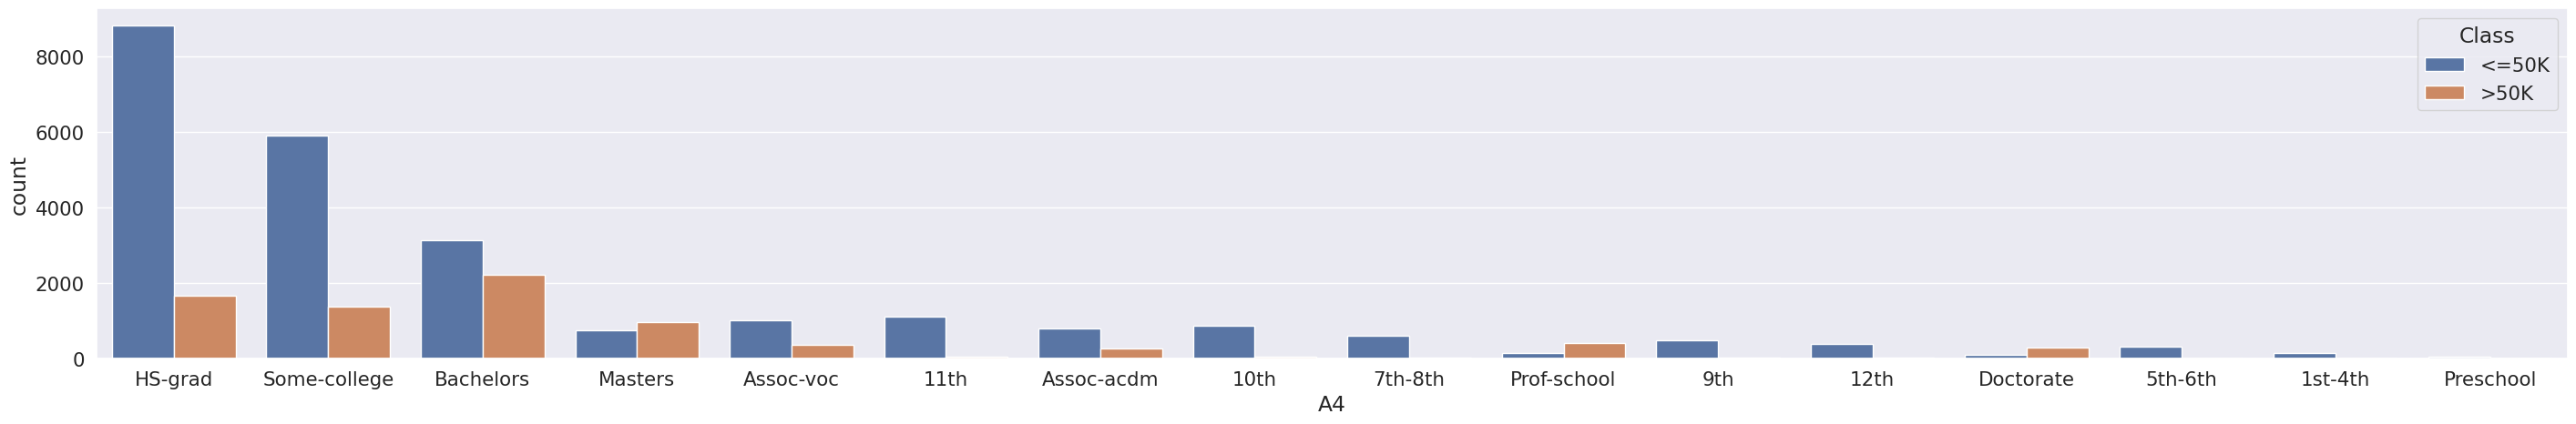

In [85]:
plt.subplots(figsize = (35,5))
sns.countplot(x=dataset['A4'],order=dataset['A4'].value_counts().index,hue=dataset['Class'])
plt.show()

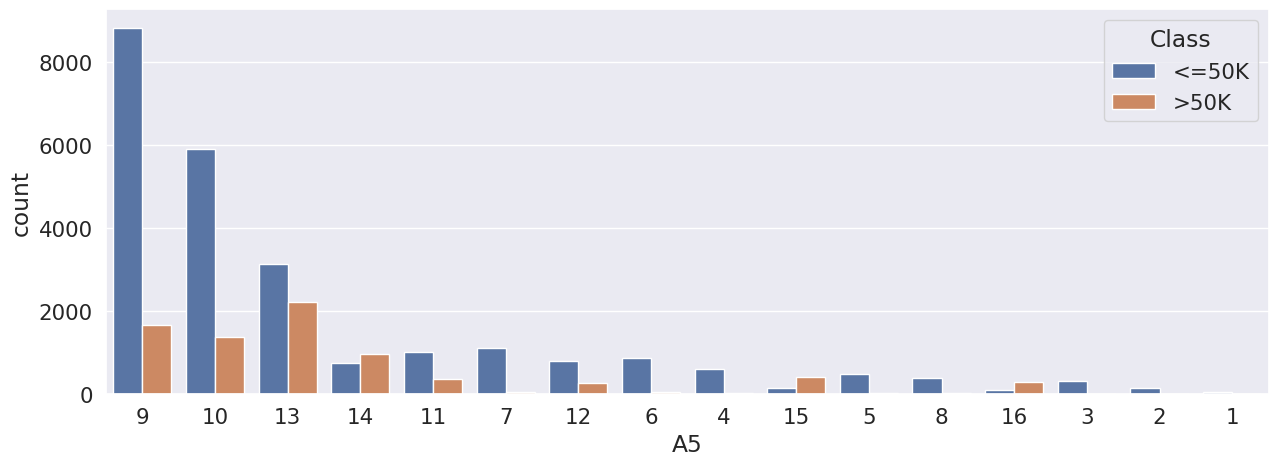

In [86]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A5'],order=dataset['A5'].value_counts().index,hue=dataset['Class'])
plt.show()

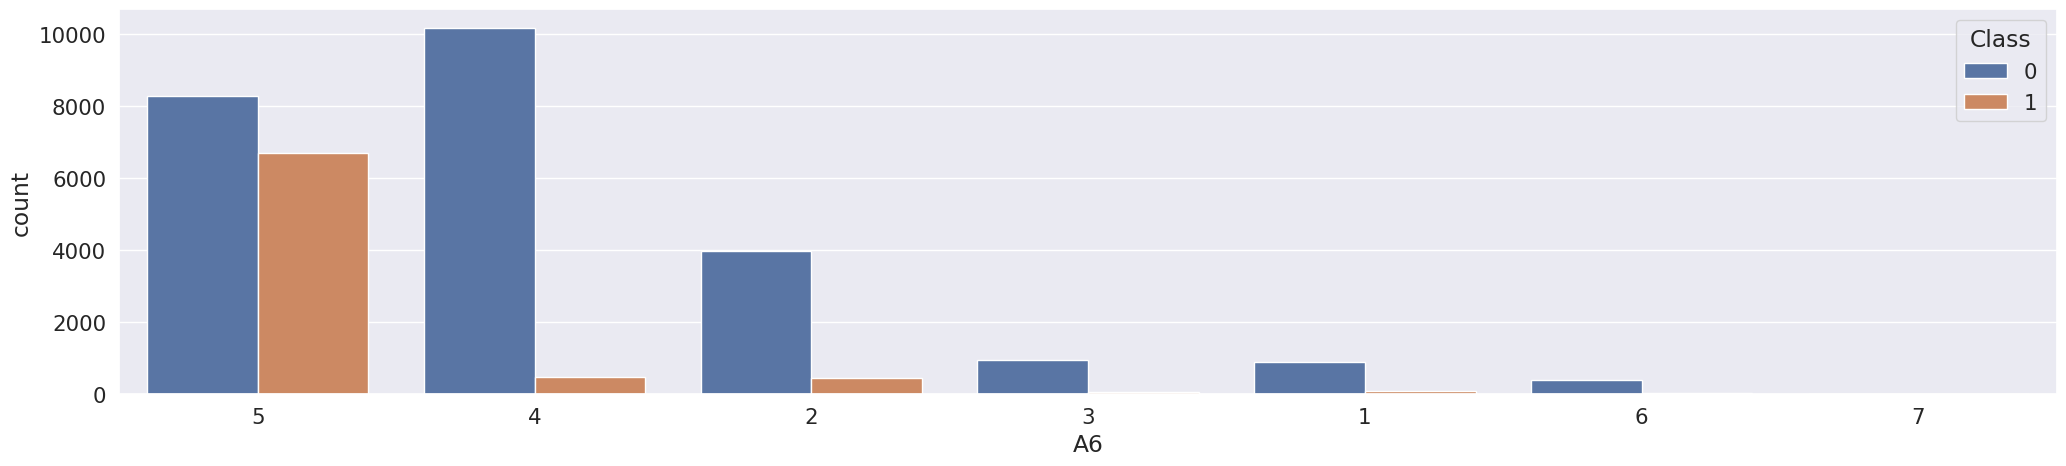

In [220]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['A6'],order=dataset['A6'].value_counts().index,hue=dataset['Class'])
plt.show()

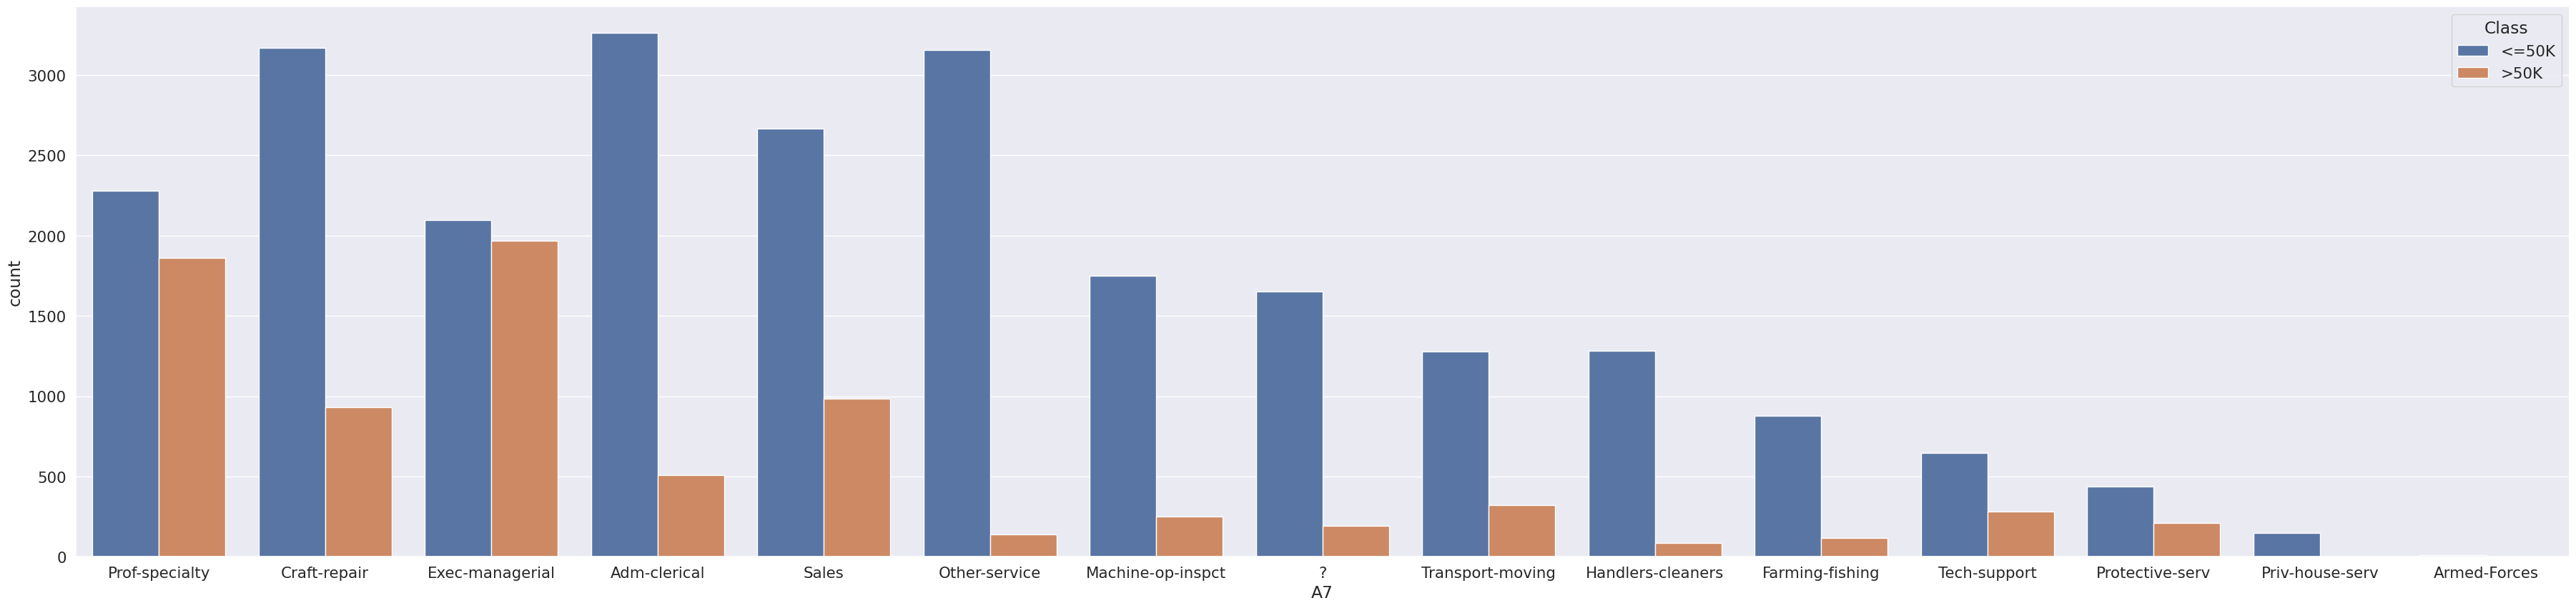

In [88]:
plt.subplots(figsize = (45,10))
sns.countplot(x=dataset['A7'],order=dataset['A7'].value_counts().index,hue=dataset['Class'])
plt.show()

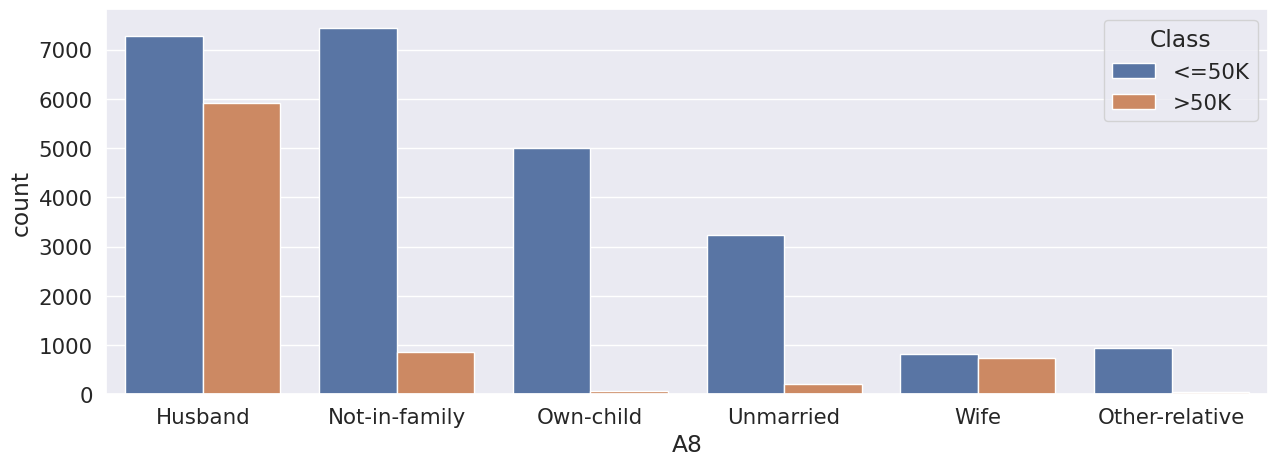

In [89]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A8'],order=dataset['A8'].value_counts().index,hue=dataset['Class'])
plt.show()

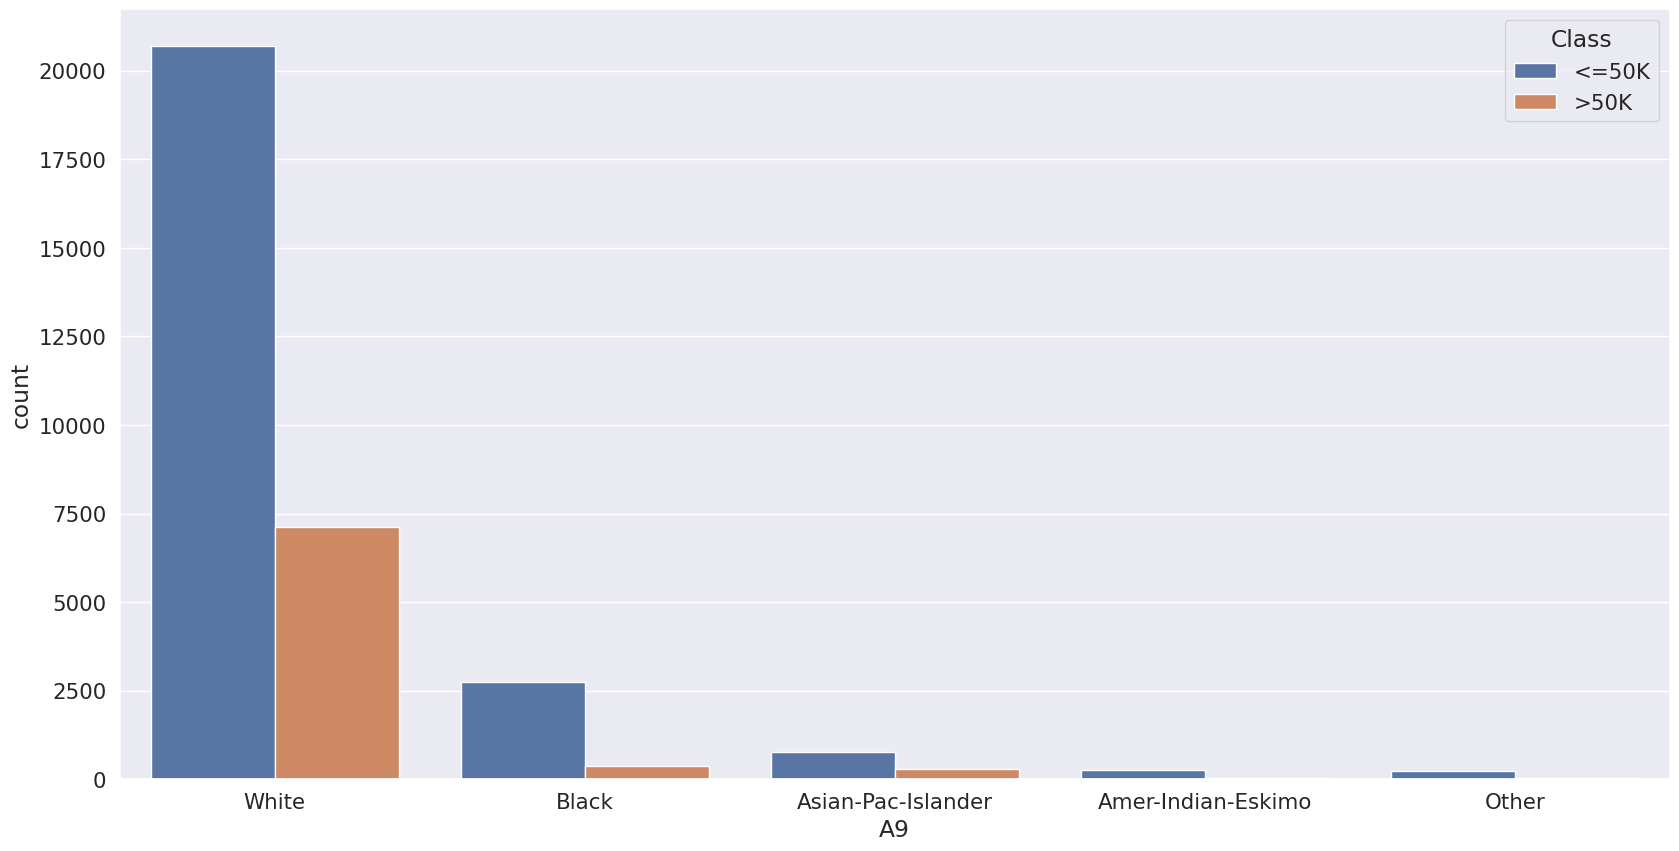

In [90]:
plt.subplots(figsize = (20,10))
sns.countplot(x=dataset['A9'],order=dataset['A9'].value_counts().index,hue=dataset['Class'])
plt.show()

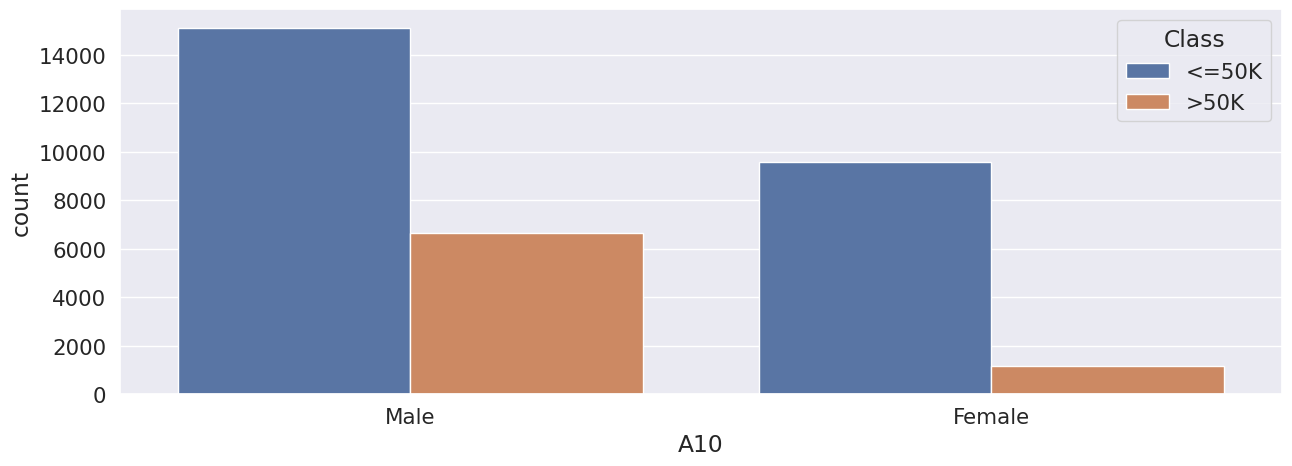

In [91]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A10'],order=dataset['A10'].value_counts().index,hue=dataset['Class'])
plt.show()

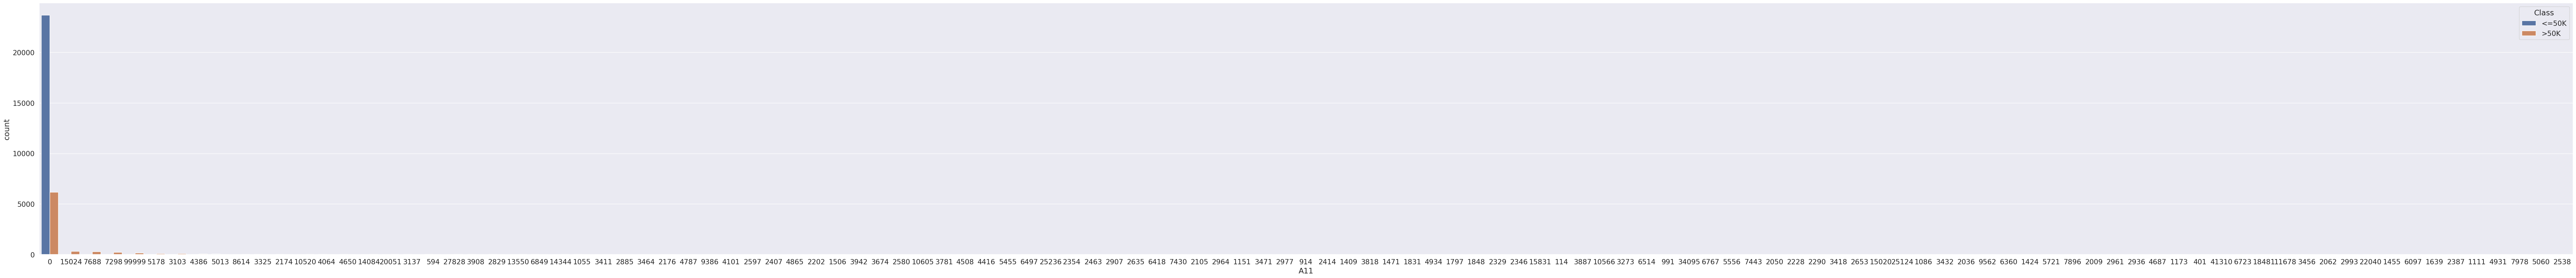

In [92]:
plt.subplots(figsize = (100,10))
sns.countplot(x=dataset['A11'],order=dataset['A11'].value_counts().index,hue=dataset['Class'])
plt.show()

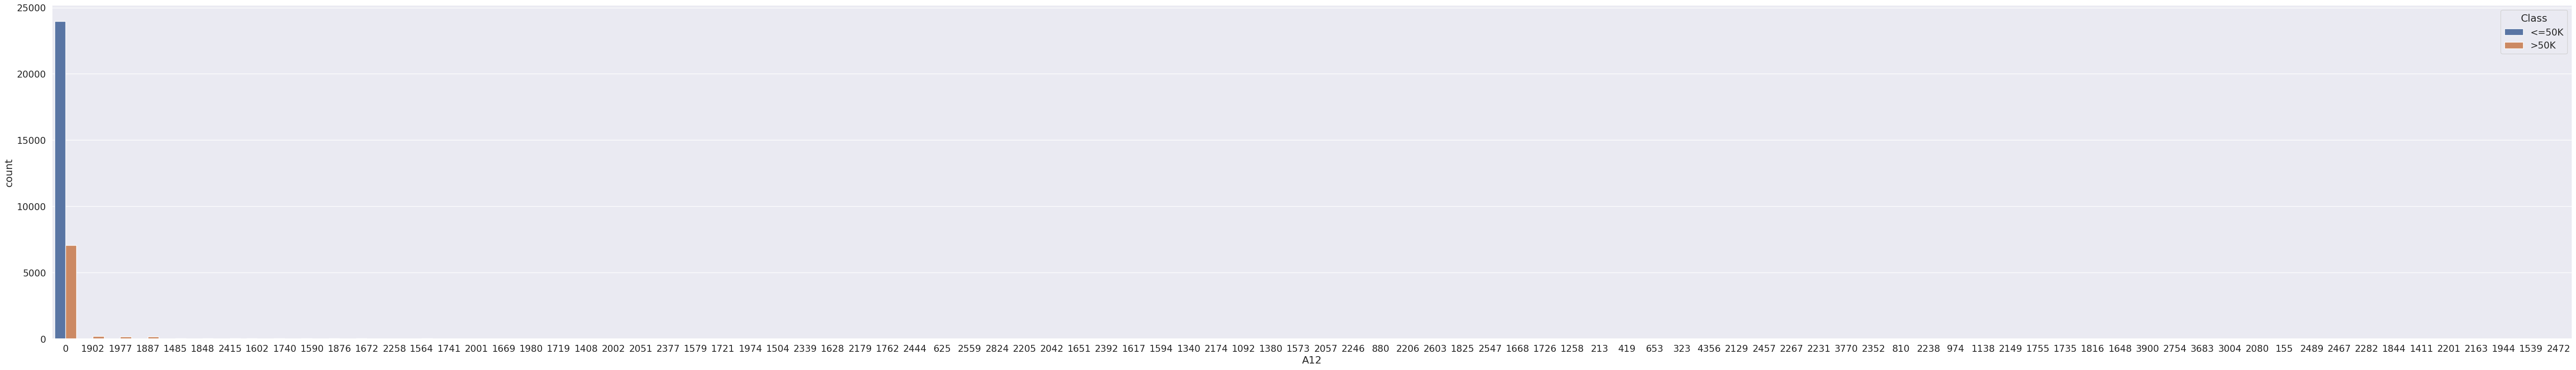

In [93]:
plt.subplots(figsize = (75,10))
sns.countplot(x=dataset['A12'],order=dataset['A12'].value_counts().index,hue=dataset['Class'])
plt.show()

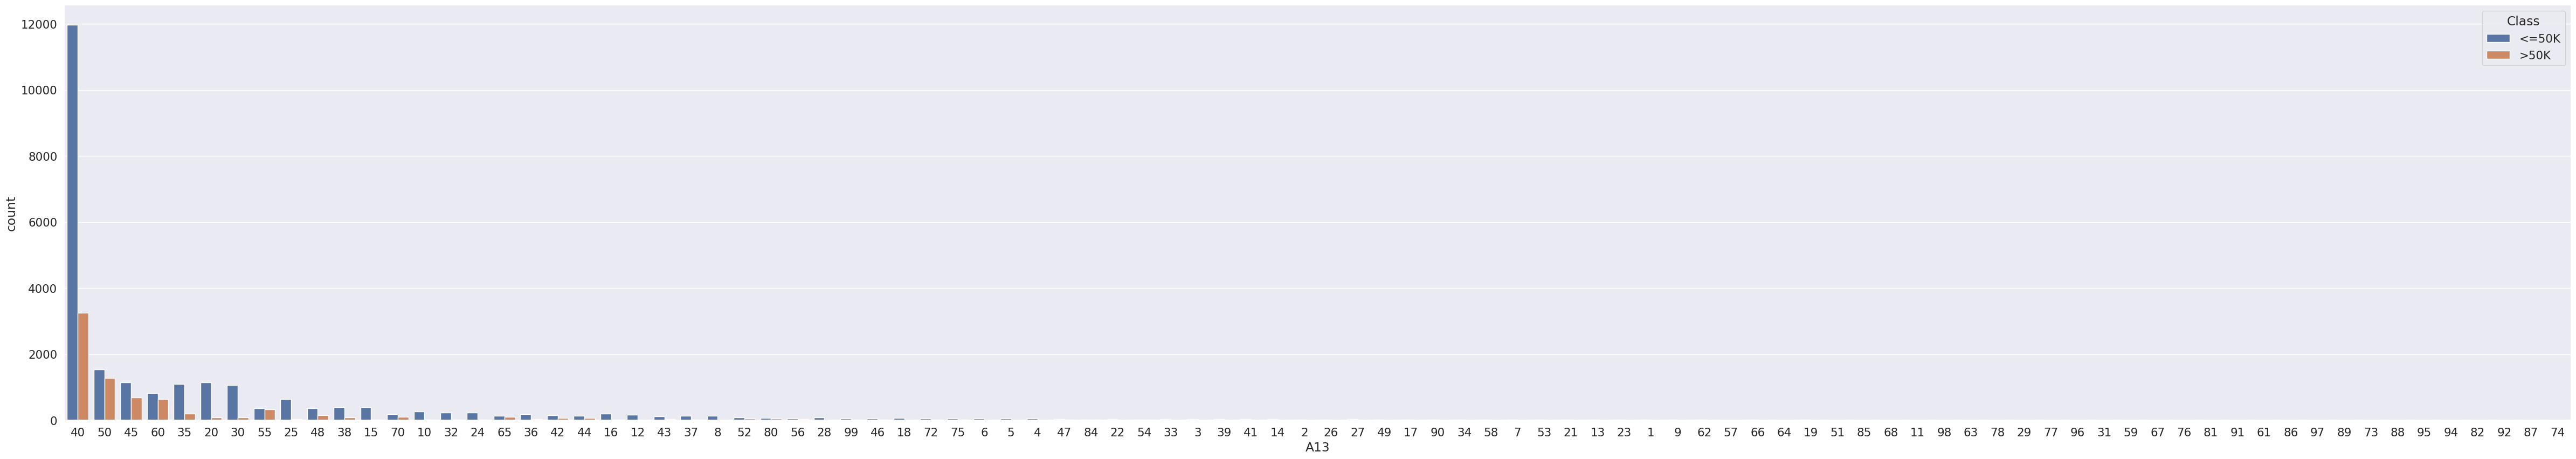

In [94]:
plt.subplots(figsize = (60,10))
sns.countplot(x=dataset['A13'],order=dataset['A13'].value_counts().index,hue=dataset['Class'])
plt.show()

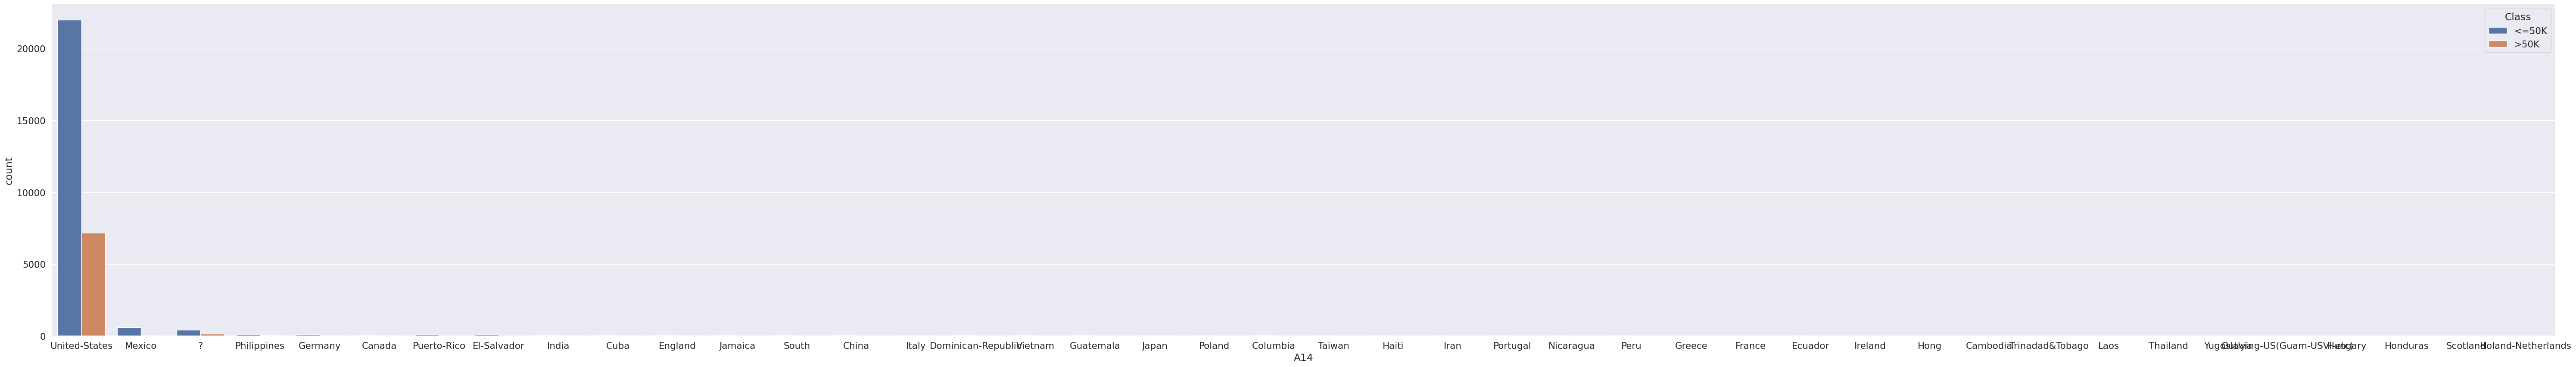

In [95]:
plt.subplots(figsize = (75,10))
sns.countplot(x=dataset['A14'],order=dataset['A14'].value_counts().index,hue=dataset['Class'])
plt.show()

**Cek Korelasi Tahap 1**

<ipython-input-96-d16bc9c96ddd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


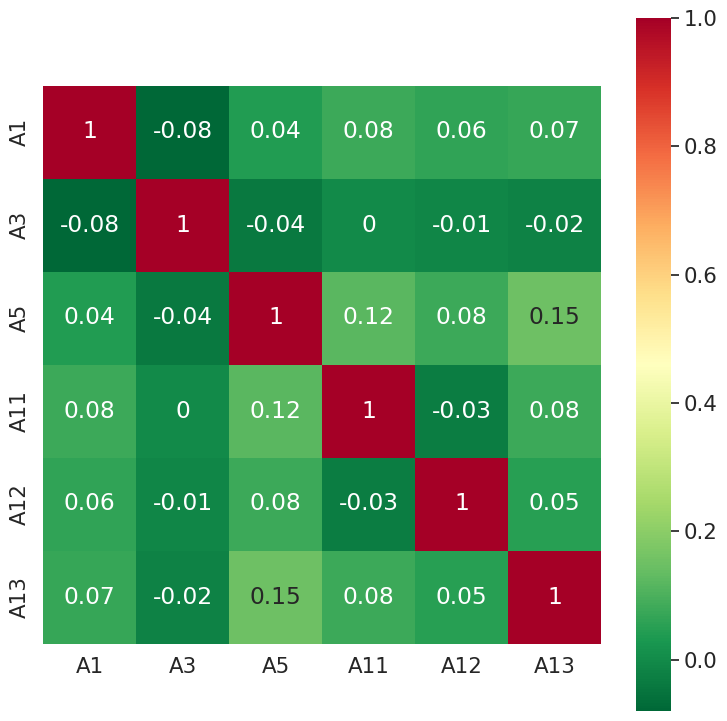

In [96]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

## BAB 3 – Memvalidasi Data

Hasil:
- Apakah masih ada data yang tersisa? atau nilai yang hilang
- Kelas hampir seimbang
- Tidak semua variabel muncul karena data masih dalam bentuk objek dan belum diklasifikasikan

Sehingga selanjutnya perlu mengubah objek menjadi angka dan proses menangani data yang hilang


## BAB 4 – Menentukan Objek Data
silakan generate table menggunakan https://www.tablesgenerator.com/markdown_tables

| age | workclass        | fnlwgt | education    | education.num | marital.status        | occupation        | relationship   | race               | sex    | capital.gain | capital.loss | hours.per.week | native.country     |       |
|-----|------------------|--------|--------------|---------------|-----------------------|-------------------|----------------|--------------------|--------|--------------|--------------|----------------|--------------------|-------|
| 90  | ?                | 77053  | HS-grad      | 9             | Widowed               | ?                 | Not-in-family  | White              | Female | 0            | 4356         | 40             | United-States      | <=50K |
| 82  | Private          | 132870 | HS-grad      | 9             | Widowed               | Exec-managerial   | Not-in-family  | White              | Female | 0            | 4356         | 18             | United-States      | <=50K |
| 66  | ?                | 186061 | Some-college | 10            | Widowed               | ?                 | Unmarried      | Black              | Female | 0            | 4356         | 40             | United-States      | <=50K |
| 54  | Private          | 140359 | 7th-8th      | 4             | Divorced              | Machine-op-inspct | Unmarried      | White              | Female | 0            | 3900         | 40             | United-States      | <=50K |
| 41  | Private          | 264663 | Some-college | 10            | Separated             | Prof-specialty    | Own-child      | White              | Female | 0            | 3900         | 40             | United-States      | <=50K |
| 34  | Private          | 216864 | HS-grad      | 9             | Divorced              | Other-service     | Unmarried      | White              | Female | 0            | 3770         | 45             | United-States      | <=50K |
| 38  | Private          | 150601 | 10th         | 6             | Separated             | Adm-clerical      | Unmarried      | White              | Male   | 0            | 3770         | 40             | United-States      | <=50K |
| 74  | State-gov        | 88638  | Doctorate    | 16            | Never-married         | Prof-specialty    | Other-relative | White              | Female | 0            | 3683         | 20             | United-States      | >50K  |
| 68  | Federal-gov      | 422013 | HS-grad      | 9             | Divorced              | Prof-specialty    | Not-in-family  | White              | Female | 0            | 3683         | 40             | United-States      | <=50K |
| 41  | Private          | 70037  | Some-college | 10            | Never-married         | Craft-repair      | Unmarried      | White              | Male   | 0            | 3004         | 60             | ?                  | >50K  |
| 45  | Private          | 172274 | Doctorate    | 16            | Divorced              | Prof-specialty    | Unmarried      | Black              | Female | 0            | 3004         | 35             | United-States      | >50K  |
| 38  | Self-emp-not-inc | 164526 | Prof-school  | 15            | Never-married         | Prof-specialty    | Not-in-family  | White              | Male   | 0            | 2824         | 45             | United-States      | >50K  |
| 52  | Private          | 129177 | Bachelors    | 13            | Widowed               | Other-service     | Not-in-family  | White              | Female | 0            | 2824         | 20             | United-States      | >50K  |
| 32  | Private          | 136204 | Masters      | 14            | Separated             | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 2824         | 55             | United-States      | >50K  |
| 51  | ?                | 172175 | Doctorate    | 16            | Never-married         | ?                 | Not-in-family  | White              | Male   | 0            | 2824         | 40             | United-States      | >50K  |
| 46  | Private          | 45363  | Prof-school  | 15            | Divorced              | Prof-specialty    | Not-in-family  | White              | Male   | 0            | 2824         | 40             | United-States      | >50K  |
| 45  | Private          | 172822 | 11th         | 7             | Divorced              | Transport-moving  | Not-in-family  | White              | Male   | 0            | 2824         | 76             | United-States      | >50K  |
| 57  | Private          | 317847 | Masters      | 14            | Divorced              | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 2824         | 50             | United-States      | >50K  |
| 22  | Private          | 119592 | Assoc-acdm   | 12            | Never-married         | Handlers-cleaners | Not-in-family  | Black              | Male   | 0            | 2824         | 40             | ?                  | >50K  |
| 34  | Private          | 203034 | Bachelors    | 13            | Separated             | Sales             | Not-in-family  | White              | Male   | 0            | 2824         | 50             | United-States      | >50K  |
| 37  | Private          | 188774 | Bachelors    | 13            | Never-married         | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 2824         | 40             | United-States      | >50K  |
| 29  | Private          | 77009  | 11th         | 7             | Separated             | Sales             | Not-in-family  | White              | Female | 0            | 2754         | 42             | United-States      | <=50K |
| 61  | Private          | 29059  | HS-grad      | 9             | Divorced              | Sales             | Unmarried      | White              | Female | 0            | 2754         | 25             | United-States      | <=50K |
| 51  | Private          | 153870 | Some-college | 10            | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 2603         | 40             | United-States      | <=50K |
| 61  | ?                | 135285 | HS-grad      | 9             | Married-civ-spouse    | ?                 | Husband        | White              | Male   | 0            | 2603         | 32             | United-States      | <=50K |
| 21  | Private          | 34310  | Assoc-voc    | 11            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2603         | 40             | United-States      | <=50K |
| 33  | Private          | 228696 | 1st-4th      | 2             | Married-civ-spouse    | Craft-repair      | Not-in-family  | White              | Male   | 0            | 2603         | 32             | Mexico             | <=50K |
| 49  | Private          | 122066 | 5th-6th      | 3             | Married-civ-spouse    | Other-service     | Husband        | White              | Male   | 0            | 2603         | 40             | Greece             | <=50K |
| 37  | Self-emp-inc     | 107164 | 10th         | 6             | Never-married         | Transport-moving  | Not-in-family  | White              | Male   | 0            | 2559         | 50             | United-States      | >50K  |
| 38  | Private          | 175360 | 10th         | 6             | Never-married         | Prof-specialty    | Not-in-family  | White              | Male   | 0            | 2559         | 90             | United-States      | >50K  |
| 23  | Private          | 44064  | Some-college | 10            | Separated             | Other-service     | Not-in-family  | White              | Male   | 0            | 2559         | 40             | United-States      | >50K  |
| 59  | Self-emp-inc     | 107287 | 10th         | 6             | Widowed               | Exec-managerial   | Unmarried      | White              | Female | 0            | 2559         | 50             | United-States      | >50K  |
| 52  | Private          | 198863 | Prof-school  | 15            | Divorced              | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 2559         | 60             | United-States      | >50K  |
| 51  | Private          | 123011 | Bachelors    | 13            | Divorced              | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 2559         | 50             | United-States      | >50K  |
| 60  | Self-emp-not-inc | 205246 | HS-grad      | 9             | Never-married         | Exec-managerial   | Not-in-family  | Black              | Male   | 0            | 2559         | 50             | United-States      | >50K  |
| 63  | Federal-gov      | 39181  | Doctorate    | 16            | Divorced              | Exec-managerial   | Not-in-family  | White              | Female | 0            | 2559         | 60             | United-States      | >50K  |
| 53  | Private          | 149650 | HS-grad      | 9             | Never-married         | Sales             | Not-in-family  | White              | Male   | 0            | 2559         | 48             | United-States      | >50K  |
| 51  | Private          | 197163 | Prof-school  | 15            | Never-married         | Prof-specialty    | Not-in-family  | White              | Female | 0            | 2559         | 50             | United-States      | >50K  |
| 37  | Self-emp-not-inc | 137527 | Doctorate    | 16            | Never-married         | Prof-specialty    | Not-in-family  | White              | Female | 0            | 2559         | 60             | United-States      | >50K  |
| 54  | Private          | 161691 | Masters      | 14            | Divorced              | Prof-specialty    | Not-in-family  | White              | Female | 0            | 2559         | 40             | United-States      | >50K  |
| 44  | Private          | 326232 | Bachelors    | 13            | Divorced              | Exec-managerial   | Unmarried      | White              | Male   | 0            | 2547         | 50             | United-States      | >50K  |
| 43  | Private          | 115806 | Masters      | 14            | Divorced              | Exec-managerial   | Unmarried      | White              | Female | 0            | 2547         | 40             | United-States      | >50K  |
| 51  | Private          | 115066 | Some-college | 10            | Divorced              | Adm-clerical      | Unmarried      | White              | Female | 0            | 2547         | 40             | United-States      | >50K  |
| 43  | Private          | 289669 | Masters      | 14            | Divorced              | Prof-specialty    | Unmarried      | White              | Female | 0            | 2547         | 40             | United-States      | >50K  |
| 71  | ?                | 100820 | HS-grad      | 9             | Married-civ-spouse    | ?                 | Husband        | White              | Male   | 0            | 2489         | 15             | United-States      | <=50K |
| 48  | Private          | 121253 | Bachelors    | 13            | Married-spouse-absent | Sales             | Unmarried      | White              | Female | 0            | 2472         | 70             | United-States      | >50K  |
| 71  | Private          | 110380 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2467         | 52             | United-States      | <=50K |
| 73  | Self-emp-not-inc | 233882 | HS-grad      | 9             | Married-civ-spouse    | Farming-fishing   | Husband        | Asian-Pac-Islander | Male   | 0            | 2457         | 40             | Vietnam            | <=50K |
| 68  | ?                | 192052 | Some-college | 10            | Married-civ-spouse    | ?                 | Wife           | White              | Female | 0            | 2457         | 40             | United-States      | <=50K |
| 67  | ?                | 174995 | Some-college | 10            | Married-civ-spouse    | ?                 | Husband        | White              | Male   | 0            | 2457         | 40             | United-States      | <=50K |
| 40  | Self-emp-not-inc | 335549 | Prof-school  | 15            | Never-married         | Prof-specialty    | Not-in-family  | White              | Male   | 0            | 2444         | 45             | United-States      | >50K  |
| 50  | Private          | 237729 | HS-grad      | 9             | Widowed               | Sales             | Not-in-family  | White              | Female | 0            | 2444         | 72             | United-States      | >50K  |
| 51  | State-gov        | 68898  | Assoc-voc    | 11            | Divorced              | Tech-support      | Not-in-family  | White              | Male   | 0            | 2444         | 39             | United-States      | >50K  |
| 42  | Private          | 107276 | Some-college | 10            | Never-married         | Exec-managerial   | Not-in-family  | White              | Female | 0            | 2444         | 40             | United-States      | >50K  |
| 39  | Private          | 141584 | Masters      | 14            | Never-married         | Sales             | Not-in-family  | White              | Male   | 0            | 2444         | 45             | United-States      | >50K  |
| 32  | Private          | 207668 | Bachelors    | 13            | Never-married         | Exec-managerial   | Other-relative | White              | Male   | 0            | 2444         | 50             | United-States      | >50K  |
| 53  | Private          | 313243 | Some-college | 10            | Separated             | Craft-repair      | Not-in-family  | White              | Male   | 0            | 2444         | 45             | United-States      | >50K  |
| 40  | Local-gov        | 147372 | Some-college | 10            | Never-married         | Protective-serv   | Not-in-family  | White              | Male   | 0            | 2444         | 40             | United-States      | >50K  |
| 38  | Private          | 237608 | Bachelors    | 13            | Never-married         | Sales             | Not-in-family  | White              | Female | 0            | 2444         | 45             | United-States      | >50K  |
| 33  | Private          | 194901 | Assoc-voc    | 11            | Separated             | Craft-repair      | Not-in-family  | White              | Male   | 0            | 2444         | 42             | United-States      | >50K  |
| 43  | Private          | 155106 | Assoc-acdm   | 12            | Divorced              | Craft-repair      | Not-in-family  | White              | Male   | 0            | 2444         | 70             | United-States      | >50K  |
| 50  | Self-emp-inc     | 121441 | 11th         | 7             | Never-married         | Exec-managerial   | Other-relative | White              | Male   | 0            | 2444         | 40             | United-States      | >50K  |
| 44  | Private          | 162028 | Some-college | 10            | Married-civ-spouse    | Adm-clerical      | Wife           | White              | Female | 0            | 2415         | 6              | United-States      | >50K  |
| 51  | Self-emp-not-inc | 160724 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | Asian-Pac-Islander | Male   | 0            | 2415         | 40             | China              | >50K  |
| 41  | Private          | 132222 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2415         | 40             | United-States      | >50K  |
| 60  | Self-emp-inc     | 226355 | Assoc-voc    | 11            | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 2415         | 70             | ?                  | >50K  |
| 37  | Private          | 329980 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2415         | 60             | United-States      | >50K  |
| 55  | Self-emp-inc     | 124137 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2415         | 35             | Greece             | >50K  |
| 39  | Self-emp-inc     | 329980 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2415         | 60             | United-States      | >50K  |
| 42  | Self-emp-inc     | 187702 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2415         | 60             | United-States      | >50K  |
| 49  | Private          | 199029 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2415         | 55             | United-States      | >50K  |
| 47  | Self-emp-not-inc | 145290 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2415         | 50             | United-States      | >50K  |
| 41  | Local-gov        | 297248 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2415         | 45             | United-States      | >50K  |
| 55  | Self-emp-inc     | 227856 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2415         | 50             | United-States      | >50K  |
| 39  | Private          | 179731 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Wife           | White              | Female | 0            | 2415         | 65             | United-States      | >50K  |
| 42  | Private          | 154374 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2415         | 60             | United-States      | >50K  |
| 41  | ?                | 27187  | Assoc-voc    | 11            | Married-civ-spouse    | ?                 | Husband        | White              | Male   | 0            | 2415         | 12             | United-States      | >50K  |
| 46  | Private          | 326857 | Masters      | 14            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2415         | 65             | United-States      | >50K  |
| 40  | Private          | 160369 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2415         | 45             | United-States      | >50K  |
| 32  | Private          | 396745 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2415         | 48             | United-States      | >50K  |
| 41  | Self-emp-inc     | 151089 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2415         | 55             | United-States      | >50K  |
| 60  | Self-emp-inc     | 336188 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2415         | 80             | United-States      | >50K  |
| 31  | Private          | 279015 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2415         | 70             | Taiwan             | >50K  |
| 58  | Self-emp-not-inc | 43221  | Some-college | 10            | Married-civ-spouse    | Farming-fishing   | Husband        | White              | Male   | 0            | 2415         | 40             | United-States      | >50K  |
| 37  | Self-emp-inc     | 30529  | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2415         | 50             | United-States      | >50K  |
| 44  | Self-emp-not-inc | 201742 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2415         | 50             | United-States      | >50K  |
| 39  | Self-emp-not-inc | 218490 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2415         | 50             | ?                  | >50K  |
| 43  | Federal-gov      | 156996 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | Asian-Pac-Islander | Male   | 0            | 2415         | 55             | ?                  | >50K  |
| 55  | Self-emp-inc     | 298449 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2415         | 50             | United-States      | >50K  |
| 44  | Self-emp-inc     | 191712 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2415         | 55             | United-States      | >50K  |
| 39  | Private          | 198654 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | Asian-Pac-Islander | Male   | 0            | 2415         | 67             | India              | >50K  |
| 46  | Self-emp-not-inc | 102308 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2415         | 40             | United-States      | >50K  |
| 39  | Private          | 348521 | Some-college | 10            | Married-civ-spouse    | Farming-fishing   | Husband        | White              | Male   | 0            | 2415         | 99             | United-States      | >50K  |
| 62  | Self-emp-inc     | 56248  | Bachelors    | 13            | Married-civ-spouse    | Farming-fishing   | Husband        | White              | Male   | 0            | 2415         | 60             | United-States      | >50K  |
| 31  | Self-emp-not-inc | 252752 | HS-grad      | 9             | Married-civ-spouse    | Other-service     | Wife           | White              | Female | 0            | 2415         | 40             | United-States      | >50K  |
| 46  | Private          | 192963 | Bachelors    | 13            | Married-civ-spouse    | Adm-clerical      | Husband        | Asian-Pac-Islander | Male   | 0            | 2415         | 35             | Philippines        | >50K  |
| 46  | Self-emp-not-inc | 198759 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2415         | 80             | United-States      | >50K  |
| 39  | Self-emp-inc     | 143123 | Assoc-voc    | 11            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2415         | 40             | United-States      | >50K  |
| 39  | Private          | 237713 | Prof-school  | 15            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2415         | 99             | United-States      | >50K  |
| 59  | Private          | 81929  | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2415         | 45             | United-States      | >50K  |
| 50  | Self-emp-inc     | 167793 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2415         | 60             | United-States      | >50K  |
| 46  | Private          | 456062 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2415         | 55             | United-States      | >50K  |
| 53  | Self-emp-not-inc | 105478 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2415         | 40             | United-States      | >50K  |
| 50  | Self-emp-not-inc | 42402  | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2415         | 30             | United-States      | >50K  |
| 41  | Self-emp-inc     | 114580 | Prof-school  | 15            | Married-civ-spouse    | Exec-managerial   | Wife           | White              | Female | 0            | 2415         | 55             | United-States      | >50K  |
| 36  | Private          | 346478 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2415         | 45             | United-States      | >50K  |
| 38  | Private          | 187870 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2415         | 90             | United-States      | >50K  |
| 54  | Private          | 35576  | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2415         | 50             | United-States      | >50K  |
| 50  | Private          | 102346 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Wife           | White              | Female | 0            | 2415         | 20             | United-States      | >50K  |
| 47  | Private          | 148995 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2415         | 60             | United-States      | >50K  |
| 47  | Self-emp-inc     | 102308 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2415         | 45             | United-States      | >50K  |
| 67  | Private          | 105252 | Bachelors    | 13            | Widowed               | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 2392         | 40             | United-States      | >50K  |
| 67  | Self-emp-inc     | 106175 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2392         | 75             | United-States      | >50K  |
| 72  | Self-emp-not-inc | 52138  | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2392         | 25             | United-States      | >50K  |
| 72  | ?                | 118902 | Doctorate    | 16            | Married-civ-spouse    | ?                 | Husband        | White              | Male   | 0            | 2392         | 6              | United-States      | >50K  |
| 46  | Self-emp-inc     | 191978 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2392         | 50             | United-States      | >50K  |
| 78  | Self-emp-inc     | 188044 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2392         | 40             | United-States      | >50K  |
| 71  | Self-emp-inc     | 66624  | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2392         | 60             | United-States      | >50K  |
| 83  | Self-emp-inc     | 153183 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2392         | 55             | United-States      | >50K  |
| 68  | Private          | 211287 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2392         | 40             | United-States      | >50K  |
| 26  | Private          | 181655 | Assoc-voc    | 11            | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 2377         | 45             | United-States      | <=50K |
| 68  | State-gov        | 235882 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2377         | 60             | United-States      | >50K  |
| 49  | Self-emp-inc     | 158685 | HS-grad      | 9             | Married-civ-spouse    | Adm-clerical      | Wife           | White              | Female | 0            | 2377         | 40             | United-States      | >50K  |
| 36  | Private          | 370767 | HS-grad      | 9             | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2377         | 60             | United-States      | <=50K |
| 70  | Self-emp-not-inc | 155141 | Bachelors    | 13            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2377         | 12             | United-States      | >50K  |
| 27  | Private          | 156516 | Some-college | 10            | Married-civ-spouse    | Adm-clerical      | Wife           | Black              | Female | 0            | 2377         | 20             | United-States      | <=50K |
| 35  | Local-gov        | 177305 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2377         | 40             | United-States      | <=50K |
| 23  | Private          | 162945 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2377         | 40             | United-States      | <=50K |
| 81  | Private          | 177408 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2377         | 26             | United-States      | >50K  |
| 66  | Self-emp-not-inc | 427422 | Doctorate    | 16            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2377         | 25             | United-States      | >50K  |
| 71  | Private          | 152307 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2377         | 45             | United-States      | >50K  |
| 68  | Private          | 218637 | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2377         | 55             | United-States      | >50K  |
| 68  | State-gov        | 202699 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2377         | 42             | ?                  | >50K  |
| 65  | ?                | 240857 | Bachelors    | 13            | Married-civ-spouse    | ?                 | Husband        | White              | Male   | 0            | 2377         | 40             | United-States      | >50K  |
| 52  | Private          | 222405 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | Black              | Male   | 0            | 2377         | 40             | United-States      | <=50K |
| 40  | Self-emp-inc     | 110862 | Assoc-acdm   | 12            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2377         | 50             | United-States      | <=50K |
| 68  | ?                | 257269 | Bachelors    | 13            | Married-civ-spouse    | ?                 | Husband        | White              | Male   | 0            | 2377         | 35             | United-States      | >50K  |
| 21  | Private          | 377931 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2377         | 48             | United-States      | <=50K |
| 35  | Private          | 192923 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2377         | 40             | United-States      | <=50K |
| 70  | Self-emp-inc     | 207938 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2377         | 50             | United-States      | >50K  |
| 61  | Self-emp-not-inc | 36671  | HS-grad      | 9             | Married-civ-spouse    | Farming-fishing   | Husband        | White              | Male   | 0            | 2352         | 50             | United-States      | <=50K |
| 65  | Self-emp-inc     | 81413  | HS-grad      | 9             | Married-civ-spouse    | Farming-fishing   | Husband        | White              | Male   | 0            | 2352         | 65             | United-States      | <=50K |
| 46  | Private          | 214955 | 5th-6th      | 3             | Divorced              | Craft-repair      | Not-in-family  | White              | Female | 0            | 2339         | 45             | United-States      | <=50K |
| 26  | Local-gov        | 166295 | Bachelors    | 13            | Never-married         | Prof-specialty    | Not-in-family  | White              | Male   | 0            | 2339         | 55             | United-States      | <=50K |
| 59  | Local-gov        | 147707 | HS-grad      | 9             | Widowed               | Farming-fishing   | Unmarried      | White              | Male   | 0            | 2339         | 40             | United-States      | <=50K |
| 61  | Private          | 43554  | 5th-6th      | 3             | Never-married         | Handlers-cleaners | Not-in-family  | Black              | Male   | 0            | 2339         | 40             | United-States      | <=50K |
| 60  | State-gov        | 358893 | Bachelors    | 13            | Divorced              | Prof-specialty    | Not-in-family  | White              | Female | 0            | 2339         | 40             | United-States      | <=50K |
| 49  | Self-emp-inc     | 141058 | Some-college | 10            | Divorced              | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 2339         | 50             | United-States      | <=50K |
| 34  | Private          | 25322  | Bachelors    | 13            | Married-spouse-absent | Machine-op-inspct | Not-in-family  | Asian-Pac-Islander | Male   | 0            | 2339         | 40             | ?                  | <=50K |
| 25  | Private          | 77071  | Bachelors    | 13            | Never-married         | Prof-specialty    | Own-child      | White              | Female | 0            | 2339         | 35             | United-States      | <=50K |
| 55  | Private          | 158702 | Some-college | 10            | Never-married         | Adm-clerical      | Not-in-family  | Black              | Female | 0            | 2339         | 45             | ?                  | <=50K |
| 59  | Local-gov        | 171328 | HS-grad      | 9             | Separated             | Protective-serv   | Other-relative | Black              | Female | 0            | 2339         | 40             | United-States      | <=50K |
| 28  | State-gov        | 381789 | Some-college | 10            | Separated             | Exec-managerial   | Own-child      | White              | Male   | 0            | 2339         | 40             | United-States      | <=50K |
| 43  | ?                | 152569 | Assoc-voc    | 11            | Widowed               | ?                 | Not-in-family  | White              | Female | 0            | 2339         | 36             | United-States      | <=50K |
| 56  | Self-emp-not-inc | 346635 | Masters      | 14            | Divorced              | Sales             | Unmarried      | White              | Female | 0            | 2339         | 60             | United-States      | <=50K |
| 41  | Private          | 162140 | HS-grad      | 9             | Divorced              | Craft-repair      | Not-in-family  | White              | Male   | 0            | 2339         | 40             | United-States      | <=50K |
| 42  | Private          | 191765 | HS-grad      | 9             | Never-married         | Adm-clerical      | Other-relative | Black              | Female | 0            | 2339         | 40             | Trinadad&Tobago    | <=50K |
| 28  | Private          | 251905 | Prof-school  | 15            | Never-married         | Prof-specialty    | Not-in-family  | White              | Male   | 0            | 2339         | 40             | Canada             | <=50K |
| 40  | Self-emp-not-inc | 33310  | Prof-school  | 15            | Divorced              | Other-service     | Not-in-family  | White              | Female | 0            | 2339         | 35             | United-States      | <=50K |
| 69  | Private          | 228921 | Bachelors    | 13            | Widowed               | Prof-specialty    | Not-in-family  | White              | Male   | 0            | 2282         | 40             | United-States      | >50K  |
| 66  | Local-gov        | 36364  | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2267         | 40             | United-States      | <=50K |
| 69  | Private          | 124930 | 5th-6th      | 3             | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 2267         | 40             | United-States      | <=50K |
| 55  | Local-gov        | 176046 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 2267         | 40             | United-States      | <=50K |
| 57  | Federal-gov      | 370890 | HS-grad      | 9             | Never-married         | Adm-clerical      | Not-in-family  | White              | Male   | 0            | 2258         | 40             | United-States      | <=50K |
| 20  | Self-emp-not-inc | 157145 | Some-college | 10            | Never-married         | Farming-fishing   | Own-child      | White              | Male   | 0            | 2258         | 10             | United-States      | <=50K |
| 33  | Private          | 288825 | HS-grad      | 9             | Divorced              | Craft-repair      | Not-in-family  | White              | Male   | 0            | 2258         | 84             | United-States      | <=50K |
| 30  | Self-emp-not-inc | 257295 | Some-college | 10            | Never-married         | Sales             | Other-relative | Asian-Pac-Islander | Male   | 0            | 2258         | 40             | South              | <=50K |
| 40  | Private          | 287983 | Bachelors    | 13            | Never-married         | Tech-support      | Not-in-family  | Asian-Pac-Islander | Female | 0            | 2258         | 48             | Philippines        | <=50K |
| 38  | Private          | 101978 | Some-college | 10            | Separated             | Machine-op-inspct | Not-in-family  | White              | Male   | 0            | 2258         | 55             | United-States      | >50K  |
| 46  | State-gov        | 192779 | Assoc-acdm   | 12            | Divorced              | Adm-clerical      | Unmarried      | White              | Male   | 0            | 2258         | 38             | United-States      | >50K  |
| 29  | Private          | 135296 | Bachelors    | 13            | Never-married         | Exec-managerial   | Not-in-family  | White              | Female | 0            | 2258         | 45             | United-States      | >50K  |
| 57  | Federal-gov      | 199114 | Bachelors    | 13            | Never-married         | Adm-clerical      | Not-in-family  | White              | Male   | 0            | 2258         | 40             | United-States      | <=50K |
| 39  | Private          | 156897 | HS-grad      | 9             | Never-married         | Craft-repair      | Own-child      | White              | Male   | 0            | 2258         | 42             | United-States      | >50K  |
| 47  | Private          | 138107 | Bachelors    | 13            | Divorced              | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 2258         | 40             | United-States      | >50K  |
| 26  | Private          | 279833 | Bachelors    | 13            | Never-married         | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 2258         | 45             | United-States      | >50K  |
| 27  | Self-emp-not-inc | 208577 | HS-grad      | 9             | Never-married         | Craft-repair      | Not-in-family  | White              | Male   | 0            | 2258         | 50             | United-States      | <=50K |
| 23  | Private          | 102942 | Bachelors    | 13            | Never-married         | Prof-specialty    | Own-child      | White              | Female | 0            | 2258         | 40             | United-States      | >50K  |
| 34  | Private          | 36385  | Masters      | 14            | Never-married         | Prof-specialty    | Not-in-family  | White              | Male   | 0            | 2258         | 50             | United-States      | <=50K |
| 33  | Private          | 176185 | 12th         | 8             | Divorced              | Craft-repair      | Not-in-family  | White              | Male   | 0            | 2258         | 42             | United-States      | <=50K |
| 38  | Local-gov        | 162613 | Masters      | 14            | Never-married         | Prof-specialty    | Not-in-family  | White              | Female | 0            | 2258         | 60             | United-States      | <=50K |
| 57  | Private          | 121362 | Some-college | 10            | Widowed               | Adm-clerical      | Unmarried      | White              | Female | 0            | 2258         | 38             | United-States      | >50K  |
| 36  | Private          | 145933 | HS-grad      | 9             | Never-married         | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 2258         | 70             | United-States      | <=50K |
| 44  | Federal-gov      | 29591  | Bachelors    | 13            | Divorced              | Tech-support      | Not-in-family  | White              | Male   | 0            | 2258         | 40             | United-States      | >50K  |
| 49  | State-gov        | 269417 | Doctorate    | 16            | Never-married         | Exec-managerial   | Not-in-family  | White              | Female | 0            | 2258         | 50             | United-States      | >50K  |
| 44  | Self-emp-inc     | 178510 | Some-college | 10            | Never-married         | Sales             | Not-in-family  | White              | Male   | 0            | 2258         | 60             | United-States      | <=50K |
| 55  | Private          | 41108  | Some-college | 10            | Widowed               | Farming-fishing   | Not-in-family  | White              | Male   | 0            | 2258         | 62             | United-States      | >50K  |
| 45  | Private          | 187901 | HS-grad      | 9             | Divorced              | Farming-fishing   | Not-in-family  | White              | Male   | 0            | 2258         | 44             | United-States      | >50K  |
| 48  | Private          | 175070 | HS-grad      | 9             | Divorced              | Exec-managerial   | Not-in-family  | White              | Female | 0            | 2258         | 40             | United-States      | >50K  |
| 31  | Private          | 263561 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2246         | 45             | United-States      | >50K  |
| 55  | Local-gov        | 99131  | HS-grad      | 9             | Married-civ-spouse    | Prof-specialty    | Other-relative | White              | Female | 0            | 2246         | 40             | United-States      | >50K  |
| 70  | Self-emp-not-inc | 143833 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2246         | 40             | United-States      | >50K  |
| 70  | Self-emp-not-inc | 124449 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2246         | 8              | United-States      | >50K  |
| 73  | Private          | 336007 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2246         | 40             | United-States      | >50K  |
| 72  | Self-emp-not-inc | 285408 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2246         | 28             | United-States      | >50K  |
| 31  | Private          | 327825 | HS-grad      | 9             | Separated             | Machine-op-inspct | Unmarried      | White              | Female | 0            | 2238         | 40             | United-States      | <=50K |
| 28  | Private          | 129460 | 10th         | 6             | Widowed               | Adm-clerical      | Unmarried      | White              | Female | 0            | 2238         | 35             | United-States      | <=50K |
| 23  | Self-emp-not-inc | 258298 | Bachelors    | 13            | Never-married         | Adm-clerical      | Own-child      | White              | Male   | 0            | 2231         | 40             | United-States      | >50K  |
| 49  | Local-gov        | 102359 | 9th          | 5             | Widowed               | Handlers-cleaners | Unmarried      | White              | Male   | 0            | 2231         | 40             | United-States      | >50K  |
| 27  | Local-gov        | 92431  | Some-college | 10            | Never-married         | Protective-serv   | Not-in-family  | White              | Male   | 0            | 2231         | 40             | United-States      | >50K  |
| 90  | Private          | 51744  | HS-grad      | 9             | Never-married         | Other-service     | Not-in-family  | Black              | Male   | 0            | 2206         | 40             | United-States      | <=50K |
| 68  | Private          | 166149 | HS-grad      | 9             | Widowed               | Adm-clerical      | Not-in-family  | White              | Female | 0            | 2206         | 30             | United-States      | <=50K |
| 65  | Private          | 149811 | HS-grad      | 9             | Divorced              | Adm-clerical      | Unmarried      | White              | Female | 0            | 2206         | 59             | Canada             | <=50K |
| 65  | ?                | 143118 | HS-grad      | 9             | Widowed               | ?                 | Unmarried      | White              | Female | 0            | 2206         | 10             | United-States      | <=50K |
| 67  | Private          | 118363 | Bachelors    | 13            | Divorced              | Exec-managerial   | Not-in-family  | White              | Female | 0            | 2206         | 5              | United-States      | <=50K |
| 66  | Local-gov        | 362165 | Bachelors    | 13            | Widowed               | Prof-specialty    | Not-in-family  | Black              | Female | 0            | 2206         | 25             | United-States      | <=50K |
| 24  | Private          | 379066 | Some-college | 10            | Never-married         | Adm-clerical      | Not-in-family  | White              | Male   | 0            | 2205         | 24             | United-States      | <=50K |
| 44  | Self-emp-not-inc | 171424 | Some-college | 10            | Divorced              | Machine-op-inspct | Not-in-family  | White              | Male   | 0            | 2205         | 35             | United-States      | <=50K |
| 35  | Private          | 108293 | Some-college | 10            | Never-married         | Adm-clerical      | Own-child      | White              | Female | 0            | 2205         | 40             | United-States      | <=50K |
| 20  | Private          | 107801 | Assoc-acdm   | 12            | Never-married         | Other-service     | Own-child      | White              | Female | 0            | 2205         | 18             | United-States      | <=50K |
| 38  | Private          | 126675 | HS-grad      | 9             | Divorced              | Craft-repair      | Not-in-family  | White              | Male   | 0            | 2205         | 40             | United-States      | <=50K |
| 39  | Private          | 155603 | Some-college | 10            | Never-married         | Other-service     | Own-child      | Black              | Female | 0            | 2205         | 40             | United-States      | <=50K |
| 32  | Private          | 27882  | Some-college | 10            | Never-married         | Machine-op-inspct | Other-relative | White              | Female | 0            | 2205         | 40             | Holand-Netherlands | <=50K |
| 42  | Private          | 242564 | 7th-8th      | 4             | Never-married         | Handlers-cleaners | Not-in-family  | Black              | Male   | 0            | 2205         | 40             | United-States      | <=50K |
| 63  | ?                | 234083 | HS-grad      | 9             | Divorced              | ?                 | Not-in-family  | White              | Female | 0            | 2205         | 40             | United-States      | <=50K |
| 42  | Self-emp-inc     | 23510  | Masters      | 14            | Divorced              | Exec-managerial   | Unmarried      | Asian-Pac-Islander | Male   | 0            | 2201         | 60             | India              | >50K  |
| 64  | Private          | 181232 | 11th         | 7             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2179         | 40             | United-States      | <=50K |
| 28  | Private          | 166481 | 7th-8th      | 4             | Married-civ-spouse    | Handlers-cleaners | Husband        | Other              | Male   | 0            | 2179         | 40             | Puerto-Rico        | <=50K |
| 41  | Self-emp-inc     | 139916 | Assoc-voc    | 11            | Married-civ-spouse    | Sales             | Husband        | Other              | Male   | 0            | 2179         | 84             | Mexico             | <=50K |
| 41  | Self-emp-not-inc | 144594 | 7th-8th      | 4             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2179         | 40             | United-States      | <=50K |
| 58  | Self-emp-not-inc | 266707 | 1st-4th      | 2             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 2179         | 18             | United-States      | <=50K |
| 59  | State-gov        | 303176 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2179         | 40             | United-States      | <=50K |
| 34  | Self-emp-not-inc | 56460  | HS-grad      | 9             | Married-civ-spouse    | Farming-fishing   | Wife           | White              | Female | 0            | 2179         | 12             | United-States      | <=50K |
| 45  | Private          | 167523 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 2179         | 45             | United-States      | <=50K |
| 29  | Private          | 119004 | HS-grad      | 9             | Married-civ-spouse    | Adm-clerical      | Wife           | White              | Female | 0            | 2179         | 40             | United-States      | <=50K |
| 47  | Private          | 175925 | 10th         | 6             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2179         | 52             | United-States      | <=50K |
| 40  | Private          | 212847 | Some-college | 10            | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 2179         | 40             | United-States      | <=50K |
| 47  | Self-emp-not-inc | 191175 | 5th-6th      | 3             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2179         | 50             | Mexico             | <=50K |
| 63  | ?                | 83043  | Bachelors    | 13            | Married-civ-spouse    | ?                 | Husband        | White              | Male   | 0            | 2179         | 45             | United-States      | <=50K |
| 41  | Self-emp-not-inc | 170214 | HS-grad      | 9             | Married-civ-spouse    | Handlers-cleaners | Husband        | White              | Male   | 0            | 2179         | 40             | United-States      | <=50K |
| 34  | Private          | 180714 | Some-college | 10            | Married-civ-spouse    | Transport-moving  | Husband        | Black              | Male   | 0            | 2179         | 40             | United-States      | <=50K |
| 66  | ?                | 177351 | Bachelors    | 13            | Married-civ-spouse    | ?                 | Husband        | White              | Male   | 0            | 2174         | 40             | United-States      | >50K  |
| 65  | Self-emp-not-inc | 111483 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2174         | 10             | United-States      | >50K  |
| 70  | Private          | 282642 | HS-grad      | 9             | Married-civ-spouse    | Handlers-cleaners | Husband        | White              | Male   | 0            | 2174         | 40             | United-States      | >50K  |
| 75  | Self-emp-not-inc | 309955 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2174         | 50             | United-States      | >50K  |
| 65  | State-gov        | 215908 | HS-grad      | 9             | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 2174         | 40             | United-States      | >50K  |
| 65  | Federal-gov      | 23494  | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | Black              | Male   | 0            | 2174         | 40             | United-States      | >50K  |
| 73  | Private          | 147551 | Some-college | 10            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2174         | 50             | United-States      | >50K  |
| 60  | ?                | 141221 | Bachelors    | 13            | Married-civ-spouse    | ?                 | Husband        | Asian-Pac-Islander | Male   | 0            | 2163         | 25             | South              | <=50K |
| 68  | Self-emp-not-inc | 116903 | Assoc-voc    | 11            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2149         | 40             | United-States      | <=50K |
| 74  | Self-emp-not-inc | 119129 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2149         | 20             | United-States      | <=50K |
| 43  | Private          | 143582 | 5th-6th      | 3             | Married-civ-spouse    | Machine-op-inspct | Wife           | Asian-Pac-Islander | Female | 0            | 2129         | 72             | ?                  | <=50K |
| 19  | Self-emp-not-inc | 342384 | 11th         | 7             | Married-civ-spouse    | Craft-repair      | Own-child      | White              | Male   | 0            | 2129         | 55             | United-States      | <=50K |
| 37  | Self-emp-not-inc | 68899  | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2129         | 40             | United-States      | <=50K |
| 45  | Federal-gov      | 207107 | Assoc-acdm   | 12            | Divorced              | Adm-clerical      | Unmarried      | Asian-Pac-Islander | Male   | 0            | 2080         | 40             | Philippines        | <=50K |
| 64  | Private          | 149044 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | Asian-Pac-Islander | Male   | 0            | 2057         | 60             | China              | <=50K |
| 30  | Private          | 148524 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 2057         | 40             | United-States      | <=50K |
| 51  | Self-emp-not-inc | 268639 | Some-college | 10            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 2057         | 60             | Canada             | <=50K |
| 35  | Private          | 272019 | 11th         | 7             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2057         | 40             | United-States      | <=50K |
| 29  | Private          | 239753 | HS-grad      | 9             | Married-civ-spouse    | Adm-clerical      | Wife           | White              | Female | 0            | 2057         | 20             | United-States      | <=50K |
| 34  | Private          | 199864 | Some-college | 10            | Married-civ-spouse    | Adm-clerical      | Wife           | White              | Female | 0            | 2057         | 40             | United-States      | <=50K |
| 41  | Private          | 125831 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2051         | 60             | United-States      | <=50K |
| 35  | Private          | 67728  | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2051         | 45             | United-States      | <=50K |
| 26  | Private          | 115717 | Some-college | 10            | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 2051         | 40             | United-States      | <=50K |
| 54  | Private          | 172281 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 2051         | 50             | United-States      | <=50K |
| 52  | Local-gov        | 305053 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2051         | 40             | United-States      | <=50K |
| 50  | Self-emp-not-inc | 105010 | HS-grad      | 9             | Married-civ-spouse    | Farming-fishing   | Husband        | White              | Male   | 0            | 2051         | 20             | United-States      | <=50K |
| 31  | Private          | 291052 | Some-college | 10            | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 2051         | 40             | United-States      | <=50K |
| 38  | Federal-gov      | 248919 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 2051         | 40             | United-States      | <=50K |
| 30  | Private          | 84119  | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2051         | 40             | United-States      | <=50K |
| 34  | Local-gov        | 105540 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2051         | 40             | United-States      | <=50K |
| 31  | Private          | 161765 | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2051         | 57             | United-States      | <=50K |
| 52  | Private          | 195635 | HS-grad      | 9             | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 2051         | 38             | United-States      | <=50K |
| 54  | Private          | 816750 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2051         | 40             | United-States      | <=50K |
| 38  | Private          | 160192 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2051         | 44             | United-States      | <=50K |
| 39  | Private          | 136081 | HS-grad      | 9             | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 2051         | 40             | United-States      | <=50K |
| 29  | Private          | 244473 | Assoc-voc    | 11            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 2051         | 40             | United-States      | <=50K |
| 45  | Private          | 187033 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2051         | 40             | United-States      | <=50K |
| 34  | Private          | 265807 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 2051         | 55             | United-States      | <=50K |
| 38  | Private          | 154410 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2051         | 40             | Poland             | <=50K |
| 39  | Private          | 314007 | 10th         | 6             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2051         | 40             | United-States      | <=50K |
| 61  | Private          | 179743 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2051         | 20             | United-States      | <=50K |
| 43  | Private          | 117037 | 11th         | 7             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 2042         | 40             | United-States      | <=50K |
| 35  | Private          | 40135  | Some-college | 10            | Married-civ-spouse    | Handlers-cleaners | Husband        | White              | Male   | 0            | 2042         | 40             | United-States      | <=50K |
| 46  | Private          | 315423 | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2042         | 50             | United-States      | <=50K |
| 38  | Private          | 35429  | HS-grad      | 9             | Married-civ-spouse    | Handlers-cleaners | Husband        | White              | Male   | 0            | 2042         | 40             | United-States      | <=50K |
| 42  | Self-emp-not-inc | 120837 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2042         | 48             | United-States      | <=50K |
| 34  | Private          | 90614  | Assoc-acdm   | 12            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 2042         | 10             | United-States      | <=50K |
| 29  | Private          | 202878 | 7th-8th      | 4             | Married-civ-spouse    | Farming-fishing   | Husband        | White              | Male   | 0            | 2042         | 40             | United-States      | <=50K |
| 32  | Private          | 260954 | 11th         | 7             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2042         | 30             | United-States      | <=50K |
| 60  | Private          | 127084 | HS-grad      | 9             | Married-civ-spouse    | Protective-serv   | Husband        | White              | Male   | 0            | 2042         | 34             | United-States      | <=50K |
| 49  | Local-gov        | 107231 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2002         | 40             | United-States      | <=50K |
| 53  | Local-gov        | 135102 | HS-grad      | 9             | Married-civ-spouse    | Other-service     | Husband        | White              | Male   | 0            | 2002         | 45             | United-States      | <=50K |
| 56  | Private          | 201822 | 7th-8th      | 4             | Married-civ-spouse    | Handlers-cleaners | Husband        | White              | Male   | 0            | 2002         | 40             | United-States      | <=50K |
| 48  | Private          | 413363 | 11th         | 7             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 2002         | 40             | United-States      | <=50K |
| 32  | Federal-gov      | 148138 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | Asian-Pac-Islander | Male   | 0            | 2002         | 40             | Iran               | <=50K |
| 42  | Self-emp-not-inc | 170721 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2002         | 40             | United-States      | <=50K |
| 32  | Private          | 102858 | Assoc-acdm   | 12            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2002         | 42             | United-States      | <=50K |
| 28  | Local-gov        | 175262 | Assoc-acdm   | 12            | Married-civ-spouse    | Protective-serv   | Husband        | White              | Male   | 0            | 2002         | 40             | England            | <=50K |
| 26  | Private          | 36936  | Assoc-voc    | 11            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2002         | 40             | United-States      | <=50K |
| 59  | Private          | 169982 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2002         | 50             | United-States      | <=50K |
| 47  | Self-emp-not-inc | 208407 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2002         | 30             | United-States      | <=50K |
| 26  | ?                | 131777 | Bachelors    | 13            | Married-civ-spouse    | ?                 | Husband        | White              | Male   | 0            | 2002         | 40             | United-States      | <=50K |
| 41  | Private          | 41090  | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 2002         | 60             | United-States      | <=50K |
| 36  | Private          | 183739 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Own-child      | White              | Female | 0            | 2002         | 40             | United-States      | <=50K |
| 45  | Private          | 357540 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2002         | 55             | United-States      | <=50K |
| 30  | Private          | 48520  | Assoc-acdm   | 12            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 2002         | 40             | United-States      | <=50K |
| 36  | Private          | 107916 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 2002         | 40             | United-States      | <=50K |
| 34  | Self-emp-inc     | 198613 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 2002         | 40             | United-States      | <=50K |
| 53  | Private          | 283743 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 2002         | 40             | United-States      | <=50K |
| 51  | Private          | 210940 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 2002         | 45             | United-States      | <=50K |
| 47  | Self-emp-not-inc | 355978 | Doctorate    | 16            | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 2002         | 45             | United-States      | <=50K |
| 19  | ?                | 241616 | HS-grad      | 9             | Never-married         | ?                 | Unmarried      | White              | Male   | 0            | 2001         | 40             | United-States      | <=50K |
| 30  | Private          | 57651  | HS-grad      | 9             | Never-married         | Adm-clerical      | Unmarried      | White              | Male   | 0            | 2001         | 42             | United-States      | <=50K |
| 20  | Private          | 315877 | HS-grad      | 9             | Never-married         | Other-service     | Unmarried      | White              | Male   | 0            | 2001         | 40             | United-States      | <=50K |
| 42  | Federal-gov      | 74680  | Masters      | 14            | Divorced              | Adm-clerical      | Not-in-family  | White              | Male   | 0            | 2001         | 60             | United-States      | <=50K |
| 31  | Private          | 454508 | 11th         | 7             | Never-married         | Craft-repair      | Not-in-family  | White              | Male   | 0            | 2001         | 40             | United-States      | <=50K |
| 33  | Private          | 202046 | Bachelors    | 13            | Never-married         | Handlers-cleaners | Not-in-family  | White              | Male   | 0            | 2001         | 40             | United-States      | <=50K |
| 25  | Private          | 121102 | Assoc-acdm   | 12            | Never-married         | Tech-support      | Not-in-family  | White              | Female | 0            | 2001         | 30             | United-States      | <=50K |
| 20  | Private          | 146879 | HS-grad      | 9             | Never-married         | Other-service     | Not-in-family  | White              | Male   | 0            | 2001         | 40             | United-States      | <=50K |
| 23  | Private          | 213955 | HS-grad      | 9             | Never-married         | Adm-clerical      | Own-child      | Black              | Male   | 0            | 2001         | 40             | United-States      | <=50K |
| 55  | ?                | 123382 | HS-grad      | 9             | Separated             | ?                 | Not-in-family  | Black              | Female | 0            | 2001         | 40             | United-States      | <=50K |
| 41  | Self-emp-not-inc | 277783 | Some-college | 10            | Divorced              | Craft-repair      | Not-in-family  | White              | Male   | 0            | 2001         | 50             | United-States      | <=50K |
| 54  | Self-emp-not-inc | 199741 | HS-grad      | 9             | Widowed               | Craft-repair      | Not-in-family  | White              | Male   | 0            | 2001         | 35             | United-States      | <=50K |
| 25  | Private          | 378322 | HS-grad      | 9             | Never-married         | Craft-repair      | Not-in-family  | White              | Male   | 0            | 2001         | 50             | United-States      | <=50K |
| 19  | Private          | 264390 | Some-college | 10            | Never-married         | Adm-clerical      | Own-child      | White              | Female | 0            | 2001         | 40             | United-States      | <=50K |
| 24  | Private          | 210029 | HS-grad      | 9             | Never-married         | Adm-clerical      | Not-in-family  | White              | Female | 0            | 2001         | 37             | United-States      | <=50K |
| 56  | Federal-gov      | 61885  | Bachelors    | 13            | Never-married         | Transport-moving  | Not-in-family  | Black              | Male   | 0            | 2001         | 65             | United-States      | <=50K |
| 21  | Local-gov        | 102942 | Some-college | 10            | Never-married         | Other-service     | Not-in-family  | White              | Female | 0            | 2001         | 40             | United-States      | <=50K |
| 34  | Private          | 209297 | HS-grad      | 9             | Never-married         | Machine-op-inspct | Not-in-family  | Black              | Male   | 0            | 2001         | 40             | United-States      | <=50K |
| 19  | Private          | 198459 | HS-grad      | 9             | Never-married         | Adm-clerical      | Own-child      | White              | Male   | 0            | 2001         | 40             | United-States      | <=50K |
| 21  | ?                | 40052  | Some-college | 10            | Never-married         | ?                 | Not-in-family  | White              | Male   | 0            | 2001         | 45             | United-States      | <=50K |
| 48  | Private          | 93476  | HS-grad      | 9             | Separated             | Adm-clerical      | Not-in-family  | White              | Female | 0            | 2001         | 40             | United-States      | <=50K |
| 34  | Private          | 174789 | Bachelors    | 13            | Never-married         | Other-service     | Not-in-family  | White              | Male   | 0            | 2001         | 40             | United-States      | <=50K |
| 31  | Private          | 189759 | HS-grad      | 9             | Never-married         | Farming-fishing   | Not-in-family  | White              | Male   | 0            | 2001         | 40             | United-States      | <=50K |
| 36  | Private          | 297847 | HS-grad      | 9             | Never-married         | Other-service     | Not-in-family  | Black              | Female | 0            | 2001         | 40             | United-States      | <=50K |
| 27  | Private          | 124953 | HS-grad      | 9             | Never-married         | Other-service     | Not-in-family  | White              | Male   | 0            | 1980         | 40             | United-States      | <=50K |
| 27  | Private          | 116358 | Some-college | 10            | Never-married         | Craft-repair      | Own-child      | Asian-Pac-Islander | Male   | 0            | 1980         | 40             | Philippines        | <=50K |
| 35  | Private          | 187119 | Bachelors    | 13            | Divorced              | Sales             | Not-in-family  | White              | Female | 0            | 1980         | 65             | United-States      | <=50K |
| 31  | Self-emp-not-inc | 161745 | Bachelors    | 13            | Married-spouse-absent | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 1980         | 60             | United-States      | <=50K |
| 27  | Federal-gov      | 469705 | HS-grad      | 9             | Never-married         | Craft-repair      | Not-in-family  | Black              | Male   | 0            | 1980         | 40             | United-States      | <=50K |
| 28  | Local-gov        | 304960 | Assoc-acdm   | 12            | Never-married         | Adm-clerical      | Not-in-family  | White              | Female | 0            | 1980         | 40             | United-States      | <=50K |
| 42  | Private          | 175935 | HS-grad      | 9             | Divorced              | Transport-moving  | Not-in-family  | White              | Male   | 0            | 1980         | 46             | United-States      | <=50K |
| 44  | Private          | 355728 | Some-college | 10            | Separated             | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 1980         | 45             | England            | <=50K |
| 41  | Private          | 53956  | Bachelors    | 13            | Divorced              | Sales             | Not-in-family  | White              | Male   | 0            | 1980         | 56             | United-States      | <=50K |
| 28  | Private          | 184723 | Bachelors    | 13            | Never-married         | Tech-support      | Not-in-family  | White              | Female | 0            | 1980         | 35             | United-States      | <=50K |
| 41  | Federal-gov      | 185616 | HS-grad      | 9             | Never-married         | Adm-clerical      | Not-in-family  | White              | Female | 0            | 1980         | 40             | United-States      | <=50K |
| 35  | Private          | 54595  | 10th         | 6             | Widowed               | Other-service     | Not-in-family  | Black              | Female | 0            | 1980         | 40             | United-States      | <=50K |
| 58  | Private          | 126104 | Masters      | 14            | Divorced              | Adm-clerical      | Not-in-family  | White              | Female | 0            | 1980         | 45             | United-States      | <=50K |
| 40  | Private          | 139193 | HS-grad      | 9             | Divorced              | Machine-op-inspct | Not-in-family  | White              | Male   | 0            | 1980         | 48             | United-States      | <=50K |
| 31  | Private          | 184306 | Assoc-voc    | 11            | Never-married         | Transport-moving  | Own-child      | White              | Male   | 0            | 1980         | 60             | United-States      | <=50K |
| 30  | Private          | 207301 | HS-grad      | 9             | Never-married         | Sales             | Not-in-family  | White              | Female | 0            | 1980         | 40             | United-States      | <=50K |
| 32  | Private          | 199529 | Some-college | 10            | Separated             | Tech-support      | Not-in-family  | Amer-Indian-Eskimo | Male   | 0            | 1980         | 40             | United-States      | <=50K |
| 25  | Private          | 111058 | Some-college | 10            | Never-married         | Adm-clerical      | Not-in-family  | White              | Male   | 0            | 1980         | 40             | United-States      | <=50K |
| 34  | Private          | 198103 | HS-grad      | 9             | Never-married         | Transport-moving  | Own-child      | White              | Male   | 0            | 1980         | 40             | United-States      | <=50K |
| 56  | Private          | 34626  | Some-college | 10            | Divorced              | Exec-managerial   | Not-in-family  | White              | Female | 0            | 1980         | 40             | United-States      | <=50K |
| 45  | Private          | 100651 | HS-grad      | 9             | Divorced              | Other-service     | Not-in-family  | White              | Male   | 0            | 1980         | 40             | United-States      | <=50K |
| 50  | Private          | 104501 | HS-grad      | 9             | Never-married         | Adm-clerical      | Not-in-family  | White              | Male   | 0            | 1980         | 40             | United-States      | <=50K |
| 27  | Private          | 132805 | 10th         | 6             | Never-married         | Sales             | Other-relative | White              | Male   | 0            | 1980         | 40             | United-States      | <=50K |
| 51  | Private          | 96062  | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 40  | Private          | 207578 | Assoc-acdm   | 12            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 41  | Private          | 445382 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 65             | United-States      | >50K  |
| 49  | Private          | 192776 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 37  | Private          | 22463  | Assoc-voc    | 11            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 36  | Self-emp-inc     | 108293 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Wife           | White              | Female | 0            | 1977         | 45             | United-States      | >50K  |
| 35  | Private          | 199352 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 80             | United-States      | >50K  |
| 29  | Self-emp-inc     | 260729 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Wife           | White              | Female | 0            | 1977         | 25             | United-States      | >50K  |
| 50  | Private          | 133963 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1977         | 40             | United-States      | >50K  |
| 46  | Private          | 129007 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 44  | Self-emp-not-inc | 179557 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 42  | Local-gov        | 111252 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 38  | Federal-gov      | 338320 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 45  | Private          | 192835 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 55             | United-States      | >50K  |
| 43  | Local-gov        | 147328 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 47  | Self-emp-inc     | 139268 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 58  | Self-emp-inc     | 349910 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 48  | Private          | 331482 | Prof-school  | 15            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 42  | Local-gov        | 245307 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 48             | United-States      | >50K  |
| 55  | Private          | 153484 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 51  | Private          | 252903 | 10th         | 6             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 32  | Private          | 295589 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | Black              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 45  | Local-gov        | 160472 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 56  | Private          | 192869 | Masters      | 14            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1977         | 44             | United-States      | >50K  |
| 38  | Private          | 234901 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 45  | Private          | 33300  | Assoc-voc    | 11            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 49  | Private          | 101825 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1977         | 40             | United-States      | >50K  |
| 36  | Private          | 183612 | HS-grad      | 9             | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 49  | Private          | 185041 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 30  | Private          | 315640 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | Asian-Pac-Islander | Male   | 0            | 1977         | 40             | China              | >50K  |
| 42  | Self-emp-inc     | 123838 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 55  | Private          | 31905  | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 34  | Private          | 181091 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 54  | Private          | 88278  | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 42  | Self-emp-not-inc | 323790 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 70             | United-States      | >50K  |
| 25  | Local-gov        | 90730  | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 55  | Self-emp-inc     | 138594 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 58  | State-gov        | 194068 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 62  | Private          | 218009 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 43  | Self-emp-inc     | 221172 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 57  | Local-gov        | 174132 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Wife           | Black              | Female | 0            | 1977         | 40             | United-States      | >50K  |
| 42  | Self-emp-inc     | 277256 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 63  | Self-emp-not-inc | 35021  | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | Asian-Pac-Islander | Male   | 0            | 1977         | 32             | China              | >50K  |
| 47  | Self-emp-not-inc | 213668 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 37  | Private          | 99146  | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 40  | Private          | 209547 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 43  | Private          | 118308 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 43  | State-gov        | 33331  | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 70             | United-States      | >50K  |
| 41  | Self-emp-not-inc | 200574 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 32  | Private          | 204374 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 47  | Private          | 189680 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 39  | Federal-gov      | 175232 | Some-college | 10            | Married-civ-spouse    | Handlers-cleaners | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 53  | Private          | 193720 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 34  | Private          | 189759 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 36  | Private          | 32776  | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 47  | Local-gov        | 285060 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 41             | United-States      | >50K  |
| 52  | Private          | 23780  | Assoc-voc    | 11            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 40  | Self-emp-not-inc | 284706 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | Amer-Indian-Eskimo | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 42  | Self-emp-inc     | 130126 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 51  | Private          | 102615 | Masters      | 14            | Married-civ-spouse    | Protective-serv   | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 55  | Private          | 208311 | Masters      | 14            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1977         | 20             | United-States      | >50K  |
| 38  | Private          | 111499 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1977         | 99             | United-States      | >50K  |
| 52  | Private          | 139671 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 60  | Federal-gov      | 165630 | HS-grad      | 9             | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 55  | Private          | 124808 | Assoc-voc    | 11            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 50             | Germany            | >50K  |
| 47  | Local-gov        | 29819  | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | Black              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 46  | Private          | 102771 | Masters      | 14            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 35  | Private          | 86648  | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 59  | Self-emp-inc     | 223215 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 57  | Private          | 437727 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 46  | Private          | 167515 | Some-college | 10            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 46  | Federal-gov      | 213140 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 52  | Private          | 168553 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 45  | Private          | 363677 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1977         | 30             | United-States      | >50K  |
| 37  | Private          | 241998 | Bachelors    | 13            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 46  | Private          | 337050 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 44  | Private          | 157249 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | Black              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 45  | Private          | 84298  | Assoc-voc    | 11            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 43  | Private          | 55213  | HS-grad      | 9             | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1977         | 52             | United-States      | >50K  |
| 54  | Local-gov        | 185846 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 50  | Private          | 150999 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 51  | Private          | 199688 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 60             | ?                  | >50K  |
| 45  | Private          | 225456 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 36  | Private          | 192939 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 27  | Private          | 183627 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 36  | Private          | 189404 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1977         | 35             | United-States      | >50K  |
| 53  | Private          | 152810 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 55             | United-States      | >50K  |
| 51  | Local-gov        | 123011 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 35             | United-States      | >50K  |
| 28  | Private          | 114158 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1977         | 24             | United-States      | >50K  |
| 47  | Self-emp-not-inc | 228660 | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 45  | Private          | 233511 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 45  | Local-gov        | 159816 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1977         | 35             | United-States      | >50K  |
| 39  | Self-emp-not-inc | 202027 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 39  | Private          | 218490 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 55  | Self-emp-not-inc | 248841 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 62  | Private          | 71751  | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 98             | United-States      | >50K  |
| 49  | Private          | 137192 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | Asian-Pac-Islander | Male   | 0            | 1977         | 50             | South              | >50K  |
| 53  | Self-emp-not-inc | 100109 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 31  | Private          | 183043 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 48             | United-States      | >50K  |
| 42  | Self-emp-inc     | 188738 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 60             | Italy              | >50K  |
| 39  | Private          | 201410 | Bachelors    | 13            | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1977         | 45             | Philippines        | >50K  |
| 60  | Self-emp-not-inc | 282066 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 26  | Private          | 291968 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 37  | Private          | 126569 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 45  | State-gov        | 103406 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 37  | Private          | 109133 | Assoc-acdm   | 12            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 32  | Private          | 195602 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 39  | Self-emp-inc     | 135500 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 58  | Self-emp-not-inc | 147653 | 10th         | 6             | Married-civ-spouse    | Craft-repair      | Wife           | White              | Female | 0            | 1977         | 35             | ?                  | >50K  |
| 45  | Private          | 145636 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 43             | United-States      | >50K  |
| 41  | Private          | 137126 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 36  | Self-emp-not-inc | 36270  | HS-grad      | 9             | Married-civ-spouse    | Farming-fishing   | Husband        | White              | Male   | 0            | 1977         | 65             | United-States      | >50K  |
| 51  | State-gov        | 285747 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 39  | Private          | 80324  | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 62             | United-States      | >50K  |
| 56  | Self-emp-not-inc | 94156  | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 53  | Federal-gov      | 271544 | HS-grad      | 9             | Married-civ-spouse    | Adm-clerical      | Husband        | Black              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 40  | Self-emp-not-inc | 175943 | Assoc-voc    | 11            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1977         | 15             | United-States      | >50K  |
| 57  | Private          | 141570 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | Black              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 50  | Local-gov        | 124963 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1977         | 35             | United-States      | >50K  |
| 34  | Private          | 112115 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 55             | United-States      | >50K  |
| 35  | Private          | 99357  | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Wife           | White              | Female | 0            | 1977         | 30             | United-States      | >50K  |
| 30  | Self-emp-not-inc | 404062 | HS-grad      | 9             | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 15             | United-States      | >50K  |
| 53  | Local-gov        | 200190 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 55             | United-States      | >50K  |
| 31  | State-gov        | 207505 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 70             | United-States      | >50K  |
| 37  | Private          | 135436 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 34  | Private          | 345705 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 36  | Private          | 126675 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 40  | Private          | 107433 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 51  | Private          | 230858 | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 33  | Private          | 133503 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 40  | Private          | 46990  | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1977         | 20             | United-States      | >50K  |
| 50  | Self-emp-inc     | 201689 | 7th-8th      | 4             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1977         | 63             | ?                  | >50K  |
| 46  | Self-emp-inc     | 216414 | Masters      | 14            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 54  | Private          | 182314 | Doctorate    | 16            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 39  | Private          | 134367 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1977         | 24             | United-States      | >50K  |
| 54  | Self-emp-inc     | 206964 | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 31  | Private          | 147284 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 99             | United-States      | >50K  |
| 51  | Private          | 172046 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 55  | Private          | 175942 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 55             | ?                  | >50K  |
| 36  | Private          | 145576 | Masters      | 14            | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 1977         | 40             | Japan              | >50K  |
| 41  | Self-emp-inc     | 93227  | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | Asian-Pac-Islander | Male   | 0            | 1977         | 60             | Taiwan             | >50K  |
| 56  | Self-emp-not-inc | 48102  | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Wife           | White              | Female | 0            | 1977         | 50             | United-States      | >50K  |
| 38  | Private          | 172538 | Bachelors    | 13            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 47  | Private          | 239865 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 39  | Local-gov        | 180686 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 59  | Private          | 170104 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 54  | Private          | 511668 | Doctorate    | 16            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 43             | United-States      | >50K  |
| 54  | Self-emp-not-inc | 109418 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Wife           | White              | Female | 0            | 1977         | 35             | United-States      | >50K  |
| 31  | Private          | 110643 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 55             | United-States      | >50K  |
| 59  | Self-emp-inc     | 122390 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 48             | United-States      | >50K  |
| 46  | Private          | 261059 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 57  | Private          | 140426 | Doctorate    | 16            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1977         | 40             | Germany            | >50K  |
| 36  | Private          | 386726 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1977         | 44             | United-States      | >50K  |
| 44  | Private          | 340885 | Bachelors    | 13            | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1977         | 40             | United-States      | >50K  |
| 33  | Private          | 149184 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 54  | Private          | 308087 | Some-college | 10            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1977         | 18             | United-States      | >50K  |
| 55  | Private          | 368797 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 60             | United-States      | >50K  |
| 36  | Private          | 218689 | Masters      | 14            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 49  | Local-gov        | 298445 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1977         | 60             | United-States      | >50K  |
| 41  | Private          | 347653 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 40  | Private          | 320451 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | Asian-Pac-Islander | Male   | 0            | 1977         | 45             | Hong               | >50K  |
| 43  | Private          | 170730 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 39  | Local-gov        | 344855 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1977         | 20             | United-States      | >50K  |
| 26  | ?                | 370727 | Bachelors    | 13            | Married-civ-spouse    | ?                 | Wife           | White              | Female | 0            | 1977         | 40             | United-States      | >50K  |
| 48  | Private          | 109814 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 43  | Private          | 409922 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 50             | United-States      | >50K  |
| 42  | Self-emp-inc     | 191196 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1977         | 60             | ?                  | >50K  |
| 36  | Private          | 237943 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1977         | 45             | United-States      | >50K  |
| 39  | Private          | 49020  | Masters      | 14            | Never-married         | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 1974         | 40             | United-States      | <=50K |
| 21  | Private          | 109414 | Some-college | 10            | Never-married         | Prof-specialty    | Own-child      | Asian-Pac-Islander | Male   | 0            | 1974         | 40             | United-States      | <=50K |
| 23  | Private          | 275818 | Some-college | 10            | Never-married         | Sales             | Not-in-family  | White              | Female | 0            | 1974         | 40             | United-States      | <=50K |
| 47  | Private          | 133758 | HS-grad      | 9             | Divorced              | Exec-managerial   | Not-in-family  | White              | Female | 0            | 1974         | 40             | United-States      | <=50K |
| 30  | Private          | 43953  | HS-grad      | 9             | Never-married         | Adm-clerical      | Other-relative | White              | Female | 0            | 1974         | 40             | United-States      | <=50K |
| 35  | Private          | 147258 | Some-college | 10            | Never-married         | Machine-op-inspct | Not-in-family  | White              | Male   | 0            | 1974         | 40             | United-States      | <=50K |
| 26  | Private          | 58098  | Some-college | 10            | Never-married         | Adm-clerical      | Not-in-family  | White              | Female | 0            | 1974         | 40             | United-States      | <=50K |
| 26  | Private          | 215384 | Bachelors    | 13            | Never-married         | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 1974         | 55             | United-States      | <=50K |
| 41  | Local-gov        | 33068  | Masters      | 14            | Divorced              | Prof-specialty    | Not-in-family  | White              | Male   | 0            | 1974         | 40             | United-States      | <=50K |
| 30  | Local-gov        | 145692 | Some-college | 10            | Never-married         | Protective-serv   | Not-in-family  | Black              | Male   | 0            | 1974         | 40             | United-States      | <=50K |
| 28  | Private          | 111696 | HS-grad      | 9             | Separated             | Craft-repair      | Not-in-family  | White              | Male   | 0            | 1974         | 40             | United-States      | <=50K |
| 56  | Private          | 105281 | HS-grad      | 9             | Widowed               | Sales             | Not-in-family  | White              | Female | 0            | 1974         | 40             | United-States      | <=50K |
| 35  | Private          | 200445 | HS-grad      | 9             | Never-married         | Machine-op-inspct | Own-child      | White              | Male   | 0            | 1974         | 40             | United-States      | <=50K |
| 34  | Private          | 258666 | Assoc-voc    | 11            | Never-married         | Tech-support      | Not-in-family  | White              | Female | 0            | 1974         | 40             | United-States      | <=50K |
| 29  | Private          | 214702 | HS-grad      | 9             | Never-married         | Craft-repair      | Not-in-family  | White              | Male   | 0            | 1974         | 35             | United-States      | <=50K |
| 23  | Private          | 188545 | Assoc-acdm   | 12            | Never-married         | Adm-clerical      | Own-child      | White              | Female | 0            | 1974         | 20             | United-States      | <=50K |
| 24  | Federal-gov      | 210736 | HS-grad      | 9             | Never-married         | Adm-clerical      | Not-in-family  | White              | Female | 0            | 1974         | 40             | United-States      | <=50K |
| 62  | Private          | 81116  | Some-college | 10            | Divorced              | Adm-clerical      | Not-in-family  | White              | Male   | 0            | 1974         | 40             | United-States      | <=50K |
| 77  | Self-emp-not-inc | 71676  | Some-college | 10            | Widowed               | Adm-clerical      | Not-in-family  | White              | Female | 0            | 1944         | 1              | United-States      | <=50K |
| 47  | Private          | 51835  | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1902         | 60             | Honduras           | >50K  |
| 48  | Self-emp-not-inc | 191277 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 60             | United-States      | >50K  |
| 42  | Self-emp-not-inc | 214242 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 31  | Private          | 118710 | Masters      | 14            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 43  | Private          | 274363 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 40             | England            | >50K  |
| 50  | Private          | 168212 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 65             | United-States      | >50K  |
| 36  | Private          | 156667 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 49  | Local-gov        | 193960 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 38  | Private          | 132879 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 48  | State-gov        | 55863  | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1902         | 46             | United-States      | >50K  |
| 46  | Private          | 265266 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 56  | Self-emp-not-inc | 145574 | HS-grad      | 9             | Married-civ-spouse    | Other-service     | Husband        | White              | Male   | 0            | 1902         | 60             | United-States      | >50K  |
| 37  | Private          | 188540 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 45             | United-States      | >50K  |
| 51  | Private          | 415287 | HS-grad      | 9             | Married-civ-spouse    | Machine-op-inspct | Husband        | Black              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 43  | Private          | 201723 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 46  | Local-gov        | 36228  | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | <=50K |
| 42  | Local-gov        | 121718 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 60             | United-States      | >50K  |
| 45  | Private          | 26522  | Some-college | 10            | Married-civ-spouse    | Adm-clerical      | Wife           | White              | Female | 0            | 1902         | 35             | United-States      | >50K  |
| 23  | Private          | 196827 | Some-college | 10            | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | <=50K |
| 45  | Private          | 246891 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 30  | State-gov        | 199539 | HS-grad      | 9             | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | <=50K |
| 49  | State-gov        | 133917 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | Black              | Male   | 0            | 1902         | 60             | ?                  | >50K  |
| 49  | Private          | 101320 | Assoc-acdm   | 12            | Married-civ-spouse    | Sales             | Wife           | White              | Female | 0            | 1902         | 40             | United-States      | >50K  |
| 57  | Private          | 98350  | Prof-school  | 15            | Married-civ-spouse    | Craft-repair      | Husband        | Asian-Pac-Islander | Male   | 0            | 1902         | 40             | Philippines        | >50K  |
| 42  | Self-emp-not-inc | 157562 | Bachelors    | 13            | Married-civ-spouse    | Farming-fishing   | Husband        | White              | Male   | 0            | 1902         | 80             | United-States      | >50K  |
| 43  | Local-gov        | 105862 | Some-college | 10            | Married-civ-spouse    | Adm-clerical      | Wife           | White              | Female | 0            | 1902         | 40             | United-States      | >50K  |
| 43  | Private          | 336513 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 42  | Private          | 378384 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 60             | United-States      | >50K  |
| 53  | Private          | 104501 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 55             | United-States      | >50K  |
| 40  | Local-gov        | 244522 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 48             | United-States      | >50K  |
| 46  | Private          | 324655 | Masters      | 14            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1902         | 40             | ?                  | >50K  |
| 41  | Private          | 84610  | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 60             | United-States      | >50K  |
| 49  | Private          | 329603 | Bachelors    | 13            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 31  | Self-emp-not-inc | 348038 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 50             | Puerto-Rico        | >50K  |
| 34  | Private          | 299635 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 40  | Federal-gov      | 298635 | Masters      | 14            | Married-civ-spouse    | Tech-support      | Husband        | Asian-Pac-Islander | Male   | 0            | 1902         | 40             | Philippines        | >50K  |
| 50  | Private          | 184424 | Some-college | 10            | Married-civ-spouse    | Adm-clerical      | Wife           | White              | Female | 0            | 1902         | 38             | United-States      | >50K  |
| 54  | Private          | 86837  | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | Asian-Pac-Islander | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 49  | Private          | 142287 | Some-college | 10            | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 44  | Self-emp-not-inc | 402397 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Wife           | White              | Female | 0            | 1902         | 60             | United-States      | >50K  |
| 57  | Local-gov        | 118481 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 28  | Local-gov        | 250135 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1902         | 55             | United-States      | <=50K |
| 57  | Private          | 20953  | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 59  | Private          | 348430 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 43             | United-States      | >50K  |
| 38  | Private          | 169926 | Assoc-acdm   | 12            | Married-civ-spouse    | Exec-managerial   | Wife           | White              | Female | 0            | 1902         | 40             | United-States      | >50K  |
| 36  | Self-emp-not-inc | 283122 | HS-grad      | 9             | Married-civ-spouse    | Farming-fishing   | Husband        | White              | Male   | 0            | 1902         | 60             | United-States      | >50K  |
| 55  | Private          | 323706 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 34  | Self-emp-not-inc | 77209  | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 60             | United-States      | >50K  |
| 51  | Private          | 337195 | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 46  | Private          | 377401 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1902         | 70             | Canada             | >50K  |
| 33  | Private          | 111567 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 45             | Germany            | >50K  |
| 31  | State-gov        | 181824 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1902         | 35             | United-States      | >50K  |
| 31  | Private          | 37546  | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Wife           | White              | Female | 0            | 1902         | 35             | United-States      | >50K  |
| 59  | Self-emp-not-inc | 325732 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 52             | United-States      | >50K  |
| 48  | Private          | 194772 | Assoc-acdm   | 12            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 33  | Private          | 112115 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 45             | United-States      | >50K  |
| 46  | Private          | 459189 | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 53  | Private          | 608184 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | Black              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 39  | Private          | 165215 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1902         | 18             | United-States      | >50K  |
| 44  | Self-emp-not-inc | 124692 | HS-grad      | 9             | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 45  | Private          | 360393 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 42  | Local-gov        | 188291 | Bachelors    | 13            | Married-civ-spouse    | Protective-serv   | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 24  | Self-emp-not-inc | 322931 | 7th-8th      | 4             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 57  | Private          | 173832 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 51  | Local-gov        | 176751 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 50  | Private          | 320510 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 50  | Private          | 162327 | Bachelors    | 13            | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 1902         | 50             | ?                  | >50K  |
| 52  | Private          | 108435 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 50             | Greece             | >50K  |
| 46  | Self-emp-inc     | 328216 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 42             | ?                  | >50K  |
| 44  | Private          | 68729  | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | Asian-Pac-Islander | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 47  | Self-emp-inc     | 192894 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 45             | United-States      | >50K  |
| 36  | Private          | 206951 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 45             | United-States      | >50K  |
| 34  | Private          | 164190 | Some-college | 10            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 38             | United-States      | >50K  |
| 49  | Private          | 148549 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 45  | Private          | 198223 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 45             | United-States      | >50K  |
| 46  | Private          | 172581 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 53  | Self-emp-inc     | 96062  | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 48             | United-States      | >50K  |
| 63  | State-gov        | 194682 | Doctorate    | 16            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 52  | Private          | 143953 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 44  | Private          | 286750 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | Black              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 37  | Private          | 200374 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 44  | State-gov        | 136546 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 53  | Private          | 139671 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 32  | Private          | 175856 | Bachelors    | 13            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 50  | State-gov        | 289207 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 45             | United-States      | >50K  |
| 42  | Federal-gov      | 108183 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | Asian-Pac-Islander | Male   | 0            | 1902         | 40             | South              | >50K  |
| 50  | Private          | 138179 | Assoc-acdm   | 12            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 33  | Private          | 236396 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 55             | United-States      | >50K  |
| 50  | Local-gov        | 168672 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1902         | 40             | United-States      | >50K  |
| 32  | Private          | 127610 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1902         | 32             | United-States      | >50K  |
| 41  | Private          | 287306 | HS-grad      | 9             | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 54  | Private          | 167770 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 55             | United-States      | >50K  |
| 34  | Private          | 277314 | Assoc-acdm   | 12            | Married-civ-spouse    | Sales             | Husband        | Black              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 41  | Self-emp-inc     | 140365 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 55             | United-States      | >50K  |
| 39  | Self-emp-inc     | 239755 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 42  | Federal-gov      | 52781  | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 31  | Private          | 201122 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 45             | United-States      | >50K  |
| 45  | Private          | 341995 | Assoc-voc    | 11            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 42             | United-States      | >50K  |
| 41  | Private          | 106900 | Bachelors    | 13            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1902         | 42             | United-States      | >50K  |
| 48  | Private          | 140782 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Wife           | White              | Female | 0            | 1902         | 38             | United-States      | >50K  |
| 32  | Self-emp-inc     | 161153 | HS-grad      | 9             | Married-civ-spouse    | Farming-fishing   | Husband        | White              | Male   | 0            | 1902         | 55             | United-States      | >50K  |
| 41  | Private          | 267252 | Some-college | 10            | Married-civ-spouse    | Machine-op-inspct | Husband        | Black              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 31  | Self-emp-not-inc | 325355 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Wife           | White              | Female | 0            | 1902         | 40             | United-States      | >50K  |
| 30  | Self-emp-inc     | 173858 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | Asian-Pac-Islander | Male   | 0            | 1902         | 40             | South              | >50K  |
| 41  | Private          | 352812 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Wife           | White              | Female | 0            | 1902         | 40             | United-States      | >50K  |
| 48  | Private          | 109832 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 60  | State-gov        | 234854 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 38  | Self-emp-not-inc | 93206  | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | Asian-Pac-Islander | Male   | 0            | 1902         | 65             | United-States      | >50K  |
| 46  | Private          | 147640 | 5th-6th      | 3             | Married-civ-spouse    | Transport-moving  | Husband        | Amer-Indian-Eskimo | Male   | 0            | 1902         | 40             | United-States      | <=50K |
| 28  | Private          | 147560 | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 55             | United-States      | >50K  |
| 64  | Self-emp-inc     | 59145  | Doctorate    | 16            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 60             | United-States      | >50K  |
| 31  | ?                | 85077  | Bachelors    | 13            | Married-civ-spouse    | ?                 | Wife           | White              | Female | 0            | 1902         | 20             | United-States      | >50K  |
| 42  | Private          | 145711 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 43  | Private          | 112181 | Assoc-voc    | 11            | Married-civ-spouse    | Tech-support      | Wife           | White              | Female | 0            | 1902         | 32             | United-States      | >50K  |
| 61  | Self-emp-inc     | 139391 | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 35             | United-States      | >50K  |
| 48  | Private          | 143098 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | Asian-Pac-Islander | Male   | 0            | 1902         | 40             | China              | >50K  |
| 46  | Local-gov        | 114160 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 45             | United-States      | >50K  |
| 44  | Private          | 325461 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 39  | Federal-gov      | 30916  | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 46  | Self-emp-not-inc | 131091 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 48  | Private          | 276664 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 27  | Private          | 160786 | 11th         | 7             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 22  | Federal-gov      | 32950  | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 37             | United-States      | <=50K |
| 51  | Federal-gov      | 163671 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | <=50K |
| 48  | State-gov        | 31141  | Some-college | 10            | Married-civ-spouse    | Protective-serv   | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 52  | Private          | 144361 | Assoc-voc    | 11            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 31  | Self-emp-not-inc | 182177 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 53  | Private          | 95469  | Bachelors    | 13            | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 51  | Private          | 22211  | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 60             | United-States      | >50K  |
| 46  | Local-gov        | 398986 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1902         | 52             | United-States      | >50K  |
| 25  | Private          | 253267 | Some-college | 10            | Married-civ-spouse    | Adm-clerical      | Husband        | Black              | Male   | 0            | 1902         | 36             | United-States      | >50K  |
| 46  | Private          | 403911 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | Black              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 57  | Self-emp-inc     | 199768 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 30             | United-States      | >50K  |
| 44  | Private          | 151089 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 42  | Private          | 344624 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 42  | Private          | 172297 | Masters      | 14            | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 30  | Private          | 159187 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 55             | United-States      | >50K  |
| 54  | State-gov        | 103179 | Doctorate    | 16            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 46  | Self-emp-not-inc | 168195 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 45             | United-States      | >50K  |
| 33  | Private          | 154981 | Bachelors    | 13            | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 38  | Private          | 159179 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 50  | Private          | 168212 | Masters      | 14            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 45             | United-States      | >50K  |
| 46  | Private          | 155659 | 11th         | 7             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 41  | Self-emp-not-inc | 186909 | Masters      | 14            | Married-civ-spouse    | Sales             | Wife           | White              | Female | 0            | 1902         | 35             | United-States      | >50K  |
| 56  | Private          | 193453 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 65             | United-States      | >50K  |
| 39  | Private          | 284166 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 46  | Self-emp-not-inc | 353012 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 48  | Local-gov        | 273402 | 7th-8th      | 4             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | <=50K |
| 35  | Private          | 161637 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | Asian-Pac-Islander | Male   | 0            | 1902         | 40             | Taiwan             | >50K  |
| 56  | Private          | 189975 | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 60             | United-States      | >50K  |
| 49  | Self-emp-inc     | 213140 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 60             | United-States      | >50K  |
| 61  | State-gov        | 186451 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 43  | Private          | 113324 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 37  | Private          | 193855 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | <=50K |
| 43  | Private          | 196545 | Bachelors    | 13            | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 41  | Private          | 37869  | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 61  | ?                | 202106 | HS-grad      | 9             | Married-civ-spouse    | ?                 | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 30  | Private          | 167309 | Bachelors    | 13            | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 58  | Private          | 100313 | Some-college | 10            | Married-civ-spouse    | Protective-serv   | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 40  | Private          | 146908 | HS-grad      | 9             | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 44  | State-gov        | 193524 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 40  | Private          | 153238 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 32             | United-States      | >50K  |
| 58  | Private          | 225394 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | <=50K |
| 48  | Self-emp-not-inc | 353012 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 49  | Private          | 165953 | HS-grad      | 9             | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | <=50K |
| 50  | Private          | 134766 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 43  | Private          | 125461 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 55             | United-States      | >50K  |
| 53  | Private          | 48343  | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 42  | Private          | 146659 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 56  | Self-emp-inc     | 208809 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 44  | Private          | 35910  | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 56             | United-States      | >50K  |
| 29  | Private          | 46442  | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1902         | 50             | United-States      | >50K  |
| 35  | Private          | 139364 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 44  | Private          | 277647 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 34  | Federal-gov      | 190228 | Bachelors    | 13            | Married-civ-spouse    | Protective-serv   | Husband        | White              | Male   | 0            | 1902         | 48             | United-States      | >50K  |
| 42  | Private          | 198341 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | Asian-Pac-Islander | Male   | 0            | 1902         | 55             | India              | >50K  |
| 43  | Private          | 110970 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 57  | Private          | 64960  | Assoc-voc    | 11            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 45             | United-States      | <=50K |
| 50  | ?                | 204577 | Bachelors    | 13            | Married-civ-spouse    | ?                 | Husband        | Black              | Male   | 0            | 1902         | 60             | United-States      | >50K  |
| 45  | Private          | 47314  | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 40             | ?                  | >50K  |
| 32  | Private          | 108116 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 60             | United-States      | >50K  |
| 33  | Private          | 59083  | Bachelors    | 13            | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 1902         | 45             | United-States      | >50K  |
| 43  | Self-emp-not-inc | 101534 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 15             | United-States      | >50K  |
| 32  | Private          | 156464 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 36  | Private          | 531055 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 48             | United-States      | >50K  |
| 50  | Self-emp-not-inc | 371305 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 60             | United-States      | >50K  |
| 27  | Private          | 141545 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1902         | 45             | United-States      | <=50K |
| 60  | Private          | 162347 | Prof-school  | 15            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 53  | Private          | 110977 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 61  | State-gov        | 379885 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 32  | Private          | 194740 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 52  | Self-emp-inc     | 230767 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 60             | Cuba               | >50K  |
| 37  | Private          | 298539 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 55             | United-States      | >50K  |
| 33  | Private          | 51471  | HS-grad      | 9             | Married-civ-spouse    | Tech-support      | Wife           | White              | Female | 0            | 1902         | 40             | United-States      | >50K  |
| 57  | Self-emp-not-inc | 413373 | Doctorate    | 16            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 43  | Private          | 266324 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 99             | United-States      | >50K  |
| 50  | Private          | 102615 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 43  | Private          | 254146 | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 45  | Private          | 265097 | HS-grad      | 9             | Married-civ-spouse    | Other-service     | Husband        | White              | Male   | 0            | 1902         | 40             | United-States      | >50K  |
| 37  | Self-emp-not-inc | 162834 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1902         | 45             | United-States      | >50K  |
| 31  | Private          | 183801 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1902         | 43             | United-States      | >50K  |
| 33  | Private          | 191335 | Assoc-acdm   | 12            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1902         | 50             | United-States      | >50K  |
| 56  | Self-emp-not-inc | 335605 | HS-grad      | 9             | Married-civ-spouse    | Other-service     | Husband        | White              | Male   | 0            | 1887         | 50             | Canada             | >50K  |
| 43  | Private          | 187728 | Some-college | 10            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1887         | 50             | United-States      | >50K  |
| 28  | ?                | 123147 | Some-college | 10            | Married-civ-spouse    | ?                 | Wife           | White              | Female | 0            | 1887         | 40             | United-States      | >50K  |
| 52  | Private          | 25826  | 10th         | 6             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 47             | United-States      | >50K  |
| 38  | Private          | 189623 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 40  | Local-gov        | 289403 | 7th-8th      | 4             | Married-civ-spouse    | Craft-repair      | Husband        | Black              | Male   | 0            | 1887         | 40             | ?                  | >50K  |
| 57  | Private          | 173796 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 41  | Private          | 122381 | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 37  | Private          | 171150 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 42  | Private          | 213821 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 44  | Private          | 146659 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 35             | United-States      | >50K  |
| 39  | Private          | 77146  | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 53  | Federal-gov      | 173093 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Wife           | Asian-Pac-Islander | Female | 0            | 1887         | 40             | Philippines        | >50K  |
| 51  | Private          | 191659 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 65             | United-States      | >50K  |
| 38  | Private          | 278924 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 43  | Local-gov        | 96102  | Some-college | 10            | Married-civ-spouse    | Protective-serv   | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 33  | Self-emp-inc     | 117963 | Assoc-acdm   | 12            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 60             | United-States      | >50K  |
| 43  | Private          | 293305 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 35  | Private          | 152909 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 45             | United-States      | >50K  |
| 41  | Private          | 221947 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 45  | Private          | 120131 | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 59  | Private          | 168569 | HS-grad      | 9             | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 30  | Local-gov        | 226443 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 45             | United-States      | >50K  |
| 32  | State-gov        | 182556 | Bachelors    | 13            | Married-civ-spouse    | Protective-serv   | Husband        | White              | Male   | 0            | 1887         | 45             | United-States      | >50K  |
| 39  | Federal-gov      | 99146  | Bachelors    | 13            | Married-civ-spouse    | Protective-serv   | Husband        | White              | Male   | 0            | 1887         | 60             | United-States      | >50K  |
| 43  | Self-emp-not-inc | 396758 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1887         | 70             | United-States      | >50K  |
| 32  | Private          | 116539 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 55             | United-States      | >50K  |
| 39  | Local-gov        | 177907 | HS-grad      | 9             | Married-civ-spouse    | Protective-serv   | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 37  | Local-gov        | 218184 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 34  | Private          | 182274 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Wife           | White              | Female | 0            | 1887         | 40             | United-States      | >50K  |
| 46  | Private          | 114032 | Some-college | 10            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1887         | 45             | United-States      | >50K  |
| 51  | Local-gov        | 146325 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 29  | Private          | 81648  | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 55             | United-States      | >50K  |
| 34  | Private          | 195136 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1887         | 40             | United-States      | >50K  |
| 50  | Private          | 285200 | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 35             | United-States      | >50K  |
| 34  | Private          | 207668 | Some-college | 10            | Married-civ-spouse    | Handlers-cleaners | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 58  | Private          | 222247 | 10th         | 6             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 56  | Self-emp-not-inc | 162130 | 5th-6th      | 3             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 67             | United-States      | >50K  |
| 34  | Self-emp-not-inc | 234960 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | Black              | Male   | 0            | 1887         | 48             | United-States      | >50K  |
| 36  | Local-gov        | 410034 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 46  | Private          | 54985  | HS-grad      | 9             | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 35  | Private          | 200117 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | Asian-Pac-Islander | Male   | 0            | 1887         | 50             | ?                  | >50K  |
| 50  | Self-emp-not-inc | 312477 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 27  | Self-emp-inc     | 120126 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 45             | United-States      | >50K  |
| 32  | Private          | 185027 | Assoc-acdm   | 12            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 40             | Ireland            | >50K  |
| 44  | Self-emp-inc     | 151089 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 70             | United-States      | >50K  |
| 39  | Private          | 355468 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 46             | United-States      | >50K  |
| 33  | Private          | 34748  | HS-grad      | 9             | Married-civ-spouse    | Adm-clerical      | Wife           | White              | Female | 0            | 1887         | 20             | United-States      | >50K  |
| 59  | Federal-gov      | 117299 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 59  | Private          | 530099 | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 55             | United-States      | >50K  |
| 51  | State-gov        | 155594 | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 37  | Private          | 167735 | Assoc-voc    | 11            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 57  | Private          | 169329 | HS-grad      | 9             | Married-civ-spouse    | Tech-support      | Husband        | Black              | Male   | 0            | 1887         | 40             | Trinadad&Tobago    | >50K  |
| 25  | Private          | 203871 | Assoc-voc    | 11            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1887         | 40             | United-States      | >50K  |
| 54  | Private          | 163671 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1887         | 65             | United-States      | >50K  |
| 47  | Local-gov        | 162187 | Some-college | 10            | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 52  | State-gov        | 254285 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 70             | Germany            | >50K  |
| 40  | Private          | 104196 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 27  | Private          | 31659  | Bachelors    | 13            | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1887         | 60             | United-States      | >50K  |
| 31  | Private          | 467579 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | Black              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 41  | Self-emp-inc     | 223671 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 55             | United-States      | >50K  |
| 41  | Private          | 174575 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1887         | 45             | United-States      | >50K  |
| 50  | Private          | 150876 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | Black              | Male   | 0            | 1887         | 55             | United-States      | >50K  |
| 36  | Private          | 99146  | Some-college | 10            | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 27  | Private          | 169117 | HS-grad      | 9             | Married-civ-spouse    | Adm-clerical      | Wife           | Black              | Female | 0            | 1887         | 40             | United-States      | >50K  |
| 46  | Private          | 190115 | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 61  | Self-emp-not-inc | 215591 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 39  | Local-gov        | 132879 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 47  | Private          | 168232 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1887         | 45             | United-States      | >50K  |
| 45  | Private          | 168262 | HS-grad      | 9             | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 55  | State-gov        | 153451 | HS-grad      | 9             | Married-civ-spouse    | Tech-support      | Wife           | White              | Female | 0            | 1887         | 40             | United-States      | >50K  |
| 38  | Self-emp-not-inc | 43712  | 11th         | 7             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 45             | United-States      | >50K  |
| 57  | Private          | 314153 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 55             | United-States      | >50K  |
| 38  | Self-emp-not-inc | 122493 | 10th         | 6             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 28  | Private          | 51461  | Bachelors    | 13            | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 40  | Private          | 187802 | Some-college | 10            | Married-civ-spouse    | Handlers-cleaners | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 36  | Private          | 174938 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 36  | Private          | 180667 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 60             | United-States      | >50K  |
| 30  | Self-emp-not-inc | 146161 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 35  | Private          | 401930 | HS-grad      | 9             | Married-civ-spouse    | Adm-clerical      | Wife           | White              | Female | 0            | 1887         | 42             | United-States      | >50K  |
| 32  | Self-emp-not-inc | 410615 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1887         | 60             | United-States      | >50K  |
| 55  | Private          | 193130 | HS-grad      | 9             | Married-civ-spouse    | Handlers-cleaners | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 29  | Private          | 383745 | HS-grad      | 9             | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1887         | 30             | United-States      | >50K  |
| 37  | Self-emp-inc     | 183800 | Assoc-acdm   | 12            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 36  | Private          | 86459  | Assoc-voc    | 11            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 42  | ?                | 212206 | Masters      | 14            | Married-civ-spouse    | ?                 | Wife           | White              | Female | 0            | 1887         | 48             | United-States      | >50K  |
| 40  | State-gov        | 174283 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 26  | Private          | 164488 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 44  | Private          | 151089 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 60             | United-States      | >50K  |
| 47  | Private          | 284871 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 35  | Private          | 185556 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 58  | Private          | 34788  | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 41  | Self-emp-inc     | 125831 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 55             | United-States      | >50K  |
| 41  | Private          | 194360 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 38  | Local-gov        | 286405 | Doctorate    | 16            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 47  | Self-emp-not-inc | 122307 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 39  | Private          | 176296 | HS-grad      | 9             | Married-civ-spouse    | Transport-moving  | Husband        | Black              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 42  | Private          | 173704 | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 42  | Private          | 212894 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 37  | Private          | 292855 | Assoc-voc    | 11            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1887         | 35             | United-States      | >50K  |
| 41  | Private          | 214242 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 51  | Private          | 110747 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 50  | Private          | 128143 | Bachelors    | 13            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 43  | Private          | 184321 | 10th         | 6             | Married-civ-spouse    | Machine-op-inspct | Husband        | Black              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 28  | Private          | 141957 | Assoc-acdm   | 12            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1887         | 70             | United-States      | >50K  |
| 35  | Self-emp-inc     | 111319 | Assoc-acdm   | 12            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 45             | United-States      | >50K  |
| 59  | Private          | 100313 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 28  | Private          | 138692 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 42  | Self-emp-not-inc | 185129 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 51  | Private          | 162238 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 47             | United-States      | >50K  |
| 54  | Private          | 215990 | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 44             | United-States      | >50K  |
| 45  | Private          | 102771 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 38  | Local-gov        | 172855 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Wife           | Black              | Female | 0            | 1887         | 40             | United-States      | >50K  |
| 46  | Federal-gov      | 344415 | Masters      | 14            | Married-civ-spouse    | Armed-Forces      | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 33  | Local-gov        | 182971 | Some-college | 10            | Married-civ-spouse    | Protective-serv   | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 36  | Private          | 272944 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 36  | Local-gov        | 52532  | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 61  | Federal-gov      | 229062 | Some-college | 10            | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 30  | Self-emp-inc     | 127651 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 48             | United-States      | >50K  |
| 50  | Private          | 213290 | Assoc-voc    | 11            | Married-civ-spouse    | Prof-specialty    | Wife           | White              | Female | 0            | 1887         | 36             | United-States      | >50K  |
| 58  | Private          | 314092 | Assoc-voc    | 11            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 48             | United-States      | >50K  |
| 43  | Private          | 266439 | Bachelors    | 13            | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 40  | Private          | 119101 | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 68             | United-States      | >50K  |
| 55  | Federal-gov      | 238192 | HS-grad      | 9             | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 52  | Private          | 159755 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 44  | Self-emp-not-inc | 343190 | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 55             | United-States      | >50K  |
| 39  | Federal-gov      | 376455 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 45  | Private          | 126889 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 60             | United-States      | >50K  |
| 42  | Self-emp-not-inc | 351161 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 29  | Private          | 228860 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 46  | Private          | 102318 | Some-college | 10            | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 55  | Private          | 110748 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 33  | Self-emp-not-inc | 170979 | Prof-school  | 15            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 44  | Private          | 186916 | Some-college | 10            | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1887         | 60             | United-States      | >50K  |
| 37  | Private          | 73471  | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 47             | United-States      | >50K  |
| 64  | Self-emp-inc     | 161325 | Assoc-acdm   | 12            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 43  | State-gov        | 24763  | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 45             | United-States      | >50K  |
| 36  | Private          | 33394  | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1887         | 35             | United-States      | >50K  |
| 55  | Private          | 359972 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 34  | Private          | 242984 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 45             | United-States      | >50K  |
| 29  | Private          | 250967 | Assoc-voc    | 11            | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1887         | 48             | United-States      | >50K  |
| 37  | Private          | 265737 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | Black              | Male   | 0            | 1887         | 60             | Cuba               | >50K  |
| 42  | Private          | 230959 | Bachelors    | 13            | Married-civ-spouse    | Adm-clerical      | Wife           | Asian-Pac-Islander | Female | 0            | 1887         | 40             | Philippines        | >50K  |
| 41  | Self-emp-not-inc | 111772 | Assoc-acdm   | 12            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 45  | Local-gov        | 199590 | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 40             | Mexico             | >50K  |
| 35  | Private          | 267866 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | Asian-Pac-Islander | Male   | 0            | 1887         | 50             | Iran               | >50K  |
| 61  | Private          | 115023 | Assoc-voc    | 11            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 60             | United-States      | >50K  |
| 49  | Private          | 34545  | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 52  | Self-emp-not-inc | 34973  | HS-grad      | 9             | Married-civ-spouse    | Farming-fishing   | Husband        | White              | Male   | 0            | 1887         | 60             | United-States      | >50K  |
| 46  | Local-gov        | 238162 | Assoc-acdm   | 12            | Married-civ-spouse    | Protective-serv   | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 23  | Private          | 143003 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | Asian-Pac-Islander | Male   | 0            | 1887         | 50             | India              | >50K  |
| 36  | Private          | 334291 | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 43  | Local-gov        | 34640  | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | Other              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 35  | Local-gov        | 116960 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 39  | Private          | 128392 | HS-grad      | 9             | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 39  | Private          | 30529  | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 47  | Local-gov        | 324791 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1887         | 50             | United-States      | >50K  |
| 53  | Local-gov        | 186303 | Some-college | 10            | Married-civ-spouse    | Protective-serv   | Husband        | White              | Male   | 0            | 1887         | 40             | United-States      | >50K  |
| 53  | Private          | 304504 | Some-college | 10            | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1887         | 45             | United-States      | >50K  |
| 26  | Private          | 397317 | Masters      | 14            | Never-married         | Prof-specialty    | Not-in-family  | White              | Female | 0            | 1876         | 40             | United-States      | <=50K |
| 52  | Private          | 186785 | HS-grad      | 9             | Never-married         | Sales             | Not-in-family  | White              | Male   | 0            | 1876         | 50             | United-States      | <=50K |
| 61  | Private          | 123273 | 5th-6th      | 3             | Divorced              | Transport-moving  | Not-in-family  | White              | Male   | 0            | 1876         | 56             | United-States      | <=50K |
| 28  | Local-gov        | 154863 | HS-grad      | 9             | Never-married         | Protective-serv   | Other-relative | Black              | Male   | 0            | 1876         | 40             | United-States      | <=50K |
| 42  | Private          | 44121  | Masters      | 14            | Divorced              | Prof-specialty    | Not-in-family  | White              | Female | 0            | 1876         | 40             | United-States      | <=50K |
| 44  | Local-gov        | 101593 | Masters      | 14            | Never-married         | Prof-specialty    | Not-in-family  | White              | Male   | 0            | 1876         | 42             | United-States      | <=50K |
| 51  | Private          | 138179 | HS-grad      | 9             | Separated             | Machine-op-inspct | Not-in-family  | White              | Male   | 0            | 1876         | 40             | United-States      | <=50K |
| 39  | Local-gov        | 86551  | HS-grad      | 9             | Divorced              | Craft-repair      | Not-in-family  | White              | Male   | 0            | 1876         | 40             | United-States      | <=50K |
| 36  | State-gov        | 112497 | Bachelors    | 13            | Divorced              | Prof-specialty    | Not-in-family  | White              | Male   | 0            | 1876         | 44             | United-States      | <=50K |
| 45  | Private          | 138626 | Some-college | 10            | Divorced              | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 1876         | 50             | United-States      | <=50K |
| 27  | Private          | 175387 | Bachelors    | 13            | Never-married         | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 1876         | 40             | United-States      | <=50K |
| 40  | Local-gov        | 105717 | Masters      | 14            | Never-married         | Adm-clerical      | Not-in-family  | White              | Female | 0            | 1876         | 35             | United-States      | <=50K |
| 25  | Private          | 193820 | Bachelors    | 13            | Never-married         | Sales             | Not-in-family  | White              | Female | 0            | 1876         | 40             | United-States      | <=50K |
| 47  | Private          | 151584 | HS-grad      | 9             | Divorced              | Sales             | Own-child      | White              | Male   | 0            | 1876         | 40             | United-States      | <=50K |
| 32  | Private          | 244147 | Bachelors    | 13            | Never-married         | Prof-specialty    | Not-in-family  | White              | Male   | 0            | 1876         | 50             | United-States      | <=50K |
| 53  | Private          | 122109 | HS-grad      | 9             | Separated             | Adm-clerical      | Unmarried      | White              | Female | 0            | 1876         | 38             | United-States      | <=50K |
| 32  | Private          | 226975 | Some-college | 10            | Never-married         | Sales             | Own-child      | White              | Male   | 0            | 1876         | 60             | United-States      | <=50K |
| 49  | Private          | 149949 | HS-grad      | 9             | Divorced              | Craft-repair      | Not-in-family  | White              | Male   | 0            | 1876         | 40             | United-States      | <=50K |
| 27  | Private          | 34273  | Assoc-voc    | 11            | Never-married         | Prof-specialty    | Not-in-family  | White              | Female | 0            | 1876         | 36             | Canada             | <=50K |
| 26  | Private          | 82246  | Bachelors    | 13            | Never-married         | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 1876         | 38             | United-States      | <=50K |
| 60  | Self-emp-not-inc | 73091  | HS-grad      | 9             | Separated             | Other-service     | Not-in-family  | Black              | Male   | 0            | 1876         | 50             | United-States      | <=50K |
| 56  | Self-emp-not-inc | 50791  | Masters      | 14            | Divorced              | Sales             | Not-in-family  | White              | Male   | 0            | 1876         | 60             | United-States      | <=50K |
| 58  | Private          | 201393 | Assoc-acdm   | 12            | Divorced              | Adm-clerical      | Not-in-family  | White              | Male   | 0            | 1876         | 40             | United-States      | <=50K |
| 39  | Private          | 114844 | Bachelors    | 13            | Never-married         | Sales             | Not-in-family  | White              | Male   | 0            | 1876         | 50             | United-States      | <=50K |
| 53  | Private          | 174020 | Masters      | 14            | Divorced              | Prof-specialty    | Unmarried      | White              | Female | 0            | 1876         | 38             | United-States      | <=50K |
| 27  | Private          | 292472 | Some-college | 10            | Never-married         | Craft-repair      | Not-in-family  | Asian-Pac-Islander | Male   | 0            | 1876         | 45             | Cambodia           | <=50K |
| 46  | Local-gov        | 175754 | Masters      | 14            | Divorced              | Prof-specialty    | Not-in-family  | White              | Female | 0            | 1876         | 60             | United-States      | <=50K |
| 30  | Private          | 236861 | HS-grad      | 9             | Never-married         | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 1876         | 45             | United-States      | <=50K |
| 38  | Local-gov        | 329980 | HS-grad      | 9             | Never-married         | Craft-repair      | Not-in-family  | White              | Male   | 0            | 1876         | 40             | Canada             | <=50K |
| 41  | Private          | 315834 | Bachelors    | 13            | Never-married         | Prof-specialty    | Not-in-family  | White              | Female | 0            | 1876         | 40             | United-States      | <=50K |
| 27  | Private          | 38918  | HS-grad      | 9             | Never-married         | Transport-moving  | Not-in-family  | White              | Male   | 0            | 1876         | 75             | United-States      | <=50K |
| 43  | Private          | 81243  | Bachelors    | 13            | Divorced              | Tech-support      | Not-in-family  | White              | Male   | 0            | 1876         | 40             | United-States      | <=50K |
| 30  | Federal-gov      | 164552 | Bachelors    | 13            | Never-married         | Prof-specialty    | Not-in-family  | White              | Male   | 0            | 1876         | 40             | United-States      | <=50K |
| 25  | Private          | 117833 | Bachelors    | 13            | Never-married         | Prof-specialty    | Not-in-family  | White              | Female | 0            | 1876         | 40             | United-States      | <=50K |
| 26  | Self-emp-not-inc | 177858 | Bachelors    | 13            | Divorced              | Exec-managerial   | Not-in-family  | White              | Male   | 0            | 1876         | 38             | United-States      | <=50K |
| 53  | Local-gov        | 103995 | Bachelors    | 13            | Divorced              | Prof-specialty    | Not-in-family  | White              | Female | 0            | 1876         | 54             | United-States      | <=50K |
| 39  | Private          | 347491 | 11th         | 7             | Divorced              | Craft-repair      | Not-in-family  | White              | Male   | 0            | 1876         | 46             | United-States      | <=50K |
| 47  | Local-gov        | 154033 | Some-college | 10            | Divorced              | Prof-specialty    | Not-in-family  | White              | Female | 0            | 1876         | 40             | United-States      | <=50K |
| 44  | Private          | 150533 | Some-college | 10            | Separated             | Craft-repair      | Not-in-family  | White              | Male   | 0            | 1876         | 55             | United-States      | <=50K |
| 61  | Self-emp-not-inc | 30073  | HS-grad      | 9             | Married-civ-spouse    | Farming-fishing   | Husband        | White              | Male   | 0            | 1848         | 60             | United-States      | >50K  |
| 44  | Private          | 216907 | Assoc-acdm   | 12            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 28  | Private          | 303954 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1848         | 42             | United-States      | >50K  |
| 34  | Private          | 223212 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1848         | 40             | Peru               | >50K  |
| 39  | Private          | 218490 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 41  | Private          | 121718 | Assoc-voc    | 11            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1848         | 48             | United-States      | >50K  |
| 35  | Private          | 340110 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1848         | 70             | United-States      | >50K  |
| 34  | Private          | 155343 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1848         | 50             | United-States      | >50K  |
| 30  | Private          | 174789 | Assoc-acdm   | 12            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1848         | 50             | United-States      | >50K  |
| 30  | Private          | 220148 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1848         | 50             | United-States      | >50K  |
| 33  | Local-gov        | 173005 | Bachelors    | 13            | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 1848         | 45             | United-States      | >50K  |
| 60  | ?                | 191118 | HS-grad      | 9             | Married-civ-spouse    | ?                 | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 31  | Private          | 339482 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 50  | Private          | 192982 | HS-grad      | 9             | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 27  | Private          | 285897 | HS-grad      | 9             | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1848         | 45             | United-States      | >50K  |
| 37  | Self-emp-not-inc | 241463 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1848         | 65             | United-States      | >50K  |
| 30  | Private          | 206046 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 49  | Private          | 102583 | Some-college | 10            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1848         | 44             | United-States      | >50K  |
| 52  | State-gov        | 125796 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Wife           | Black              | Female | 0            | 1848         | 40             | United-States      | >50K  |
| 39  | Local-gov        | 423605 | 12th         | 8             | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1848         | 40             | Nicaragua          | >50K  |
| 37  | Private          | 204277 | HS-grad      | 9             | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1848         | 48             | United-States      | >50K  |
| 39  | Private          | 186191 | Masters      | 14            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1848         | 50             | United-States      | >50K  |
| 38  | Private          | 172571 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1848         | 54             | United-States      | >50K  |
| 44  | Private          | 192381 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 45  | Private          | 54744  | Some-college | 10            | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 54  | Private          | 93605  | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 58  | Private          | 156040 | Assoc-acdm   | 12            | Married-civ-spouse    | Machine-op-inspct | Husband        | Black              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 36  | Federal-gov      | 186934 | Bachelors    | 13            | Married-civ-spouse    | Adm-clerical      | Husband        | White              | Male   | 0            | 1848         | 55             | United-States      | >50K  |
| 45  | Private          | 223999 | 9th          | 5             | Married-civ-spouse    | Other-service     | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 46  | Federal-gov      | 349230 | Assoc-voc    | 11            | Married-civ-spouse    | Tech-support      | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 41  | Private          | 351161 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1848         | 45             | United-States      | >50K  |
| 41  | Federal-gov      | 36651  | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 34  | Private          | 55717  | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1848         | 50             | United-States      | >50K  |
| 33  | Federal-gov      | 331615 | Doctorate    | 16            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 63  | Private          | 383058 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 56  | Private          | 204049 | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1848         | 50             | United-States      | >50K  |
| 48  | Local-gov        | 242923 | HS-grad      | 9             | Married-civ-spouse    | Tech-support      | Wife           | White              | Female | 0            | 1848         | 40             | United-States      | >50K  |
| 40  | Private          | 199900 | Assoc-acdm   | 12            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1848         | 55             | United-States      | >50K  |
| 59  | Private          | 231377 | Some-college | 10            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1848         | 45             | United-States      | >50K  |
| 32  | Private          | 168854 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1848         | 50             | United-States      | >50K  |
| 29  | Local-gov        | 190525 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1848         | 60             | Germany            | >50K  |
| 41  | Private          | 149909 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 30  | Private          | 129707 | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 34  | State-gov        | 318982 | Masters      | 14            | Married-civ-spouse    | Machine-op-inspct | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 41  | Private          | 77373  | Some-college | 10            | Married-civ-spouse    | Transport-moving  | Husband        | White              | Male   | 0            | 1848         | 65             | United-States      | >50K  |
| 46  | Private          | 189498 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1848         | 45             | United-States      | >50K  |
| 39  | Private          | 91367  | Masters      | 14            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1848         | 45             | United-States      | >50K  |
| 26  | Private          | 366219 | HS-grad      | 9             | Married-civ-spouse    | Craft-repair      | Husband        | Black              | Male   | 0            | 1848         | 60             | United-States      | >50K  |
| 27  | Private          | 215504 | Bachelors    | 13            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1848         | 55             | United-States      | >50K  |
| 61  | Private          | 181219 | Bachelors    | 13            | Married-civ-spouse    | Prof-specialty    | Husband        | White              | Male   | 0            | 1848         | 40             | United-States      | >50K  |
| 37  | Private          | 103121 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Wife           | White              | Female | 0            | 1848         | 40             | United-States      | >50K  |
| 67  | Private          | 197816 | Some-college | 10            | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1844         | 70             | United-States      | <=50K |
| 66  | ?                | 213149 | Some-college | 10            | Married-civ-spouse    | ?                 | Husband        | White              | Male   | 0            | 1825         | 40             | United-States      | >50K  |
| 66  | Self-emp-inc     | 253741 | HS-grad      | 9             | Married-civ-spouse    | Sales             | Husband        | White              | Male   | 0            | 1825         | 10             | United-States      | >50K  |
| 74  | Self-emp-not-inc | 292915 | Bachelors    | 13            | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1825         | 12             | United-States      | >50K  |
| 66  | State-gov        | 132055 | HS-grad      | 9             | Married-civ-spouse    | Exec-managerial   | Husband        | White              | Male   | 0            | 1825         | 40             | United-States      | >50K  |
| 71  | Self-emp-not-inc | 494223 | Some-college | 10            | Separated             | Sales             | Unmarried      | Black              | Male   | 0            | 1816         | 2              | United-States      | <=50K |
| 80  | Private          | 87518  | Some-college | 10            | Never-married         | Prof-specialty    | Not-in-family  | White              | Male   | 0            | 1816         | 60             | United-States      | <=50K |
| 24  | Private          | 43323  | HS-grad      | 9             | Never-married         | Other-service     | Not-in-family  | White              | Female | 0            | 1762         | 40             | United-States      | <=50K |
| 20  | ?                | 114746 | 11th         | 7             | Married-spouse-absent | ?                 | Own-child      | Asian-Pac-Islander | Female | 0            | 1762         | 40             | South              | <=50K |
| 28  | Self-emp-not-inc | 218555 | Some-college | 10            | Never-married         | Transport-moving  | Not-in-family  | White              | Male   | 0            | 1762         | 40             | United-States      | <=50K |
| 59  | Private          | 226922 | HS-grad      | 9             | Divorced              | Sales             | Unmarried      | White              | Female | 0            | 1762         | 30             | United-States      | <=50K |
| 24  | Private          | 85088  | HS-grad      | 9             | Never-married         | Sales             | Own-child      | White              | Female | 0            | 1762         | 32             | United-States      | <=50K |
| 24  | Private          | 137591 | Some-college | 10            | Never-married         | Sales             | Own-child      | White              | Male   | 0            | 1762         | 40             | United-States      | <=50K |
| 52  | Private          | 78012  | HS-grad      | 9             | Widowed               | Sales             | Unmarried      | White              | Female | 0            | 1762         | 40             | United-States      | <=50K |

## BAB 5 – Membersihkan Data

In [97]:
dataset.replace("?", np.nan, inplace= True) #membersihkan data yang masih ada tanda tanya

In [98]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [99]:
dataset.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [100]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")


A2 : [nan 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
A4 : ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
A6 : ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
A7 : [nan 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
A8 : ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
A9 : ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
A10 : ['Female' 'Male']
A14 : ['United-States' nan 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Pu

Note : Data sudah berhasil dideteksi dan berubah menjadi NaN

In [101]:
dataset.isnull().values.any() #Jika True artinya ada data yg hilang

True

In [102]:
dataset.loc[:, dataset.isnull().any()].columns #Feature yg terdiri data hilang

Index(['A2', 'A7', 'A14'], dtype='object')

In [103]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      32561 non-null  int64 
 1   A2      30725 non-null  object
 2   A3      32561 non-null  int64 
 3   A4      32561 non-null  object
 4   A5      32561 non-null  int64 
 5   A6      32561 non-null  object
 6   A7      30718 non-null  object
 7   A8      32561 non-null  object
 8   A9      32561 non-null  object
 9   A10     32561 non-null  object
 10  A11     32561 non-null  int64 
 11  A12     32561 non-null  int64 
 12  A13     32561 non-null  int64 
 13  A14     31978 non-null  object
 14  Class   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Cek distribusi data yg hilang**

<Axes: >

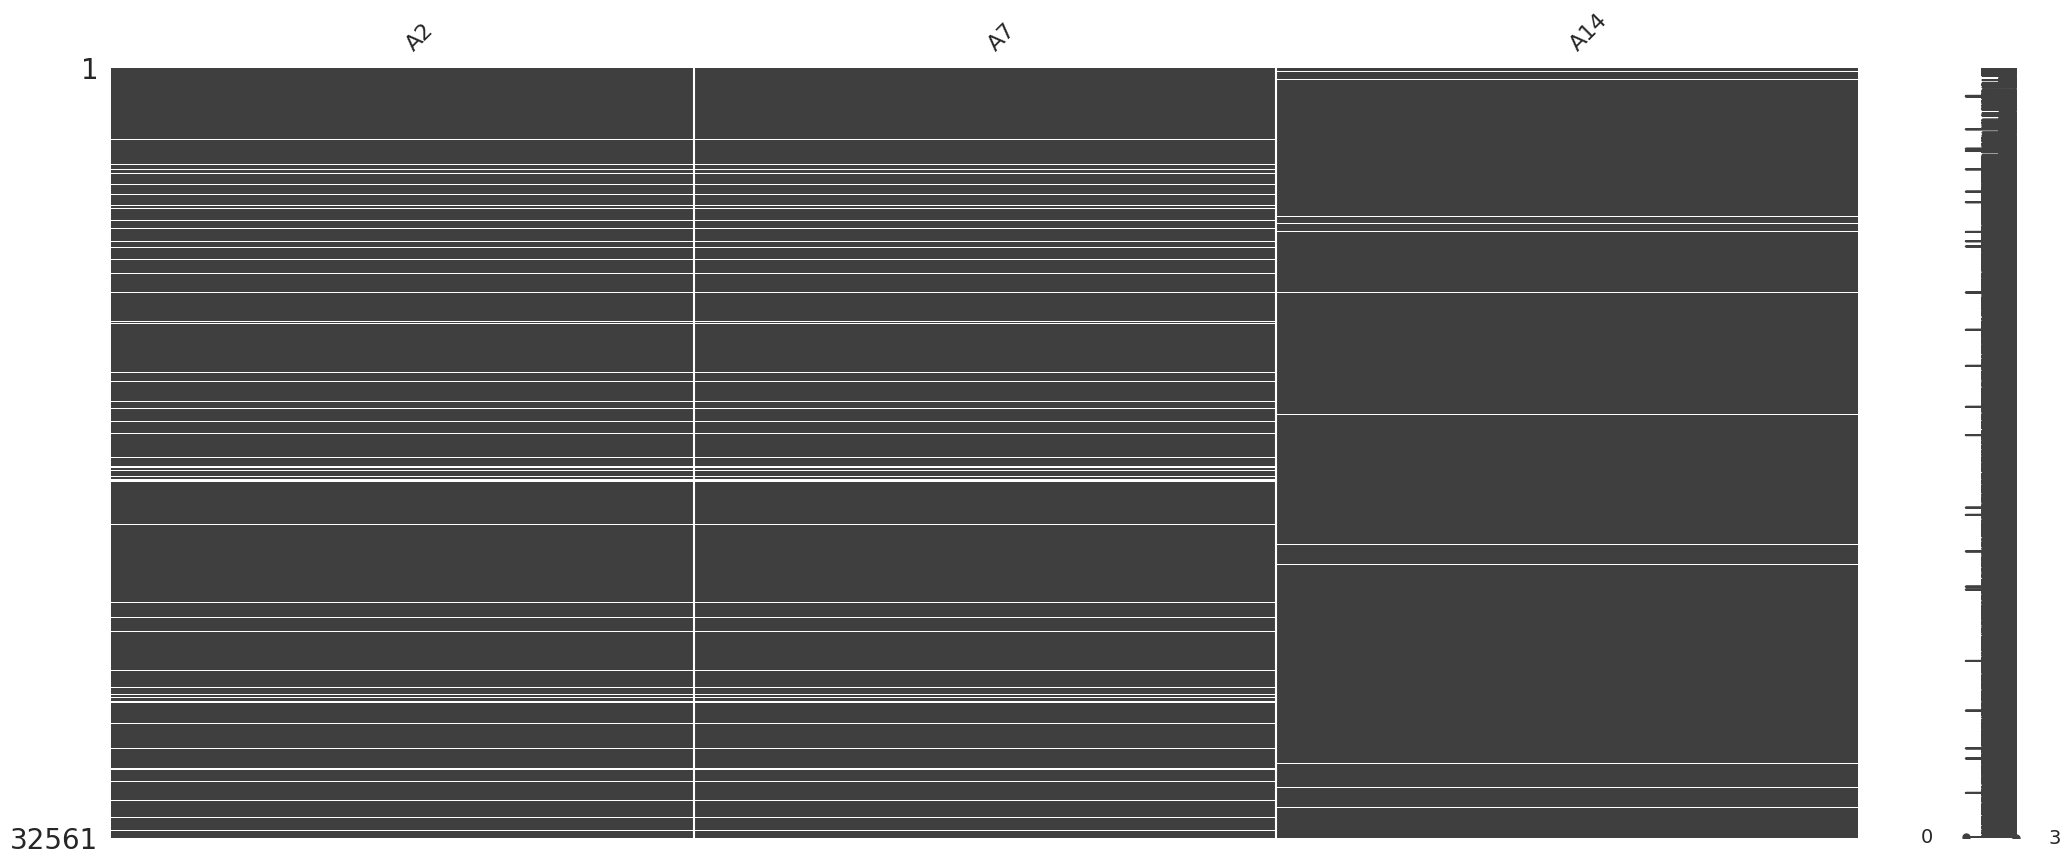

In [104]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

Note : garis putih = data hilang

**Mengubah kategorik menjadi numerik jika 2 kategori ganti dengan 0,1 ; jika >2 kategori ganti dengan 1,2,3,dst**

In [105]:
# Mendefinisikan kamus
A2 = {'Private': 1, 'State_gov': 2, 'Federal-gov': 3, 'Self-emp-not-inc': 4, 'Self-emp-inc': 5, 'Local-gov': 6, 'Without-pay': 7, 'Never-worked': 8}
A4 = {'HS-grad': 1, 'Some-college': 2, '7th-8th': 3, '10th': 4, 'Doctorate': 5, 'Prof-school': 6, 'Bachelors': 7, 'Masters': 8, '11th': 9, 'Assoc-acdm': 10, 'Assoc-voc': 11, '1st-4th': 12, '5th-6th': 13, '12th': 14, '9th': 15, 'Preschool': 16}
A6 = {'Widowed': 1, 'Divorced': 2, 'Separated': 3, 'Never-married': 4, 'Married-civ-spouse': 5, 'Married-spouse-absent': 6, 'Married-AF-spouse': 7}
A7 = {'Exec-managerial': 1, 'Machine-op-inspct': 2, 'Prof-specialty': 3, 'Other-service': 4, 'Adm-clerical': 5, 'Craft-repair': 6, 'Transport-moving': 7, 'Handlers-cleaners': 8, 'Sales': 9, 'Farming-fishing': 10, 'Tech-support': 11, 'Protective-serv': 12, 'Armed-Forces': 13, 'Priv-house-serv': 14}
A8 = {'Not-in-family': 1, 'Unmarried': 2, 'Own-child': 3, 'Other-relative': 4, 'Husband': 5, 'Wife': 6}
A9 = {'White': 1, 'Black': 2, 'Asian-Pac-Islander': 3, 'Other': 4, 'Amer-Indian-Eskimo': 6}
A10 = {'Female': 1, 'Male': 0}
A14 = {'United-States': 1, 'Mexico': 2, 'Greece': 3, 'Vietnam': 4, 'China': 5, 'Taiwan': 6, 'India': 7, 'Philippines': 8, 'Trinadad&Tobago': 9, 'Canada': 10, 'South': 11, 'Holand-Netherlands': 12, 'Puerto-Rico': 13, 'Poland': 14, 'Iran': 15, 'England': 16, 'Germany': 17, 'Italy': 18, 'Japan': 19, 'Hong': 20, 'Honduras': 21, 'Cuba': 22, 'Ireland': 23, 'Cambodia': 24, 'Peru': 25, 'Nicaragua': 26, 'Dominican-Republic': 27, 'Haiti': 28, 'El-Salvador': 29, 'Hungary': 30, 'Columbia': 31, 'Guatemala': 32, 'Jamaica': 33, 'Ecuador': 34, 'France': 35, 'Yugoslavia': 36, 'Scotland': 37, 'Portugal': 38, 'Laos': 39, 'Thailand': 40, 'Outlying-US(Guam-USVI-etc)': 41}

# Menggunakan fungsi peta
dataset['A2'] = dataset['A2'].map(A2)
dataset['A4'] = dataset['A4'].map(A4)
dataset['A6'] = dataset['A6'].map(A6)
dataset['A7'] = dataset['A7'].map(A7)
dataset['A8'] = dataset['A8'].map(A8)
dataset['A9'] = dataset['A9'].map(A9)
dataset['A10'] = dataset['A10'].map(A10)
dataset['A14'] = dataset['A14'].map(A14)


In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      32561 non-null  int64  
 1   A2      29427 non-null  float64
 2   A3      32561 non-null  int64  
 3   A4      32561 non-null  int64  
 4   A5      32561 non-null  int64  
 5   A6      32561 non-null  int64  
 6   A7      30718 non-null  float64
 7   A8      32561 non-null  int64  
 8   A9      32561 non-null  int64  
 9   A10     32561 non-null  int64  
 10  A11     32561 non-null  int64  
 11  A12     32561 non-null  int64  
 12  A13     32561 non-null  int64  
 13  A14     31978 non-null  float64
 14  Class   32561 non-null  object 
dtypes: float64(3), int64(11), object(1)
memory usage: 3.7+ MB


****Mengisi data hilang dengan nilai median****

In [107]:
#Data hilang: A2, A7, A14

median_value=dataset['A2'].median()
dataset['A2']=dataset['A2'].fillna(median_value)

median_value=dataset['A7'].median()
dataset['A7']=dataset['A7'].fillna(median_value)

median_value=dataset['A14'].median()
dataset['A14']=dataset['A14'].fillna(median_value)

**Cek kembali**

In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      32561 non-null  int64  
 1   A2      32561 non-null  float64
 2   A3      32561 non-null  int64  
 3   A4      32561 non-null  int64  
 4   A5      32561 non-null  int64  
 5   A6      32561 non-null  int64  
 6   A7      32561 non-null  float64
 7   A8      32561 non-null  int64  
 8   A9      32561 non-null  int64  
 9   A10     32561 non-null  int64  
 10  A11     32561 non-null  int64  
 11  A12     32561 non-null  int64  
 12  A13     32561 non-null  int64  
 13  A14     32561 non-null  float64
 14  Class   32561 non-null  object 
dtypes: float64(3), int64(11), object(1)
memory usage: 3.7+ MB


TEMUAN : *Tidak ada data yang numerik /dianggap objek*

## BAB 6 – mengkonstruksi data

In [109]:
# Convert float to int after filling NaN with 0
dataset['A2'] = pd.to_numeric(dataset['A2'].fillna(0), errors='coerce').astype(int)

dataset['A4'] = pd.to_numeric(dataset['A4'].fillna(0), errors='coerce').astype(int)

dataset['A6'] = pd.to_numeric(dataset['A6'].fillna(0), errors='coerce').astype(int)

dataset['A7'] = pd.to_numeric(dataset['A7'].fillna(0), errors='coerce').astype(int)

dataset['A8'] = pd.to_numeric(dataset['A8'].fillna(0), errors='coerce').astype(int)

dataset['A9'] = pd.to_numeric(dataset['A9'].fillna(0), errors='coerce').astype(int)

dataset['A10'] = pd.to_numeric(dataset['A10'].fillna(0), errors='coerce').astype(int)

dataset['A14'] = pd.to_numeric(dataset['A14'].fillna(0), errors='coerce').astype(int)


In [110]:
#cek dataset
dataset

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,90,1,77053,1,9,1,5,1,1,1,0,4356,40,1,<=50K
1,82,1,132870,1,9,1,1,1,1,1,0,4356,18,1,<=50K
2,66,1,186061,2,10,1,5,2,2,1,0,4356,40,1,<=50K
3,54,1,140359,3,4,2,2,2,1,1,0,3900,40,1,<=50K
4,41,1,264663,2,10,3,3,3,1,1,0,3900,40,1,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,1,310152,2,10,4,12,1,1,0,0,0,40,1,<=50K
32557,27,1,257302,10,12,5,11,6,1,1,0,0,38,1,<=50K
32558,40,1,154374,1,9,5,2,5,1,0,0,0,40,1,>50K
32559,58,1,151910,1,9,1,5,2,1,1,0,0,40,1,<=50K


In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      32561 non-null  int64 
 1   A2      32561 non-null  int64 
 2   A3      32561 non-null  int64 
 3   A4      32561 non-null  int64 
 4   A5      32561 non-null  int64 
 5   A6      32561 non-null  int64 
 6   A7      32561 non-null  int64 
 7   A8      32561 non-null  int64 
 8   A9      32561 non-null  int64 
 9   A10     32561 non-null  int64 
 10  A11     32561 non-null  int64 
 11  A12     32561 non-null  int64 
 12  A13     32561 non-null  int64 
 13  A14     32561 non-null  int64 
 14  Class   32561 non-null  object
dtypes: int64(14), object(1)
memory usage: 3.7+ MB


Catatan: Data telah berhasil dimodifikasi dan tidak memiliki objek


**Menghapus Nilai Konstan**

In [112]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [113]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      32561 non-null  int64 
 1   A2      32561 non-null  int64 
 2   A3      32561 non-null  int64 
 3   A4      32561 non-null  int64 
 4   A5      32561 non-null  int64 
 5   A6      32561 non-null  int64 
 6   A7      32561 non-null  int64 
 7   A8      32561 non-null  int64 
 8   A9      32561 non-null  int64 
 9   A10     32561 non-null  int64 
 10  A11     32561 non-null  int64 
 11  A12     32561 non-null  int64 
 12  A13     32561 non-null  int64 
 13  A14     32561 non-null  int64 
 14  Class   32561 non-null  object
dtypes: int64(14), object(1)
memory usage: 3.7+ MB


Temuan : Karena jumlah atribut berkurang menjadi 14 artinya ada data bernilai konstan

Cek data apakah ada data yang bernilai konstan. Jika iya, maka atribut anda akan berkurang dari jumlah atribut sebelumnya, dalam hal ini menjadi 6 data.

**Cek korelasi tahap 2**

<ipython-input-114-4001db5d4bca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


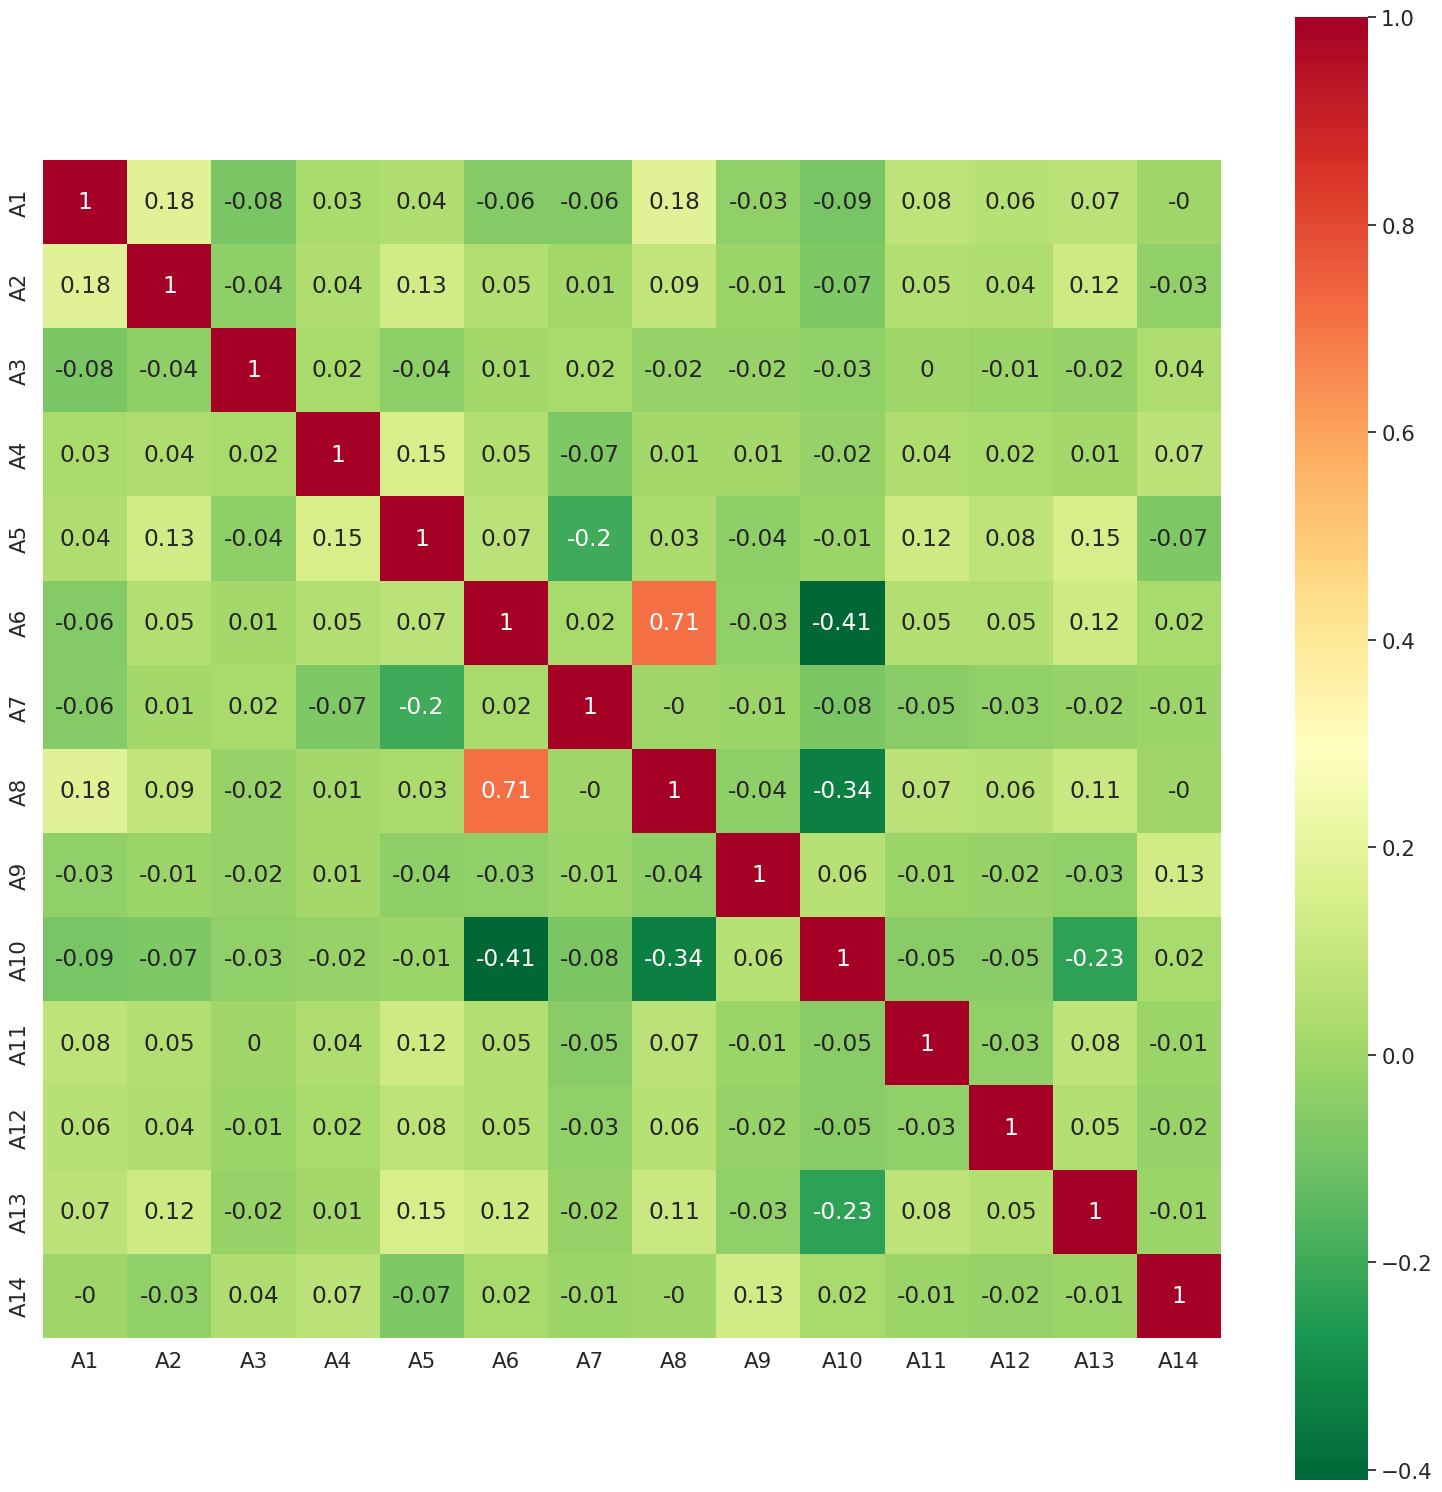

In [114]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (19,19))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

*Temuan*:
Tidak ada atribut yang sama

**Cek Boxplot**

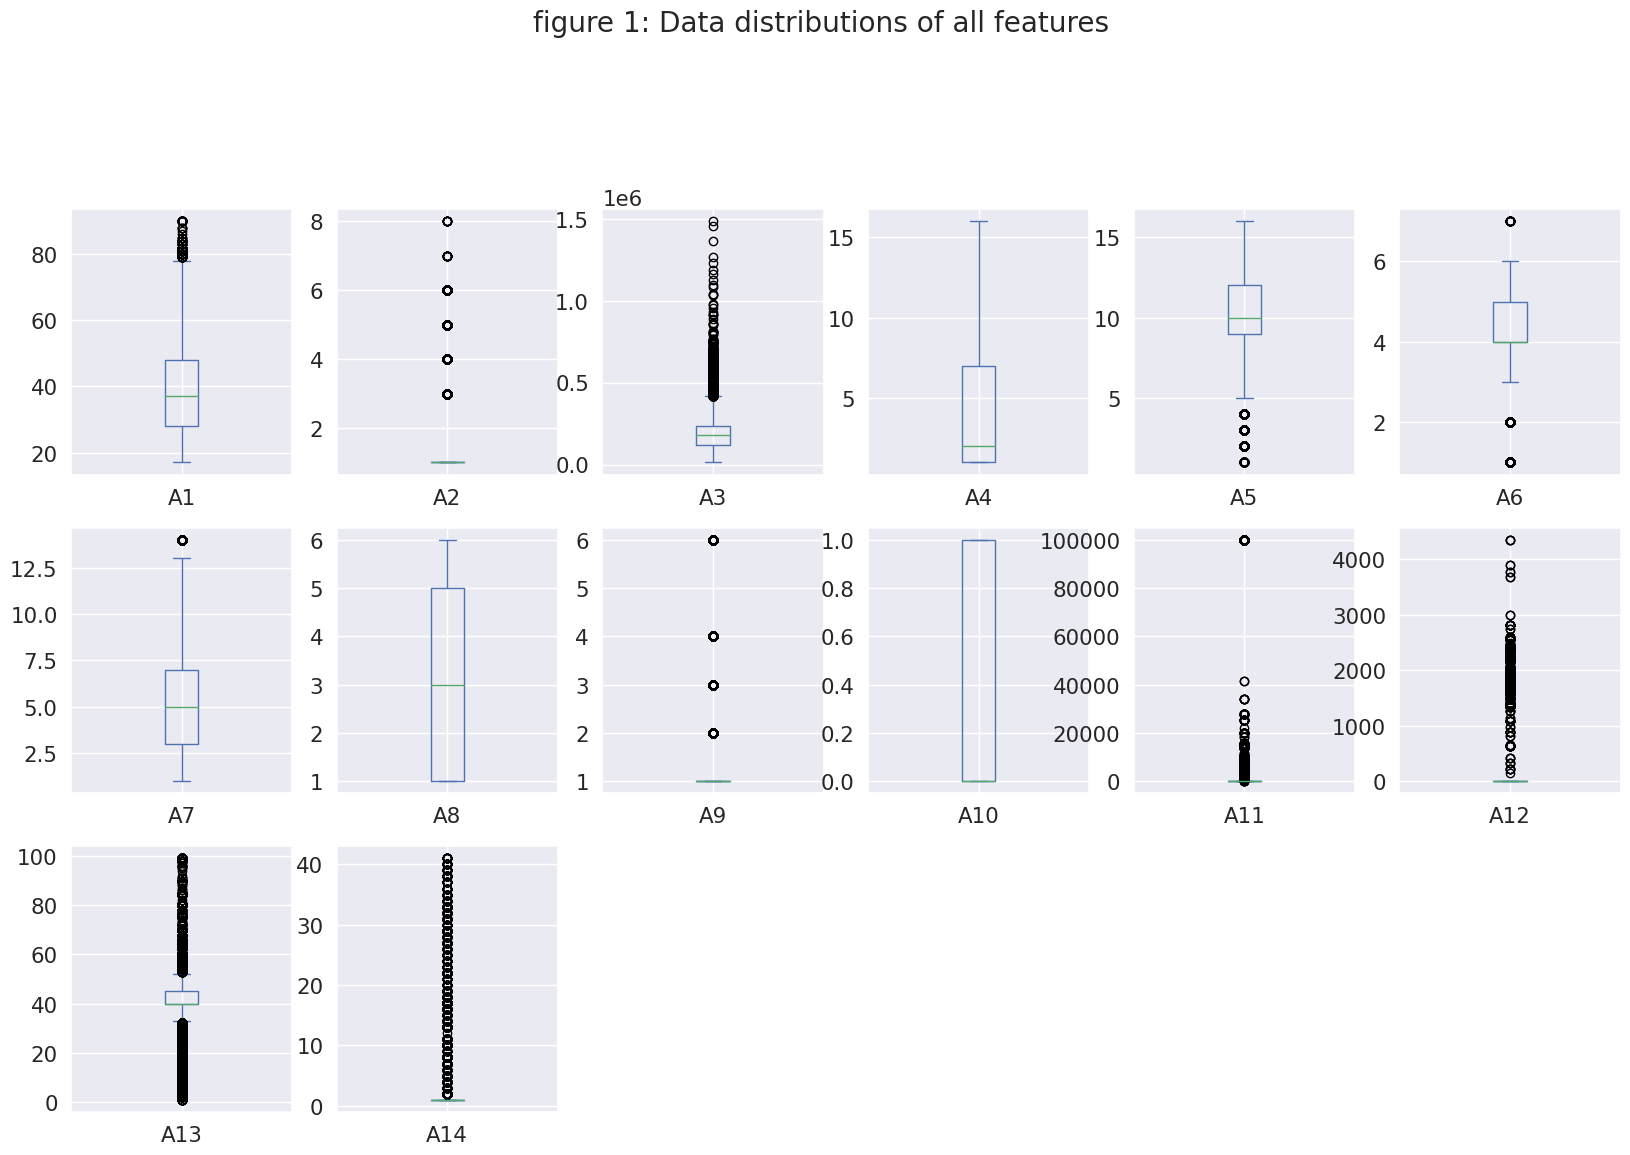

In [115]:
dataset.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

Temuan: Ada banyak outlier di A3, A11, A12

## BAB 7 – menentukan label data

**Tentukan label data atau tentukan jumlah grup atau cluster**

Sesuaikan dengan kasus masing-masing, jika metode yang akan digunakan untuk mencapai tujuan Anda adalah klasifikasi, dapat memberi label pada data tersebut (dalam hal ini metode yang akan digunakan)


yang digunakan adalah klasifikasi karena data  sudah mempunyai label pada atribut class) namun jika yang perlu dilakukan adalah pengelompokan maka yang dapat dilakukan adalah mengidentifikasi jumlah cluster dan label kategori setiap cluster


In [116]:
y = dataset['Class'] #case jika akan melakukan klasfikikasi untuk membangun model

In [117]:
y #cek variable y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: Class, Length: 32561, dtype: object

In [118]:
#menentukan jumlah cluster (jumlah cluester = 2, dan metode clustering yg digunakan adalah KMeans)
km = KMeans(n_clusters=2)
#case klasterisasi
#untuk mejalankan perintah ini anda perlu periksa kembali library anda pada bab 1 untuk klasterisasi

In [119]:
km

KMeans(n_clusters=2)

In [120]:
import pandas as pd
from sklearn.cluster import KMeans

In [121]:
selected_features = ['Class']

In [122]:
features = dataset[selected_features].copy()

In [123]:
features = pd.get_dummies(features)


In [124]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [125]:
dataset['cluster'] = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [126]:
dataset['cluster'] = dataset['cluster'].map({0: 'ditolak', 1: 'diterima'})

In [127]:
print(features)

       Class_<=50K  Class_>50K
0                1           0
1                1           0
2                1           0
3                1           0
4                1           0
...            ...         ...
32556            1           0
32557            1           0
32558            0           1
32559            1           0
32560            1           0

[32561 rows x 2 columns]


In [170]:
dataset

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class,cluster
0,90,1,77053,1,9,1,5,1,1,1,0,4356,40,1,<=50K,ditolak
1,82,1,132870,1,9,1,1,1,1,1,0,4356,18,1,<=50K,ditolak
2,66,1,186061,2,10,1,5,2,2,1,0,4356,40,1,<=50K,ditolak
3,54,1,140359,3,4,2,2,2,1,1,0,3900,40,1,<=50K,ditolak
4,41,1,264663,2,10,3,3,3,1,1,0,3900,40,1,<=50K,ditolak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,1,310152,2,10,4,12,1,1,0,0,0,40,1,<=50K,ditolak
32557,27,1,257302,10,12,5,11,6,1,1,0,0,38,1,<=50K,ditolak
32558,40,1,154374,1,9,5,2,5,1,0,0,0,40,1,>50K,diterima
32559,58,1,151910,1,9,1,5,2,1,1,0,0,40,1,<=50K,ditolak


## BAB 8 – Membangun Model

## Data Preparation

Ada beberapa langkah prapemrosesan yang perlu kita lakukan sebelum membangun model.

Pertama, perhatikan bahwa kita memiliki fitur kategorikal dan numerik sebagai prediktor. Pada model-model sebelumnya seperti regresi linier dan logistik, kita telah membuat **variabel boneka** untuk variabel kategorik, karena model-model tersebut (yang merupakan persamaan matematis) hanya dapat memproses variabel numerik.

Semua itu tidak diperlukan dalam pohon keputusan, karena pohon keputusan dapat memproses variabel kategorikal dengan mudah. Namun, kita masih perlu mengkodekan variabel kategorikal ke dalam format standar agar sklearn dapat memahaminya dan membangun pohon tersebut. Kita akan melakukannya dengan menggunakan kelas ```LabelEncoder()```, yang disertakan dengan ```sklearn.preprocessing```.  

Kita dapat membaca dokumentasi ```LabelEncoder``` <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">di sini</a>.





### mengkodekan variabel kategorikal menggunakan Pengkode Label

### pilih semua variabel kategorikal

In [171]:
from sklearn import preprocessing

dataset_categorical = dataset.select_dtypes(include=['object'])
dataset_categorical.head()

,Class,cluster
0,<=50K,ditolak
1,<=50K,ditolak
2,<=50K,ditolak
3,<=50K,ditolak
4,<=50K,ditolak


### menerapkan encoder Label ke dataset_categorical


In [172]:
le = preprocessing.LabelEncoder()
dataset_categorical = dataset_categorical.apply(le.fit_transform)
dataset_categorical.head()

,Class,cluster
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


### concat dataset_categorical dengan dataset asli


In [174]:
dataset = dataset.drop(dataset_categorical.columns, axis=1)
dataset = pd.concat([dataset, dataset_categorical], axis=1)
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class,cluster
0,90,1,77053,1,9,1,5,1,1,1,0,4356,40,1,0,1
1,82,1,132870,1,9,1,1,1,1,1,0,4356,18,1,0,1
2,66,1,186061,2,10,1,5,2,2,1,0,4356,40,1,0,1
3,54,1,140359,3,4,2,2,2,1,1,0,3900,40,1,0,1
4,41,1,264663,2,10,3,3,3,1,1,0,3900,40,1,0,1


### lihat jenis kolom


In [175]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   A1       32561 non-null  int64
 1   A2       32561 non-null  int64
 2   A3       32561 non-null  int64
 3   A4       32561 non-null  int64
 4   A5       32561 non-null  int64
 5   A6       32561 non-null  int64
 6   A7       32561 non-null  int64
 7   A8       32561 non-null  int64
 8   A9       32561 non-null  int64
 9   A10      32561 non-null  int64
 10  A11      32561 non-null  int64
 11  A12      32561 non-null  int64
 12  A13      32561 non-null  int64
 13  A14      32561 non-null  int64
 14  Class    32561 non-null  int64
 15  cluster  32561 non-null  int64
dtypes: int64(16)
memory usage: 4.0 MB


### ubah pendapatan variabel target menjadi kategorikal

In [181]:
dataset[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'Class']] = dataset[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'Class']].astype('category')

Sekarang semua variabel kategorikal telah dikodekan dengan tepat. Mari kita bangun modelnya.

# Model Building and Evaluation


Pertama-tama, mari kita buat pohon keputusan dengan hiperparameter default. Kemudian kita akan menggunakan validasi silang untuk menyetelnya.

### Mengimpor train-test-split


In [182]:
from sklearn.model_selection import train_test_split

### Menempatkan variabel fitur ke X
### Menempatkan variabel respon ke y


In [190]:
columns_to_drop = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'Class']
X = dataset.drop(labels=columns_to_drop, axis=1)

y = dataset['Class']


### Membagi data menjadi data latih dan data uji

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state = 99)
X_train.head()

,cluster
5728,0
10700,1
29425,1
2088,0
16292,1


### Mengimpor pengklasifikasi pohon keputusan dari pustaka sklearn

### Memasang pohon keputusan dengan hyperparameter default, selain dari
### max_depth yang bernilai 5 agar kita dapat memplot dan membaca pohon.

In [192]:
from sklearn.tree import DecisionTreeClassifier

dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

### Mari kita periksa metrik evaluasi dari model default kita

### Mengimpor laporan klasifikasi dan matriks kebingungan dari metrik sklearn

### Membuat prediksi

### Mencetak laporan klasifikasi

In [193]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_default = dt_default.predict(X_test)

print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7475
           1       1.00      1.00      1.00      2294

    accuracy                           1.00      9769
   macro avg       1.00      1.00      1.00      9769
weighted avg       1.00      1.00      1.00      9769



### Mencetak matriks kekeliruan dan akurasi

In [194]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7475    0]
 [   0 2294]]
1.0


### Mengimpor package yang diperlukan untuk visualisasi

### Menempatkan fitur

In [196]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot, graphviz

features = list(dataset.columns[1:])
features

['A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'Class',
 'cluster']

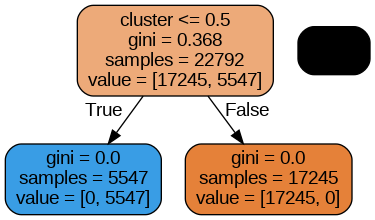

In [198]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Specify the feature names based on the columns you used in X_train
features = X_train.columns

# Export the decision tree visualization
dot_data = export_graphviz(dt_default, out_file=None,
                           feature_names=features, filled=True, rounded=True)

# Create a graph from dot_data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree visualization
Image(graph.create_png())


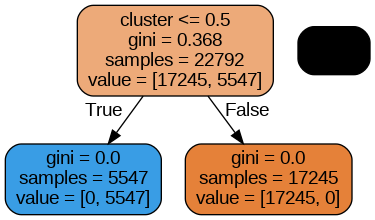

In [199]:
# memplot pohon dengan max_depth=3
dot_data = StringIO()
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [200]:
# GridSearchCV untuk menemukan kedalaman maksimal yang optimal
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# tentukan jumlah lipatan untuk CV k-lipatan
n_folds = 5

# parameter untuk membangun model
parameters = {'max_depth': range(1, 40)}

# instantiate model
dtree = DecisionTreeClassifier(criterion = "gini",
                               random_state = 100)

# cocokkan pohon pada data pelatihan
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [201]:
# skor CV GridSearch
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006902,0.000978,0.003762,0.000606,1,{'max_depth': 1},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.010562,0.003788,0.006647,0.005215,2,{'max_depth': 2},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.020149,0.004189,0.009686,0.003017,3,{'max_depth': 3},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.026165,0.010313,0.010142,0.005271,4,{'max_depth': 4},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.006079,0.000157,0.003737,0.000811,5,{'max_depth': 5},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


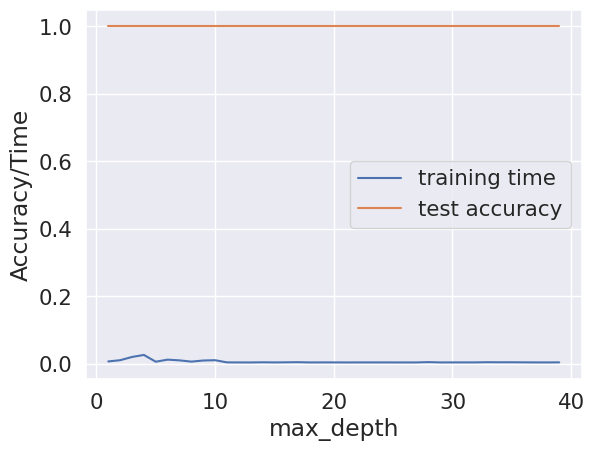

In [202]:
import matplotlib.pyplot as plt

# Merencanakan akurasi dengan max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_fit_time"],  # Menggunakan mean_fit_time sebagai pengganti mean_train_score
         label="training time")    # Mengubah label menjadi "training time"
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy/Time")  # Mengubah label menjadi "Accuracy/Time"
plt.legend()
plt.show()


In [203]:
# GridSearchCV untuk menemukan kedalaman maksimal yang optimal
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# tentukan jumlah lipatan untuk CV k-lipatan
n_folds = 5

# parameter untuk membangun model
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate model
dtree = DecisionTreeClassifier(criterion = "gini",
                               random_state = 100)

# cocokkan pohon pada data pelatihan
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             scoring='accuracy')

In [204]:
# skor CV GridSearch
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013852,0.000125,0.007410,0.003658,5,{'min_samples_leaf': 5},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.011840,0.002470,0.005379,0.003329,25,{'min_samples_leaf': 25},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.013111,0.003765,0.007820,0.002806,45,{'min_samples_leaf': 45},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.007462,0.001570,0.003565,0.000103,65,{'min_samples_leaf': 65},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.006484,0.000137,0.004100,0.000645,85,{'min_samples_leaf': 85},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


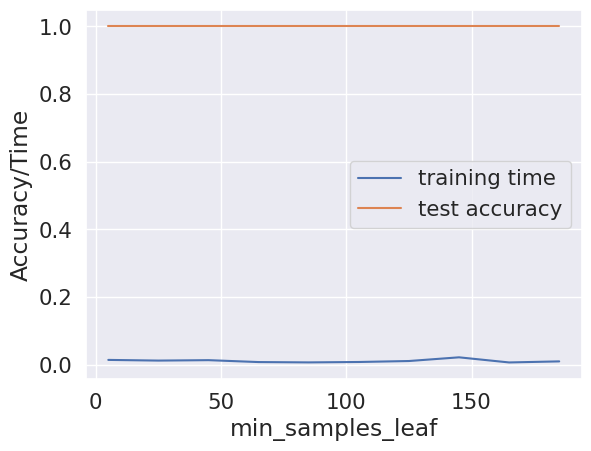

In [205]:
import matplotlib.pyplot as plt

# Merencanakan akurasi dengan min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_fit_time"],  # Menggunakan mean_fit_time sebagai pengganti mean_train_score
         label="training time")    # Mengubah label menjadi "training time"
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy/Time")  # Mengubah label menjadi "Accuracy/Time"
plt.legend()
plt.show()


In [206]:
# GridSearchCV untuk menemukan min_samples_split yang optimal
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# tentukan jumlah lipatan untuk CV k-lipatan
n_folds = 5

# parameter untuk membangun model
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate model
dtree = DecisionTreeClassifier(criterion = "gini",
                               random_state = 100)

# cocokkan pohon pada data pelatihan
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             scoring='accuracy')

In [207]:
# skor CV GridSearch
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007478,0.000758,0.004328,0.000519,5,{'min_samples_split': 5},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.006648,0.000124,0.003774,0.000266,25,{'min_samples_split': 25},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.006612,0.000261,0.003874,0.000113,45,{'min_samples_split': 45},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.006685,0.000228,0.003909,0.000046,65,{'min_samples_split': 65},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.006783,0.000084,0.003817,0.000165,85,{'min_samples_split': 85},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


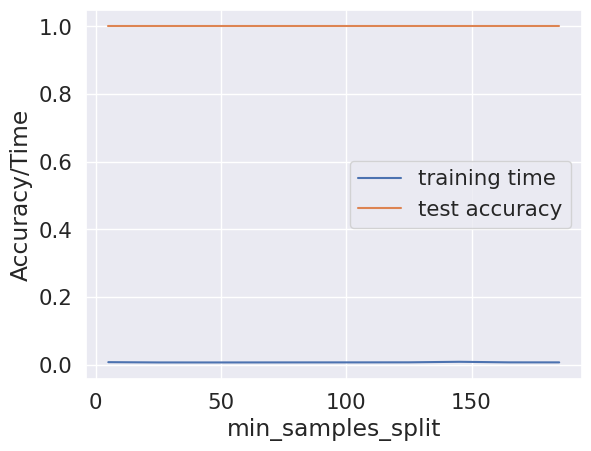

In [208]:
import matplotlib.pyplot as plt

# Merencanakan akurasi dengan min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_fit_time"],  # Menggunakan mean_fit_time sebagai pengganti mean_train_score
         label="training time")    # Mengubah label menjadi "training time"
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy/Time")  # Mengubah label menjadi "Accuracy/Time"
plt.legend()
plt.show()


In [209]:
# Membuat grid parameter
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Menginstansiasi model pencarian grid
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
                          cv = n_folds, verbose = 1)

# Sesuaikan pencarian grid dengan data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [210]:
# hasil cv
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015319,0.006731,0.007535,0.004318,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.007702,0.002465,0.003834,0.000292,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.006560,0.001028,0.003782,0.000170,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.006331,0.000193,0.004703,0.001286,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.006747,0.000794,0.003772,0.000111,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
5,0.006210,0.000077,0.003804,0.000350,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
6,0.006815,0.000746,0.003834,0.000048,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
7,0.006740,0.001146,0.004348,0.001275,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
8,0.006137,0.000170,0.003759,0.000063,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
9,0.006343,0.000147,0.003849,0.000033,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [211]:
# mencetak skor akurasi dan hiperparameter yang optimal
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 1.0
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50)


In [212]:
# model dengan hiperparameter optimal
clf_gini = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [213]:
# skor akurasi
clf_gini.score(X_test,y_test)

1.0

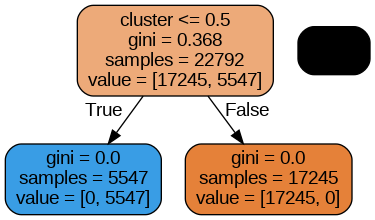

In [214]:
# memplot pohon
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [215]:
# pohon dengan max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=3,
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# skor
print(clf_gini.score(X_test,y_test))

1.0


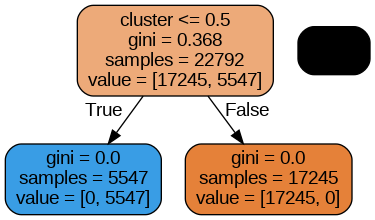

In [216]:
# memplot pohon dengan max_depth=3
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [217]:
# metrik klasifikasi
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7475
           1       1.00      1.00      1.00      2294

    accuracy                           1.00      9769
   macro avg       1.00      1.00      1.00      9769
weighted avg       1.00      1.00      1.00      9769



In [218]:
# matriks yang membingungkan
print(confusion_matrix(y_test,y_pred))

[[7475    0]
 [   0 2294]]
